# **Анализ данных вакансий HH.ru**

Целью данного исследования является обнародование различий в предлагаемых вакансиях для аналитиков данных и системных аналитиков. Анализ будет проводиться с использованием данных из описания вакансий, размещённых на сайте hh.ru, также известном как HeadHunter. Данные получены с помощью API hh.ru.

Исследование будет состоять из следующих этапов:

1.   В первой главе будут загружены необходимые библиотеки, датасеты, сделан первичный анализ, проверка на дубликаты, а также проведена предобработка данных.
2.   Во второй главе будет проведён исследовательский анализ данных, включающий в себя следующие шаги:
* Будут выдвинуты гипотезы
* Выявлены грейды требуемых специалистов по колонке с требуемым опытом.
* Определены доли грейдов Junior, Junior+, Middle, Senior среди вакансий "аналитик данных" и "системный аналитик".
* Будут даны описания "типичного места работы" для "аналитика данных" и "системного аналитика" по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы. Информация будет предоставлена по всем грейдам.
* Будет определено, какие навыки спрашивают чаще - "твердые" (hard skills)  или "мягкие" (soft skills). Также будет определено, к какому грейду и к какой специальности в данной выборке предъявляется больше требований. Также будет проанализировано, какие "твёрдые" и "мягкие" навыки наиболее востребованы у кандидатов в зависимости от грейда и профессии (будут проанализированы все возможные комбинации).
* Будут подтверждены или опровергнуты выдвинутые в начале главы гипотезы на основании полученных в ходе исследования результатов.
3. В последней, четвёртой главе, будут представлены итоги и даны рекомендации для HR.


## Глава 1. Загрузка библиотек, датасетов, первичный анализ, проверка на дубликаты, предобработка данных

В первой главе данные будут подготовлены для последующего исследовательского анализа. Этот этап можно условно поделить на три шага: загрузку библиотек и датасетов, первичный анализ, предобработку данных.

### Глава 1.1 Загрузка библиотек и датасетов, первичный анализ, проверка на дубликаты

Импорт библиотек:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Загрузка и первичное изучение двух файлов. Весь анализ будет проводиться поочерёдно для обоих датасетов по одинаковому сценарию.
В конце каждого этапа будет проведено сравнение полученных результатов.

In [ ]:
data_da = pd.read_excel("https://github.com/EOS-Hi/HH/raw/refs/heads/main/vacancies_da.xlsx")
data_sa = pd.read_excel("https://github.com/EOS-Hi/HH/raw/refs/heads/main/vacancies_sa.xlsx")

Написание универсальной функции для первичного анализа:

In [ ]:
def first_analysis(dataset):
    print(dataset.shape)
    print(dataset.info())
    display(dataset.head())

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option("display.float_format", "{:.2f}".format)

In [240]:
np.set_printoptions(formatter={'float_kind':'{:.f}'.format})

In [ ]:
pd.option_context('display.float_format', '${:,.2f}'.format)

### Глава 1.1.1 Анализ датасета аналитиков данных

Проведение первичного анализа для аналитиков данных:

In [ ]:
first_analysis(data_da)

(1801, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          180

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


In [ ]:
data_da.head(10)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация
5,100059110,Senior Data Analyst (Цифровой билайн),2024-06-11 11:45:29,https://hh.ru/vacancy/100059110,Открытая,билайн,"билайн: ИТ, Data, Digital",Москва,Middle (3-6 years),"['Python', 'SQL', 'Математическая статистика']",Удаленная работа,Полная занятость,"сегодня билайн — компания изменений, чутко реа...",сегодня билайн компания изменение чутко реагир...,NaN,NaN,ЗП не указана,"Python, SQL, Математическая статистика",NaN,NaN
6,100060772,Аналитик данных,2024-05-24 11:56:20,https://hh.ru/vacancy/100060772,Открытая,ГКУ Центр занятости населения города Москвы,NaN,Москва,Junior+ (1-3 years),[],Полный день,Полная занятость,один из ключевых партнеров центра занятости на...,ключевой партнер центр занятость население раб...,100000.00,NaN,ЗП не указана,NaN,NaN,NaN
7,100069131,Дата аналитик,2024-05-24 13:05:01,https://hh.ru/vacancy/100069131,Открытая,СБЕР,Сбер для экспертов,Санкт-Петербург,Junior+ (1-3 years),"['Документация', 'Проактивность', 'Коммуникация']",Полный день,Полная занятость,команда данных по инвестиционным продуктам. мы...,команда данные инвестиционный продукт развиват...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация, Проактивность"
8,100069821,Аналитик данных,2024-06-10 16:49:49,https://hh.ru/vacancy/100069821,Открытая,МТС,«МТС»,Казань,Junior+ (1-3 years),[],Полный день,Полная занятость,мтс — это мультисервисная цифровая экосистема....,мтс мультисервисный цифровой экосистема создав...,72000.00,NaN,ЗП не указана,NaN,NaN,NaN
9,100071014,Аналитик данных,2024-06-07 11:08:22,https://hh.ru/vacancy/100071014,Открытая,Россети Урал,NaN,Екатеринбург,Junior+ (1-3 years),['Аналитическое мышление'],Полный день,Полная занятость,пао «россети урал» — крупнейшая электросетевая...,россеть урал крупный электросетевой компания у...

В датасете 1801 строка и 20 столбцов.

Столбцы содержат следующую информацию:

* id - уникальный идентификатор вакансии;
* name - название вакансии;
* published_at - дата публикации;
* alternate_url - ссылка на вакансию;
* type - статус вакансии на момент получения данных от api и передачи их в базу;
* employer - работодатель;
* department - работодатель, отдел;
* area - регион места работы;
* experience - требуемый опыт работы;
* key_skills - ключевые навыки, в том числе найденные при анализе полного текста вакансии. Поле генерируется после получения информации от api;
* schedule - график работы;
* employment - тип занятости;
* description - описание вакансии;
* description_lemmatized - лемматизированное описание вакансии;
* salary_from - нижняя граница предлагаемой заработной платы;
* salary_to - верхняя граница предлагаемой заработной платы;
* salary_bin - категория зарплаты;
* key_skills_from_key_skills_field - ключевые навыки из поля вакансии key_skills;
* hard_skills_from_description - “твердые” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api;
* soft_skills_from_description - “мягкие” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api.

Названия столбцов соответствуют "змеиному стилю".

Необходимо сделать проверку на наличие дубликатов. Она будет проводиться в два этапа. Для начала следует проверить датафреймы на наличие абсолютно одинаковых строк:

In [ ]:
data_da.duplicated().sum()

0

Таких строк в датафрейме нет. Дополнительно будет проведена проверка по столбцу id - уникальному идентификатору вакансии:

In [ ]:
da_duplicates = data_da.duplicated(subset=['id']).sum()
da_duplicates

0

Таких дубликатов в датасете тоже нет.
Следующий шаг - изучить пропуски.

In [ ]:
data_da.isna().sum().sort_values(ascending = False)

,0
salary_to,1573
salary_from,1453
hard_skills_from_description,1383
department,1280
soft_skills_from_description,1213
key_skills_from_key_skills_field,708
employment,0
salary_bin,0
description_lemmatized,0
description,0


В датасете есть пропуски в следующих столбцах:
* department
* salary_from
* salary_to
* key_skills_from_key_skills_field
* hard_skills_from_description
* soft_skills_from_description

Пропуски в колонке department (отдел работодателя) вполне объяснимы - эта информация не является ключевой при публикации вакансии и не всегда предоставляется. Также возможен вариант, что в некоторых фирмах специального отдела для аналитиков не предусмотрено.

Нижняя и верхняя границы предлагаемой заработной платы также является необязательной информацией: в то время как некоторые работодатели окончательно определяют уровень предлагаемой заработной платы после собеседования с соискателем и определения его компетенций, другие фирмы сразу обозначают размер заработка. Важным моментом является то, что, хотя в столбце salary_bin нет ни одного пропуска, очень часто ячейки заполнены значением "ЗП не указана", то есть, по факту необходимая информация всё равно не предоставлена. Эта проблема будет решена в последующих главах.

Аналогичная ситуация сложилась с некоторыми вакансиями, у которых в столбце key_skills вместо указания навыков стоит символ "[]", как, например, у вакансии с индексом 6 и 8. Формально пропусков в столбце нет, но по факту информация не предоставлена. Данные пропуски заполняться не будут, вакансии останутся в датасете для дальнейшего анализа. Однако для отдельных этапов анализа подобные строки из создаваемых датасетов будут удаляться.

Пробелы в столбцах department, salary_from и salary_to заполнить тоже не получится: получить правильную информацию не выйдет либо будет слишком затратно по времени, использование неких "усреднённых" значений для такого важного показателя, как заработная плата, приведёт лишь к искажению результаты исследования. Таким образом, пропуски будут оставлены "как есть".

Интереснее ситуация сложилась с тремя оставшимися столбцами, касающихся навыков. Всего в таблице 4 столбца с описанием навыков:
* key_skills, столбец, содержащий в себе ключевые навыки, в том числе найденные при анализе полного текста вакансии;
* и три столбца:
    * key_skills_from_key_skills_field,
    * hard_skills_from_description,
    * soft_skills_from_description,
которые содержат в себе определённую информацию о навыках после обработки списка ключевых навыков из поля вакансии key_skills. Все три поля генерируется после получения информации от api.

Несмотря на то, что алгоритм обработки полученной в key_skills информации неизвестен, складывается впечталение, что все упомянутые в столбце навыки должны быть распределены по трём остальным столбцам, связанным с навыками:  
* key_skills_from_key_skills_field, или ключевые навыки;
* hard_skills_from_description, или "твёрдые" навыки; и
* soft_skills_from_description, или "мягкие" навыки.

Беглый просмотр первых же строк указывает на то, что автоматическое распределение навыков по категориям не сработало. Все навыки key_skills должны быть распределены на "твёрдые" и "мягкие" что не было сделано. В следующей главе будет проведена предобработка данных, которая направлена в том числе и на устранение данных проблем.


### Глава 1.1.2 Анализ датасета системных аналитиков

Аналогичным образом будет проведён анализ второго датасета:

In [ ]:
first_analysis(data_sa)

(1915, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1915 non-null   int64         
 1   name                              1915 non-null   object        
 2   published_at                      1915 non-null   datetime64[ns]
 3   alternate_url                     1915 non-null   object        
 4   type                              1915 non-null   object        
 5   employer                          1915 non-null   object        
 6   department                        361 non-null    object        
 7   area                              1915 non-null   object        
 8   experience                        1915 non-null   object        
 9   key_skills                        1915 non-null   object        
 10  schedule                          191

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.00,NaN,ЗП не указана,NaN,NaN,Документация
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"['ERP', 'Atlassian Jira', '1С: Управление Прои...",Удаленная работа,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', '...",Полный день,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN


В датасете 1915 строк и 20 столбцов. Столбцы полностью аналогичны тем, что были в датасете аналитиков данных.

Названия столбцов соответствуют "змеиному стилю".

Проверка на наличие дубликатов в датасете системных аналитиков будет проведена таким же образом, как ранее проводилась проверка датасета аналитиков данных:

In [ ]:
data_sa.duplicated().sum()

0

In [ ]:
sa_duplicates = data_sa.duplicated(subset=['id']).sum()
sa_duplicates

0

Как и в первом случае, в датасете дубликатов нет.

Следующий шаг - изучение пропусков.

In [ ]:
data_sa.isna().sum().sort_values(ascending = False)

,0
salary_to,1636
salary_from,1559
department,1554
hard_skills_from_description,1345
key_skills_from_key_skills_field,641
soft_skills_from_description,488
employment,0
salary_bin,0
description_lemmatized,0
description,0


Есть пропуски в тех же самых столбцах, как и у аналитиков данных:
* department
* salary_from
* salary_to
* key_skills_from_key_skills_field
* hard_skills_from_description
* soft_skills_from_description

Как и в случае с датасетом аналитиков данных, имеются следующие проблемы:
* Невозможность заполнить пропуски в столбцах department, salary_from и salary_to из-за отсутствия информации и нежелания искажения данных путём использования усреднённых значений;
* Как и в случае с аналитиками данных, автоматическое распределение навыков по столбцам  hard_skills_from_description, soft_skills_from_description также не сработало. Поэтому для данного датасета также будет проведена предобработка данных, аналогичная той, что будет проведена для датасета аналитиков данных.
* Некоторые пропуски формально отсутствуют, но по факту присутствуют в датасете. В первую очередь это касается столбцов salary_bin и key_skills.

Напоследок стоит ознакомиться с уникальными значениями наиболее важных для анализа колонок:

* Уровни грейдов:

In [ ]:
data_da['experience'].unique()

array(['Junior (no experince)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'], dtype=object)

In [ ]:
data_sa['experience'].unique()

array(['Middle (3-6 years)', 'Junior+ (1-3 years)', 'Senior (6+ years)',
       'Junior (no experince)'], dtype=object)

Имеются четыре одинаковых грейда в обоих датасетах.

In [ ]:
data_da['experience'] = data_da['experience'].str.replace('no experince', 'no experience')
data_da['experience'].unique()

array(['Junior (no experience)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'], dtype=object)

In [ ]:
data_sa['experience'] = data_sa['experience'].str.replace('no experince', 'no experience')
data_sa['experience'].unique()

array(['Middle (3-6 years)', 'Junior+ (1-3 years)', 'Senior (6+ years)',
       'Junior (no experience)'], dtype=object)

* Зарплаты:

Зарплатам посвящены по три столбца в данной таблице:

* salary_from
* salary_to
* salary_bin

In [ ]:
sorted(data_da['salary_from'].unique())

[50.0,
 60000.0,
 nan,
 25000.0,
 26000.0,
 28940.0,
 30000.0,
 34000.0,
 35000.0,
 40000.0,
 40050.0,
 40700.0,
 42500.0,
 45000.0,
 50000.0,
 51000.0,
 55000.0,
 56000.0,
 57000.0,
 59000.0,
 61000.0,
 63000.0,
 65000.0,
 65450.0,
 68000.0,
 70000.0,
 72000.0,
 74450.0,
 75000.0,
 76000.0,
 76700.0,
 78000.0,
 78045.0,
 80000.0,
 81000.0,
 84000.0,
 85000.0,
 86560.0,
 90000.0,
 95000.0,
 99500.0,
 100000.0,
 103000.0,
 105000.0,
 107000.0,
 108000.0,
 110000.0,
 112200.0,
 115000.0,
 120000.0,
 123000.0,
 130000.0,
 135000.0,
 136000.0,
 137000.0,
 140000.0,
 150000.0,
 160000.0,
 180000.0,
 187000.0,
 190000.0,
 200000.0,
 210000.0,
 233750.0,
 250000.0,
 257125.0,
 280500.0,
 299200.0,
 300000.0,
 345950.0,
 350000.0,
 398000.0]

В глаза бросается число "50", что никак не может быть предлагаемым размером зарплаты. Скорее всего, речь идёт о тысячах рублей. Число будет перезаписано.

In [ ]:
data_da['salary_from'] = data_da['salary_from'].replace(50, 50000)
sorted(data_da['salary_from'].unique())

[26000.0,
 60000.0,
 nan,
 25000.0,
 28940.0,
 30000.0,
 34000.0,
 35000.0,
 40000.0,
 40050.0,
 40700.0,
 42500.0,
 45000.0,
 50000.0,
 51000.0,
 55000.0,
 56000.0,
 57000.0,
 59000.0,
 61000.0,
 63000.0,
 65000.0,
 65450.0,
 68000.0,
 70000.0,
 72000.0,
 74450.0,
 75000.0,
 76000.0,
 76700.0,
 78000.0,
 78045.0,
 80000.0,
 81000.0,
 84000.0,
 85000.0,
 86560.0,
 90000.0,
 95000.0,
 99500.0,
 100000.0,
 103000.0,
 105000.0,
 107000.0,
 108000.0,
 110000.0,
 112200.0,
 115000.0,
 120000.0,
 123000.0,
 130000.0,
 135000.0,
 136000.0,
 137000.0,
 140000.0,
 150000.0,
 160000.0,
 180000.0,
 187000.0,
 190000.0,
 200000.0,
 210000.0,
 233750.0,
 250000.0,
 257125.0,
 280500.0,
 299200.0,
 300000.0,
 345950.0,
 350000.0,
 398000.0]

Размер зарплаты успешно отредактирован. Следующий столбец - 'salary_to'.

In [ ]:
sorted(data_da['salary_to'].unique())

[nan,
 25000.0,
 26000.0,
 30000.0,
 35000.0,
 36175.0,
 40000.0,
 40700.0,
 50000.0,
 55000.0,
 56000.0,
 60000.0,
 65000.0,
 69000.0,
 70000.0,
 72000.0,
 74800.0,
 75000.0,
 78045.0,
 80000.0,
 84700.0,
 85000.0,
 86560.0,
 90000.0,
 92000.0,
 98000.0,
 99500.0,
 100000.0,
 100001.0,
 101000.0,
 107000.0,
 110000.0,
 114000.0,
 120000.0,
 122400.0,
 126500.0,
 130000.0,
 136000.0,
 140000.0,
 142000.0,
 145000.0,
 150000.0,
 160000.0,
 170000.0,
 180000.0,
 182000.0,
 185000.0,
 200000.0,
 210000.0,
 218400.0,
 220000.0,
 230000.0,
 234000.0,
 250000.0,
 255000.0,
 260000.0,
 280000.0,
 280500.0,
 298000.0,
 300000.0,
 350000.0,
 400000.0,
 420750.0,
 467500.0,
 495550.0,
 497500.0]

Маловероятных значений нет. И финальный столбец:

In [ ]:
sorted(data_da['salary_bin'].unique())

['Больше 300 тысяч',
 'ЗП не указана',
 'Меньше 100 тысяч',
 'От 100 тысяч до 200 тысяч',
 'От 200 тысяч до 300 тысяч']

Всего указано 5 категорий зарплат, включая "ЗП не указана".

Необходимо проверить аналогичные значения для системных аналитиков.

In [ ]:
sorted(data_sa['salary_from'].unique())

[nan,
 280.0,
 20000.0,
 30000.0,
 35000.0,
 35500.0,
 40000.0,
 43000.0,
 45000.0,
 46000.0,
 50000.0,
 50200.0,
 50600.0,
 59000.0,
 60000.0,
 70000.0,
 75000.0,
 76000.0,
 78000.0,
 80000.0,
 83000.0,
 85000.0,
 90000.0,
 100000.0,
 105000.0,
 115000.0,
 120000.0,
 128000.0,
 130000.0,
 140000.0,
 150000.0,
 152000.0,
 160000.0,
 170000.0,
 172413.0,
 180000.0,
 189500.0,
 190000.0,
 195000.0,
 200000.0,
 208818.0,
 220000.0,
 230000.0,
 233000.0,
 233750.0,
 240000.0,
 245000.0,
 250000.0,
 257000.0,
 260000.0,
 261800.0,
 270000.0,
 280000.0,
 290000.0,
 300000.0,
 350000.0]

Аналогичная проблема с 280 - речь явно идёт о тысячах.

In [ ]:
data_sa['salary_from'] = data_sa['salary_from'].replace(280, 280000)
sorted(data_da['salary_from'].unique())

[26000.0,
 60000.0,
 nan,
 25000.0,
 28940.0,
 30000.0,
 34000.0,
 35000.0,
 40000.0,
 40050.0,
 40700.0,
 42500.0,
 45000.0,
 50000.0,
 51000.0,
 55000.0,
 56000.0,
 57000.0,
 59000.0,
 61000.0,
 63000.0,
 65000.0,
 65450.0,
 68000.0,
 70000.0,
 72000.0,
 74450.0,
 75000.0,
 76000.0,
 76700.0,
 78000.0,
 78045.0,
 80000.0,
 81000.0,
 84000.0,
 85000.0,
 86560.0,
 90000.0,
 95000.0,
 99500.0,
 100000.0,
 103000.0,
 105000.0,
 107000.0,
 108000.0,
 110000.0,
 112200.0,
 115000.0,
 120000.0,
 123000.0,
 130000.0,
 135000.0,
 136000.0,
 137000.0,
 140000.0,
 150000.0,
 160000.0,
 180000.0,
 187000.0,
 190000.0,
 200000.0,
 210000.0,
 233750.0,
 250000.0,
 257125.0,
 280500.0,
 299200.0,
 300000.0,
 345950.0,
 350000.0,
 398000.0]

In [ ]:
sorted(data_sa['salary_to'].unique())

[nan,
 20000.0,
 25000.0,
 40000.0,
 43000.0,
 50000.0,
 60000.0,
 70000.0,
 75000.0,
 80000.0,
 83000.0,
 90000.0,
 92000.0,
 100000.0,
 110000.0,
 115000.0,
 120000.0,
 128000.0,
 130000.0,
 140000.0,
 150000.0,
 150800.0,
 160000.0,
 170000.0,
 174000.0,
 180000.0,
 195000.0,
 200000.0,
 210000.0,
 220000.0,
 225000.0,
 230000.0,
 240000.0,
 250000.0,
 260000.0,
 270000.0,
 280000.0,
 284000.0,
 290000.0,
 300000.0,
 310000.0,
 312000.0,
 330000.0,
 340000.0,
 342000.0,
 345000.0,
 350000.0,
 359000.0,
 370000.0,
 380000.0,
 400000.0,
 402299.0,
 413670.0,
 418000.0,
 420000.0,
 450000.0,
 500000.0,
 580000.0]

In [ ]:
sorted(data_sa['salary_bin'].unique())

['Больше 300 тысяч',
 'ЗП не указана',
 'Меньше 100 тысяч',
 'От 100 тысяч до 200 тысяч',
 'От 200 тысяч до 300 тысяч']

В этих столбцах проблем нет. Категории зарплат у системных аналитиков такие же, как у аналитиков данных.

### 1.2 Предобработка данных

Изучение датафреймов выявило следующие проблемы, требующие решения:
* Столбец salary_bin заполнен не полностью, несмотря на наличие информации об уровне зарплаты.
* Необходимо полностью переработать систему распределения навыков на "твёрдые" и "мягкие".

Первая проблема будет решена путём создания нового столбца, salary_bin_alt, в котором зарплаты будут распределены по категориям иным способом.
Для решения второй проблемы будут созданы два новых датафрейма на основе уже имеющихся датафреймов (один для аналитиков данных и один для системных аналитиков):

* в каждый датафрейм войдут все столбцы первоначального датафрейма для соответствующей вакансии;
* столбец key_skills будет переработан таким образом, чтобы разбить список навыков на отдельные строки. В процессе обработки будет создан новый столбец key_skills_re;
* будет добавлен столбец key_skills_hard, в котором будут перечислены "твёрдые" навыки, взятые из данных столбец key_skills_total;
* будет добавлен столбец key_skills_soft, в котором будут перечислены "мягкие" навыки, взятые из данных столбец key_skills_total.

#### 1.2.1 Категории зарплат

В каждый датафрейм будет добавлен столбец salary_bin_alt, в котором будет отображена категория зарплаты по новой методологии. Категории останутся прежними.
В связи с тем, что зарплатные вилки, представленные в столбцах salary_from и salary_to, могут не совпадать с категориями в столбце salary_bin (например, зарплата от 80 до 120 тысяч), было принято решение брать в качестве определяющей зарплаты значение в столбце salary_from. Минимальный уровень зарплаты всегда гарантирован, в отличие от максимального уровня.
Первым станет датафрейм аналитиков данных:

In [ ]:
def categorize_salary(salary):
    if salary < 100000:
        return 'Меньше 100 тысяч'
    if salary < 200000 and salary >= 100000:
        return 'От 100 тысяч до 200 тысяч'
    if salary < 300000 and salary >= 200000:
        return'От 200 тысяч до 300 тысяч'
    if salary >= 300000:
        return 'Больше 300 тысяч'
    return 'ЗП не указана'

In [ ]:
data_da['salary_bin_alt'] = data_da['salary_from'].apply(categorize_salary)
data_da.head(10)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),"['Power BI', 'СУБД', 'Python', 'SQL']",...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experience),"['MS SQL', 'Работа с базами данных', 'MS Excel']",...,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,ЗП не указана
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,Меньше 100 тысяч
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",...,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация,ЗП не указана
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],...,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,ЗП не указана
5,100059110,Senior Data Analyst (Цифровой билайн),2024-06-11 11:45:29,https://hh.ru/vacancy/100059110,Открытая,билайн,"билайн: ИТ, Data, Digital",Москва,Middle (3-6 years),"['Python', 'SQL', 'Математическая статистика']",...,Полная занятость,"сегодня билайн — компания изменений, чутко реа...",сегодня билайн компания изменение чутко реагир...,NaN,NaN,ЗП не указана,"Python, SQL, Математическая статистика",NaN,NaN,ЗП не указана
6,100060772,Аналитик данных,2024-05-24 11:56:20,https://hh.ru/vacancy/100060772,Открытая,ГКУ Центр занятости населения города Москвы,NaN,Москва,Junior+ (1-3 years),[],...,Полная занятость,один из ключевых партнеров центра занятости на...,ключевой партнер центр занятость население раб...,100000.00,NaN,ЗП не указана,NaN,NaN,NaN,От 100 тысяч до 200 тысяч
7,100069131,Дата аналитик,2024-05-24 13:05:01,https://hh.ru/vacancy/100069131,Открытая,СБЕР,Сбер для экспертов,Санкт-Петербург,Junior+ (1-3 years),"['Документация', 'Проактивность', 'Коммуникация']",...,Полная занятость,команда данных по инвестиционным продуктам. мы...,команда данные инвестиционный продукт развиват...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация, Проактивность",ЗП не указана
8,100069821,Аналитик данных,2024-06-10 16:49:49,https://hh.ru/vacancy/100069821,Открытая,МТС,«МТС»,Казань,Junior+ (1-3 years),[],...,Полная занятость,мтс — это мультисервисная цифровая экосистема....,мтс мультисервисный цифровой экосистема создав...,72000.00,NaN,ЗП не указана,NaN,NaN,NaN,Меньше 100 тысяч
9,100071014,Аналитик данных,2024-06-07 11:08:22,https://hh.ru/vacancy/100071014,Открытая,Россети Урал,NaN,Екатеринбург,Junior+ (1-3 years),['Аналитическое мышление'],...,Полная занятость,пао «россети урал» — круп

In [ ]:
data_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

Столбец успешно добавлен.
Датафрейм системных аналитиков:

In [ ]:
data_sa['salary_bin_alt'] = data_sa['salary_from'].apply(categorize_salary)
data_sa.head(10)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",...,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",...,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],...,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.00,NaN,ЗП не указана,NaN,NaN,Документация,От 200 тысяч до 300 тысяч
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"['ERP', 'Atlassian Jira', '1С: Управление Прои...",...,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация,ЗП не указана
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', '...",...,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN,ЗП не указана
5,100065546,Системный аналитик ЦФТ-Банк,2024-07-09 10:42:25,https://hh.ru/vacancy/100065546,Открытая,Т1,ГК Иннотех | Финтех (Иннотех),Москва,Junior+ (1-3 years),"['MS SQL', 'Документация', 'ЦФТ', 'BPMN']",...,Полная занятость,ищем системного аналитика цфт! в небольшую ски...,искать системный аналитик цфт небольшой скилло...,NaN,NaN,ЗП не указана,"ЦФТ, BPMN, MS SQL",NaN,Документация,ЗП не указана
6,100083149,Системный аналитик 1С ERP,2024-07-08 09:25:24,https://hh.ru/vacancy/100083149,Открытая,Simple,Simple. Дирекция по информационным технологиям,Санкт-Петербург,Junior+ (1-3 years),"['Системный анализ', '1С ERP Битфинанс', 'Доку...",...,Полная занятость,команда ит реализует сложные и при этом интере...,команда ита реализовать сложный интересный про...,NaN,NaN,ЗП не указана,"Системный анализ, 1С ERP, 1С ERP Битфинанс",NaN,Документация,ЗП не указана
7,100099017,Системный аналитик,2024-07-04 12:31:59,https://hh.ru/vacancy/100099017,Открытая,Точка Качества,NaN,Санкт-Петербург,Junior+ (1-3 years),"['JSON', 'REST', 'SQL', 'XML', 'SOAP', 'Докуме...",...,Полная занятость,компания «точка качества» – одна из самых дина...,компания точка качество динамично развивающийс...,NaN,NaN,ЗП не указана,"BPMN, UML, SQL, Системный анализ, Аналитическо...",confluence,"Документация, Проактивность",ЗП не указана
8,100119249,Системный аналитик АБС в Банк,2024-07-08 10:26:20,https://hh.ru/vacancy/100119249,Открытая,Сателл ИТ,NaN,Москва,Junior+ (1-3 years),['Документация'],...,Полная занятость,в управление развития и сопровождения приложен...,управление развитие сопровождение приложение о...,220000.00,NaN,ЗП не указана,NaN,NaN,Документация,От 200 тысяч до 300 тысяч
9,100300836,Системный аналитик / горный инженер (геолог/те...,2024-07-0

#### 1.2.2 Навыки

Сначала будет переработан столбец key_skills в каждом датафрейме. Первым станет датафрейм аналитиков данных:

In [ ]:
data_da_exp = data_da
data_da_exp['key_skills'] = data_da_exp['key_skills'].str.replace('[', '')
data_da_exp['key_skills'] = data_da_exp['key_skills'].str.replace(']', '')
data_da_exp['key_skills'] = data_da_exp['key_skills'].str.replace("'", "")
data_da_exp['key_skills'] = data_da_exp['key_skills'].str.split(',')
data_da_exp = data_da_exp.explode('key_skills')
data_da_exp.head(10)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),Power BI,...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),СУБД,...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),Python,...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),SQL,...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experience),MS SQL,...,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,ЗП не указана
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experience),Работа с базами данных,...,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,ЗП не указана
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experience),MS Excel,...,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,ЗП не указана
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),SQL,...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,Меньше 100 тысяч
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),Power BI,...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,Меньше 100 тысяч
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),СУБД,...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,Меньше 100 тысяч


Датафрейм успешно изменён в соответствии с нуждами исследования - для каждого навыка в столбце key_skills создана отдельная строка. Индекс оставлен прежним для более удобного ориентирования. Следует изучить новый получившийся датафрейм:

In [241]:
first_analysis(data_da_exp)

(8544, 24)
<class 'pandas.core.frame.DataFrame'>
Index: 8544 entries, 0 to 1800
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                8544 non-null   int64         
 1   name                              8544 non-null   object        
 2   published_at                      8544 non-null   datetime64[ns]
 3   alternate_url                     8544 non-null   object        
 4   type                              8544 non-null   object        
 5   employer                          8544 non-null   object        
 6   department                        1709 non-null   object        
 7   area                              8544 non-null   object        
 8   experience                        8544 non-null   object        
 9   key_skills                        8544 non-null   object        
 10  schedule                          8544 non

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt,key_skills_re,hard_skills,soft_skills
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),power bi,...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч,power bi,power bi,None
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),субд,...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч,субд,субд,None
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),python,...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч,python,python,None
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),sql,...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч,sql,sql,None
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experience),ms sql,...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,ЗП не указана,ms sql server,ms sql server,None


В датафрейме 8544 строк и все ещё 20 столбцов. Из-за дублирования одних и тех же вакансий по количеству упомянутых в key_skills навыков пропусков в датафрейме стало ещё больше:

In [ ]:
data_da_exp.isna().sum().sort_values(ascending = False)

,0
salary_to,7060
department,6835
salary_from,6416
hard_skills_from_description,6266
soft_skills_from_description,5229
key_skills_from_key_skills_field,820
id,0
employment,0
salary_bin,0
description_lemmatized,0


Аналогичным образом будет создан новый датафрейм для системных аналитиков:

In [ ]:
data_sa_exp = data_sa
data_sa_exp['key_skills'] = data_sa_exp['key_skills'].str.replace('[', '')
data_sa_exp['key_skills'] = data_sa_exp['key_skills'].str.replace(']', '')
data_sa_exp['key_skills'] = data_sa_exp['key_skills'].str.replace("'", '')
data_sa_exp['key_skills'] = data_sa_exp['key_skills'].str.split(',')
data_sa_exp = data_sa_exp.explode('key_skills')
data_sa_exp.head(10)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),1С,...,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),Аналитический склад ума,...,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),confluence,...,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),SQL,...,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),Разработка технических заданий,...,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),Бизнес-анализ,...,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),Английский язык,...,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),REST,...,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),Atlassian Jira,...,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),Сбор и анализ информации,...,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана


Датафрейм успешно изменён в соответствии с нуждами исследования.
Первичное изучение датафрейма:

In [ ]:
first_analysis(data_sa_exp)

(12024, 21)
<class 'pandas.core.frame.DataFrame'>
Index: 12024 entries, 0 to 1914
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                12024 non-null  int64         
 1   name                              12024 non-null  object        
 2   published_at                      12024 non-null  datetime64[ns]
 3   alternate_url                     12024 non-null  object        
 4   type                              12024 non-null  object        
 5   employer                          12024 non-null  object        
 6   department                        1546 non-null   object        
 7   area                              12024 non-null  object        
 8   experience                        12024 non-null  object        
 9   key_skills                        12024 non-null  object        
 10  schedule                          12024 

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),1С,...,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),Аналитический склад ума,...,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),confluence,...,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),SQL,...,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),Разработка технических заданий,...,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана


В новом датафрейме стало 12024 строк, количество столбцов осталось неизменным (20 единиц). Количество пропусков также возросло:

In [ ]:
data_sa_exp.isna().sum().sort_values(ascending = False)

,0
department,10478
salary_to,9376
salary_from,8952
hard_skills_from_description,8023
soft_skills_from_description,2649
key_skills_from_key_skills_field,932
id,0
employment,0
salary_bin,0
description_lemmatized,0


### Глава 1.2.1 Добавление столбцов в расширенный датафрейм аналитиков данных и создание списка навыков

Сначала будут проанализированы навыки аналитиков данных.
Для удобства работы с навыками будет добавлен новый столбец key_skills_re. В дальнейшем предобработка данных будет вестись только в нём.

In [ ]:
data_da_exp['key_skills_re'] = data_da_exp['key_skills']
data_da_exp.head(10)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt,key_skills_re
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),Power BI,...,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч,Power BI
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),СУБД,...,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч,СУБД
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),Python,...,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч,Python
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),SQL,...,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч,SQL
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experience),MS SQL,...,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,ЗП не указана,MS SQL
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experience),Работа с базами данных,...,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,ЗП не указана,Работа с базами данных
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experience),MS Excel,...,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,ЗП не указана,MS Excel
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),SQL,...,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,Меньше 100 тысяч,SQL
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),Power BI,...,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,Меньше 100 тысяч,Power BI
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),СУБД,...,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,Меньше 100 тысяч,СУБД


Столбец успешно добавлен. Следующий шаг - обработать названия навыков таким образом, чтобы минимизировать количество дубликатов.

In [ ]:
data_da_exp['key_skills_re'].nunique()

926

На момент начала анализа в столбце 926 уникальных значений.

В первую очередь необходимо переписать название всех навыков по единому стандарту, что означает:
* убрать заглавные буквы
* убрать пробелы и прочие символы, которые находятся в начале и конце строки
* убрать лишние символы, такие как ".", "(", ")", ":", "-", "/", и пр.

In [ ]:
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.lower().str.replace('.', '').str.replace('(','').str.replace(')','').str.replace(':','').str.strip().str.replace('/','').str.replace('-',' ').str.replace('‒',' ')
data_da_exp['key_skills_re'].nunique()

783

In [ ]:
sorted(data_da_exp['key_skills_re'].unique())

['',
 '199 и',
 '1c',
 '1c предприятие',
 '1с',
 '1с битрикс',
 '1с бухгалтерия и склад',
 '1с документооборот',
 '1с зарплата и кадры',
 '1с предприятие',
 '1с предприятие 8',
 '1с программирование',
 '1с торговля',
 '1с торговля и склад',
 '223 фз',
 '3624 у',
 '44 фз',
 '483 п',
 '646 п',
 'ab test',
 'ab тестирование',
 'ab тесты',
 'abc анализ',
 'abn',
 'access',
 'ad hoc',
 'ad hoc analysis',
 'adodb',
 'agile',
 'aiohttp',
 'airflow',
 'alation',
 'alm',
 'alteryx',
 'amplitude',
 'anaconda',
 'anaconda3',
 'analysis',
 'analyst',
 'analytic bi',
 'analytical skills',
 'android',
 'anti fraud',
 'apache airflow',
 'apache nifi',
 'apache spark',
 'apache superset',
 'api',
 'apple search ads',
 'appmetrica',
 'appmetrika',
 'appsflyer',
 'arcgis',
 'arcgis qgis gitgitlab python пространственные базы данных agile',
 'archimate',
 'arenadata',
 'arenadatadb greenplum',
 'arendata',
 'atlassian confluence',
 'atlassian jira',
 'aws redshift',
 'b2c',
 'bash',
 'bert',
 'bi',
 'bi 

Количество дубликатов заметно сократилось уже на данном этапе.

Также необходимо вручную исправить часть ошибок, допущенных при прописывании навыков.
Основные виды ошибок, обнаруженных на данном этапе, приводящих к задваиванию навыков:
* Смешивание русских и английских букв, в особенности "с" и "a";
* Опечатки/ошибки в написании названия программ ("panda" вместо "pandas", "graphana" вместо "grafana", и т.д.);
* Использование английских и русских названий программ (например, "google таблицы" и "google sheets", "управление рисками" и "риск-менеджмент");
* Смена порядка слов ("инструменты bi" и "bi инструменты")
* Использование других окончаний и множественного числа ("маркетплейс"/"маркетплейсы"), схожих слов ("деловая коммуникация", "деловая переписка", "деловое общение")
* Добавление других слов к ключевым словам ("ехсеl", "знание excel", "excel", "работа в excel")

Для всех этих случаев проблематично прописать универсальные формулы, необходимо изучать конкретный датасет и вносить в него соответствующие правки.
При корректировки записей использовались следующие принципы:
* Если были сомнения, что навыки идентичные, принималось решение оставить оба навыка;
* Схожие, но не одинаковые навыки (SQL и PostgreSQL) было решено не объединять, так как в подобных навыках есть заметные различия, которые могут играть важное значение и для работодателя, и для соискателя.
* Названия некоторых программ приводились к единому стандарту, но только в том случае, если у программ не было отличий. Так, "Excel" и "MS Excel" были признаны одинаковыми программами.

In [ ]:
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('базы данных', 'работа с базами данных').str.replace('data analysis', 'анализ данных')
data_da_exp['key_skills'] = data_da_exp['key_skills_re'].str.replace('1с', '1c').str.replace('ab тестирование', 'ab тесты').str.replace('test', 'тесты')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('appmetrika', 'appmetrica')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('желательно', '')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('cистемы управления базами данных', 'системы управления базами данных')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('data scientist', 'data science')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('datalense', 'datalens')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('etl framework', 'etl')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('google таблицы', 'google sheets')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('graphana', 'grafana')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('greenplam', 'greenplum')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('greenplumdb', 'greenplum')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('jupyter hab', 'jupyter hub')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('matolib', 'matplotlib')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('ml-моделирование', 'ml модели')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('ms sql', 'ms sql server')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('panda', 'pandas')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('pandass', 'pandas')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('posgresql', 'postgresql')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('postgres', 'postgresql')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('postgresqlqlqlqlql', 'postgresql')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('postgresqlql', 'postgresql')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('pgsql', 'postgresql')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('powerbl', 'powerbi')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('qlik sense', 'qlicksense')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('quick sense', 'qlicksense')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('qlickview', 'qlikview')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('qlik', 'qlikview')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('yandex data lens', 'yandex datalens')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('анализ бизнес показателей', 'анализ бизнес процессов')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('анти фрод', 'антифрод')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('внимательность', 'внимание к деталям')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('внимательность к деталям', 'внимание к деталям')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('точность и внимательность', 'внимание к деталям')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('точность и внимательность к деталям', 'внимание к деталям')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('грамотная речь', 'грамотность')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('грамотная речь и письмо', 'грамотность')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('дашборды', 'дашборд')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('деловая коммуникация', 'деловое общение')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('деловая переписка', 'деловое общение')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('ехсеl', 'excel')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('знание excel', 'excel')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('мс excel', 'excel')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('работа в excel', 'excel')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('знание ms office', 'ms office')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('умение работать с программами word', 'ms office')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('инструменты bi', 'bi инструменты')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('маркетплейсы', 'маркетплейс')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('отчеты', 'отчетность')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('подготовка отчетов', 'отчетность')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('формирование отчетности', 'отчетность')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('формирование отчетов', 'отчетность')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('навыки составления отчетности', 'отчетность')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('отчетность по закупкам', 'отчетность')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('системность мышления', 'системное мышление')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('теория вероятности', 'теория вероятностей')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('умение работать в коллективе', 'работа в команде')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('умение работать в команде', 'работа в команде')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('умение работать с большими объемами информации', 'работа с большим объемом информации')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('умение анализировать информацию', 'сбор и анализ информации 	')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('умение легко находить контакт с людьми', 'коммуникация')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('умение принимать решения', 'принятие решений')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('умение работать в условиях многозадачности', 'работа в условиях многозадачности')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('руководство коллективом', 'управление персоналом')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('риск-менеджмент', 'управление рисками')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('хранилища данных', 'хранилище данных')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('регламанты', 'регламенты')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('powerbi', 'power bi')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('ms power bi', 'power bi')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('ms excel', 'excel')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('торговля и склад', 'торговля')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('test', 'тесты')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('ad hoc analysis', 'ad hoc')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('apache airflow', 'airflow')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('anti fraud', 'антифрод')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('arenadatadb', 'arenadata db')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('arendata', 'arenadata')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('bigdata', 'big data')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('confluence ', 'confluence')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('dwh lead', 'dwh')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('jira ', 'jira')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('mathematical statistics', 'математическая статистика')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('ml моделирование', 'ml модели')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('ms sql server server', 'ms sql server')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('olap online analytical processing', 'olap')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('phyton', 'python')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('powerquery', 'power query')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('абх тесты', 'ab тесты')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('ав тестирования', 'ab тесты')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('abn', 'ab тесты')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('analyst', 'аналитик')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('analytic bi', 'аналитик bi')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('analytical skills', 'аналитические навыки')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('аналитические способности', 'аналитические навыки')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('аналитическое мышление', 'аналитический склад ума')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('базельские стандарты', 'базель')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('ведение переписки', 'деловое общение')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('витрины данных', 'витрины')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('внимание к деталям к деталям', 'внимание к деталям')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('грамотность и письмо', 'грамотность')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('маркетинговый анализ', 'маркетинговая аналитика')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('умение работать в условиях многозадачности', 'многозадачность')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('построение дашбордов', 'дашборд')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('проведение тестирований', 'тесты')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('разработка дэшбордов', 'дашборд')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('сlickhouse', 'clickhouse')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('\t', '')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('машинное обучение', 'ml')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('machine learning', 'ml')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('точность и внимание к деталям к деталям', 'внимание к деталям')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('точность и внимание к деталям', 'внимание к деталям')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('data analyst', 'анализ данных')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('data analysis', 'анализ данных')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('аналитик данных', 'анализ данных')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('data аналитик', 'анализ данных')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('qlikviewviewviewviewview', 'qlikview')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('ab тестирование', 'ab тесты')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('qlikviewview', 'qlikview')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('работа в условиях многозадачности', 'многозадачность')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('atlassian confluence', 'confluence')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('ms sql server server', 'ms sql server')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('sql запросы', 'sql')
data_da_exp['key_skills_re'] = data_da_exp['key_skills_re'].str.replace('atlassian jira', 'jira')

Получившийся перечень навыков будет служить основой для списка уникальных навыков total_skills_da. В него войдут ТОП-200 навыков по количеству упоминаний в вакансиях для аналитиков данных. Также из списка будет удалена строка с пустым значением (подсчёт количества вакансий, у которых не были указаны навыки). Примеры пяти подобных вакансий приведены ниже:

In [ ]:
no_name = data_da_exp.query('key_skills == ""')
no_name.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt,key_skills_re,hard_skills,soft_skills
6,100060772,Аналитик данных,2024-05-24 11:56:20,https://hh.ru/vacancy/100060772,Открытая,ГКУ Центр занятости населения города Москвы,NaN,Москва,Junior+ (1-3 years),,...,100000.00,NaN,ЗП не указана,NaN,NaN,NaN,От 100 тысяч до 200 тысяч,,None,None
8,100069821,Аналитик данных,2024-06-10 16:49:49,https://hh.ru/vacancy/100069821,Открытая,МТС,«МТС»,Казань,Junior+ (1-3 years),,...,72000.00,NaN,ЗП не указана,NaN,NaN,NaN,Меньше 100 тысяч,,None,None
14,100082545,Аналитик данных (Отдел по анализу конкурентов),2024-06-05 11:38:18,https://hh.ru/vacancy/100082545,Открытая,Ozon,Ozon Офис и Коммерция,Москва,Junior+ (1-3 years),,...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,ЗП не указана,,None,None
15,100084753,Data Analyst,2024-05-24 15:13:27,https://hh.ru/vacancy/100084753,Открытая,Самокат (ООО Умный ритейл),NaN,Москва,Middle (3-6 years),,...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,ЗП не указана,,None,None
21,100103103,Аналитик данных (Data Analyst),2024-05-24 18:19:26,https://hh.ru/vacancy/100103103,Открытая,GuruLeads,NaN,Москва,Junior+ (1-3 years),,...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,ЗП не указана,,None,None


Создание списка навыков для датафрейма аналитиков данных.

In [ ]:
total_skills_da = data_da_exp.groupby('key_skills_re').count()['id'].sort_values(ascending = False).to_frame(name='amount_of_records')
total_skills_da = total_skills_da.query('key_skills_re != ""')
total_skills_da = total_skills_da.reset_index()
total_skills_da = total_skills_da[:200]
total_skills_da.head(10)

,key_skills_re,amount_of_records
0,sql,769
1,python,583
2,анализ данных,551
3,аналитический склад ума,384
4,pandas,328
5,работа с базами данных,313
6,power bi,286
7,документация,280
8,excel,237
9,работа с большим объемом информации,184


Наиболее часто встречаемые в вакансиях навыки: "SQL", "Python" и "анализ данных".  Проверка, была ли удалена строка с пустым показателем:

In [ ]:
total_skills_da.query('key_skills_re == ""')

,key_skills_re,amount_of_records


Данные успешно удалены.

Впоследствии отобранные в список навыки будут проанализированы и распределены на "твёрдые" и "мягкие" навыки.

Список навыков для аналитиков данных готов, необходимо составить аналогичный для системных аналитиков.

### Глава 1.2.2 Добавление столбцов в расширенный датафрейм системных аналитиков и создание списка навыков

Для удобства работы с навыками будет добавлен новый столбец key_skills_re. В дальнейшем предобработка данных будет вестись только в нём.

In [242]:
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills']
data_sa_exp.head(10)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt,key_skills_re,hard_skills,soft_skills
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),1С,...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана,1С,1с,None
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),Аналитический склад ума,...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана,Аналитический склад ума,None,аналитические навыки
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),confluence,...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана,confluence,confluence,None
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),SQL,...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана,SQL,sql,None
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),Разработка технических заданий,...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана,Разработка технических заданий,тз,None
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),Бизнес-анализ,...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана,Бизнес-анализ,бизнес анализ,None
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),Английский язык,...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана,Английский язык,английский язык,None
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),REST,...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана,REST,rest,None
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),Atlassian Jira,...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана,Atlassian Jira,jira,None
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),Сбор и анализ информации,...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана,Сбор и анализ информации,None,сбор и анализ информации


Столбец успешно добавлен. Следующий шаг - обработка дубликатов в столбце.

In [243]:
data_sa_exp['key_skills_re'].nunique()

1112

В столбце 1112 уникальных значений.

Первый шаг анализа полностью аналогичен тому, что был у датафрейма аналитиков данных: переписать названия навыков по единому стандарту:
* убрать заглавные буквы
* убрать пробелы и прочие символы, которые находятся в начале и конце строки
* убрать лишние символы, такие как ".", "(", ")", ":", "-", "/", и пр.

In [244]:
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.lower().str.replace('.', '').str.replace('(','').str.replace(')','').str.replace(':','').str.strip().str.replace('/','').str.replace('-',' ').str.replace('‒',' ').str.replace('•',' ')
data_sa_exp['key_skills_re'].nunique()

961

In [245]:
sorted(data_sa_exp['key_skills_re'].unique())

['',
 '  активная позиция',
 '  деловая коммуникация   общение с клиентами   работа в условиях многозадачности   опыт работы в ком',
 '  интерес и широкий кругозор',
 '  системное мышление',
 '  умение разрабатывать документацию',
 '1c',
 '1c erp',
 '1c ка',
 '1c кадры и бухгалтерия',
 '1c ух',
 '1с',
 '1с 80',
 '1с 83',
 '1с erp',
 '1с erp битфинанс',
 '1с erp управление предприятием',
 '1с бит финанс',
 '1с битрикс',
 '1с бп',
 '1с бухгалтерия',
 '1с документооборот',
 '1с зарплата и управление персоналом',
 '1с комплексная автоматизация',
 '1с логистика',
 '1с предприятие',
 '1с предприятие 8',
 '1с предприятие розница',
 '1с предприятие управление строительной организацией',
 '1с программирование',
 '1с розница',
 '1с торговля',
 '1с управление предприятием',
 '1с управление производственным предприятием',
 '1с управление торговлей',
 '1с управление холдингом',
 '1с ут 11',
 '1с ут11',
 '1с фгис меркурий',
 '1сerp',
 '1стоир',
 '3gpp',
 'acid',
 'agile',
 'agile project management'

Количество дубликатов заметно сократилось уже на данном этапе.

Следующий этап: ручное исправление ошибок. Встречающиеся ошибки аналогичны тем, что были в датасете аналитиков данных.
Принципы при корректировке остались такими же, как и при корректировке информации датасета аналитиков данных.

In [246]:
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('цфт банк', 'цфт')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('1с erp управление предприятием', '1с erp')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('1с ут11', '1с ут 11')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('apache airflow', 'airflow')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('data аналитик', 'анализ данных')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('1с предприятие розница', '1с предприятие')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('11с erp управление предприятием', '1с управление предприятием')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('analytical skills', 'аналитические навыки')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('аналитические способности', 'аналитические навыки')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('аналитический склад ума', 'аналитические навыки')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('аналитическое мышление', 'аналитические навыки')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('artificial intelligence', 'ai')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('bitrirx24', 'bitrix24')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('bpmnsoft', 'bpmsoft')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('business analysis', 'бизнес анализ')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('ci\\\\cd', 'cicd')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('cистемная аналитика', 'системная аналитика')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('data analysis', 'анализ данных')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('data base', 'базы данных')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('doker', 'docker')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('epc', 'epс')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('figma', 'figmа')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('lowcode', 'low code')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('ms power bi', 'power bi')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('powerbi', 'power bi')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('ms sql', 'ms sql server')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('rabbit mq', 'rabbitmq')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('sql запросы', 'sql')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('reactjs', 'react')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('rest ip', 'rest api')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('restapi', 'rest api')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('soap ui', 'soapui')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('sql select', 'sql запросы')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('sql простые запросы', 'sql запросы')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('system analysis', 'системный анализ')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('tcp\\\\ip', 'tcpip')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('use case', 'usecase')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('use cases', 'usecase')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('user stories', 'user story')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('брокеры сообщений', 'брокер сообщений')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('брокеры сообщений rabbit', 'rabbitmq')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('бухгалтерский учет', 'бу')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('ведение документации', 'документация')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('госты', 'гост')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('грамотная речь', 'грамотность')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('грамотная речь и письмо', 'грамотность')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('бухгалтерский учет', 'бу')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('системный аналитик', 'системный анализ')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('system analysis', 'системный анализ')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('инвестиционная деятельность', 'инвестиции')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('интеграции', 'интеграция')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('искусственный интеллект', 'ai')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('логическое мышление', 'логика')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('мобильное приложение', 'мобильные приложения')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('system analyst', 'системный анализ')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('системный аналитик', 'системный анализ')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('навыки переговоров', 'переговоры')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('написание технических заданий', 'тз')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('техническое задание', 'тз')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('подготовка технических заданий', 'тз')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('наставничество', 'обучение')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('обучение и развитие', 'обучение')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('опыт документирования', 'документирование')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('ответственный подход к работе', 'ответственность')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('письменная коммуникация', 'коммуникация')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('подготовка отчетов', 'отчёты')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('проведение презентаций', 'презентации')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('проведение тестирований', 'тестирование')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('проектирование архитектуры системы', 'проектирование архитектуры')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('проектная документация', 'документация')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('работа в режиме многозадачности', 'многозадачность')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('работа в условиях многозадачности', 'многозадачность')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('работа с базами данных', 'базы данных')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('разработка бизнес плана', 'бизнес план')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('разработка документациии', 'документация')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('разработка и поддерживание в актуальном состоянии проектной документации', 'документация')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('разработка проектной документации', 'документация')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('разработка проектных документов', 'документация')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('разработка технических заданий', 'тз')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('руководство коллективом', 'управление персоналом')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('руководство командой разработчиков', 'управление персоналом')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('сопровождение 1с', '1c')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('написание тз', 'тз')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('составление технических заданий', 'тз')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('стратегия управления рисками', 'управление рисками')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('тестирование разработанного функционала', 'тестирование')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('тестирование разработок', 'тестирование')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('техническая дркументация', 'документация')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('техническая документация', 'документация')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('навыки презентации', 'подготовка презентаций')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('точность и внимательность к деталям', 'внимание к деталям')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('умение работа в условиям многозадачности', 'многозадачность')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('умение работать в коллективе', 'работа в команде')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('умение работать в команде', 'работа в команде')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('умение разрабатывать документацию', 'документация')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('управление командой', 'управление персоналом')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('управленческие навыки', 'управление персоналом')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('работа в условиях многозадачности', 'многозадачность')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('sql запросы', 'sql')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('atlassian jira', 'jira')
data_sa_exp['key_skills_re'] = data_sa_exp['key_skills_re'].str.replace('atlassian confluence', 'confluence')

In [247]:
data_sa_exp['key_skills_re'].nunique()

876

Получившийся перечень навыков будет служить основой для списка уникальных навыков total_skills_da. В нём стало 876 уникальных значений.

Как и в случае с первым датасетом, будет удалена пустая строка и выбраны ТОП-200 уникальных значений.

In [248]:
total_skills_sa = data_sa_exp.groupby('key_skills_re').count()['id'].sort_values(ascending = False).to_frame(name='amount_of_records')
total_skills_sa = total_skills_sa.query('key_skills_re != ""')
total_skills_sa = total_skills_sa.reset_index()
total_skills_sa = total_skills_sa[:200]
total_skills_sa.head(200)

,key_skills_re,amount_of_records
0,документация,1414
1,confluence,709
2,sql,679
3,bpmn,635
4,системный анализ,602
...,...,...
195,разработка нового продукта,5
196,bpmsoft,4
197,оптимизация логистических процессов,4
198,bitrix24,4


Список для системных аналитиков готов. Первые места в нём занимают навыки "документация", "confluence" и "SQL".

### Глава 1.2.3 Создание списков "твёрдых" и "мягких" навыков для аналитиков данных и системных аналитиков

Следующий шаг - разделить навыки в обоих списках на "твёрдые" и "мягкие". Списки будут обрабатываться вручную в программе MS Excel. Результаты будут загружены в виде четырёх списков как Эксель-файлы и переведены в формат списков.

In [ ]:
da_hard = pd.read_excel("https://github.com/EOS-Hi/HH/raw/refs/heads/main/DA_hard.xlsx")
da_hard

,hard_skills
0,sql
1,python
2,анализ данных
3,pandas
4,работа с базами данных
...,...
163,хранилище данных
164,plotly
165,plpostgresql
166,антифрод


In [ ]:
da_soft = pd.read_excel("https://github.com/EOS-Hi/HH/raw/refs/heads/main/DA_soft.xlsx")
da_soft

,soft_skills
0,аналитический склад ума
1,документация
2,работа с большим объемом информации
3,коммуникация
4,сбор и анализ информации
5,проактивность
6,деловое общение
7,работа в команде
8,аналитические навыки
9,системное мышление


In [ ]:
sa_hard = pd.read_excel("https://github.com/EOS-Hi/HH/raw/refs/heads/main/SA_hard.xlsx")
sa_hard

,hard_skills
0,confluence
1,sql
2,bpmn
3,системный анализ
4,uml
...,...
168,grafana
169,bitrix24
170,1c ух
171,tcpip


In [ ]:
sa_soft = pd.read_excel("https://github.com/EOS-Hi/HH/raw/refs/heads/main/SA_soft.xlsx")
sa_soft

,soft_skills
0,документация
1,аналитические навыки
2,коммуникация
3,постановка задач разработчикам
4,проактивность
5,работа с большим объемом информации
6,переговоры
7,системное мышление
8,сбор и анализ информации
9,работа в команде


Четыре файла успешно загружены. Перевод в списки:

In [ ]:
da_hard_list = da_hard['hard_skills'].tolist()
da_hard_list

['sql',
 'python',
 'анализ данных',
 'pandas',
 'работа с базами данных',
 'power bi',
 'excel',
 'аналитика',
 'ms sql server',
 'confluence',
 'математическая статистика',
 'аналитические исследования',
 'tableau',
 'postgresql',
 'статистический анализ',
 'ab тесты',
 'анализ бизнес процессов',
 'big data',
 'ms powerpoint',
 'бизнес анализ',
 'etl',
 'прогнозирование',
 'clickhouse',
 'английский язык',
 'сводные таблицы',
 'отчетность',
 'ml',
 'dwh',
 'airflow',
 'hadoop',
 'математический анализ',
 'юнит экономика',
 'подготовка презентаций',
 'vba',
 'numpy',
 'power query',
 'spark',
 'bi',
 'визуализация данных',
 'data science',
 'git',
 'bpmn',
 'анализ рынка',
 'greenplum',
 'маркетинговая аналитика',
 'субд',
 'dax',
 'ad hoc',
 'superset',
 'oracle',
 'google analytics',
 'математическое моделирование',
 'r',
 'datalens',
 'аналитика продаж',
 'оптимизация бизнес процессов',
 'uml',
 'pytorch',
 'power pivot',
 'управленческая отчетность',
 'финансовый анализ',
 'qlicks

In [ ]:
da_soft_list = da_soft['soft_skills'].tolist()
sa_hard_list = sa_hard['hard_skills'].tolist()
sa_soft_list = sa_soft['soft_skills'].tolist()

Написание функций для распределения навыков на "мягкие" и "твёрдые" в соответствующих датафреймах. Если навык есть в соответствующем списке, то он будет добавлен в столбец.

In [ ]:
def categorize_hard_skill_da(skill):
    if skill in da_hard_list:
      return skill

In [ ]:
def categorize_soft_skill_da(skill):
    if skill in da_soft_list:
      return skill

In [ ]:
def categorize_hard_skill_sa(skill):
    if skill in sa_hard_list:
      return skill

In [ ]:
from re import S
def categorize_soft_skill_sa(skill):
    if skill in sa_soft_list:
      return skill

Использование функций для создания новых столбцов:

In [ ]:
data_da_exp['hard_skills'] = data_da_exp['key_skills_re'].apply(categorize_hard_skill_da)
data_da_exp['soft_skills'] = data_da_exp['key_skills_re'].apply(categorize_soft_skill_da)
data_da_exp.head(20)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt,key_skills_re,hard_skills,soft_skills
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),power bi,...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч,power bi,power bi,None
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),субд,...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч,субд,субд,None
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),python,...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч,python,python,None
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),sql,...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч,sql,sql,None
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experience),ms sql,...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,ЗП не указана,ms sql server,ms sql server,None
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experience),работа с базами данных,...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,ЗП не указана,работа с базами данных,работа с базами данных,None
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experience),ms excel,...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,ЗП не указана,excel,excel,None
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),sql,...,90000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,Меньше 100 тысяч,sql,sql,None
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),power bi,...,90000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,Меньше 100 тысяч,power bi,power bi,None
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),субд,...,90000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,Меньше 100 тысяч,субд,субд,None


In [ ]:
data_sa_exp['hard_skills'] = data_sa_exp['key_skills_re'].apply(categorize_hard_skill_sa)
data_sa_exp['soft_skills'] = data_sa_exp['key_skills_re'].apply(categorize_soft_skill_sa)
data_sa_exp.head(20)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt,key_skills_re,hard_skills,soft_skills
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),1С,...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана,1с,1с,None
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),Аналитический склад ума,...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана,аналитические навыки,None,аналитические навыки
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),confluence,...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана,confluence,confluence,None
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),SQL,...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана,sql,sql,None
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),Разработка технических заданий,...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана,тз,тз,None
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),Бизнес-анализ,...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана,бизнес анализ,бизнес анализ,None
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),Английский язык,...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана,английский язык,английский язык,None
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),REST,...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана,rest,rest,None
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),Atlassian Jira,...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана,jira,jira,None
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),Сбор и анализ информации,...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана,сбор и анализ информации,None,сбор и анализ информации


Предобработка данных завершена, можно приступать к исследовательскому анализу данных.

## Глава 2 Исследовательский анализ данных

В начале анализа данных будут выдвинуты четыре теории относительно аналитиков данных и системных аналитиков:

1. Зарплаты системных аналитиков выше, чем зарплаты аналитиков данных.
2. Зарплаты растут с повышением грейда внутри соответствующей должности.
3. "Твёрдые" навыки спрашивают чаще, чем "мягкие".
4. У аналитиков данных чаще спрашивают "мягкие" навыки, чем у системных аналитиков.

В ходе работы эти теории будут либо подтверждены, либо опровергнуты.

### Глава 2.1 Выявление грейдов

Первый шаг - выявление грейдов. Грейды были выявлены ещё на стадии предобработки данных.

In [ ]:
data_da['experience'].unique()

array(['Junior (no experience)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'], dtype=object)

In [ ]:
data_sa['experience'].unique()

array(['Middle (3-6 years)', 'Junior+ (1-3 years)', 'Senior (6+ years)',
       'Junior (no experience)'], dtype=object)

Они одинаковые для обеих таблиц, всего их 4:
* Junior (no experience) - джуны без опыта работы;
* Junior+ (1-3 years) - джуны с опытом работы от 1 до 3 лет;
* Middle (3-6 years) - миддлы с опытом работы от 3 до 6 лет
* Senior (6+ years) - сениоры с опытом работы более 6 лет.

### Глава 2.2 Определение доли грейдов

Первый анализ посвящён выявлению долей грейдов в каждом датасете. Сначала будет обработан датасет аналитиков данных:

In [ ]:
data_da_distribution = data_da.groupby('experience')['id'].count().sort_values(ascending = False)
data_da_distribution = data_da_distribution.reset_index()
data_da_distribution['share'] = data_da_distribution['id']/ 1801 * 100
data_da_distribution

,experience,id,share
0,Junior+ (1-3 years),1091,60.58
1,Middle (3-6 years),555,30.82
2,Junior (no experience),142,7.88
3,Senior (6+ years),13,0.72


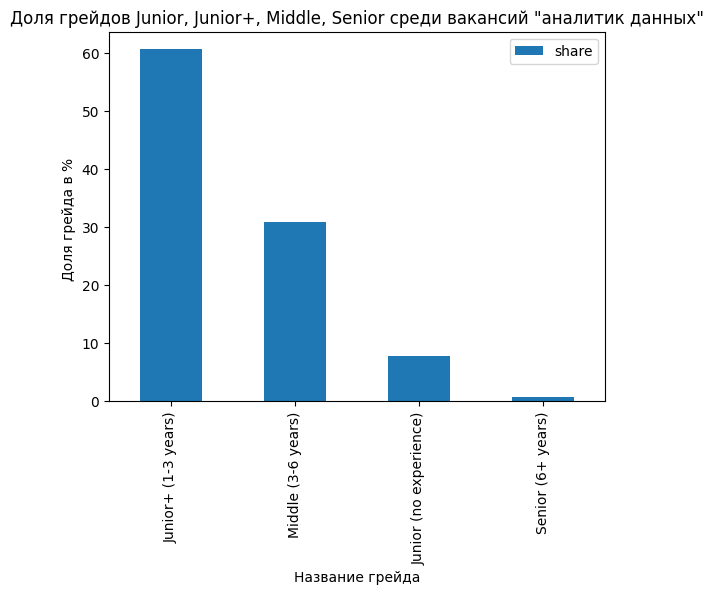

In [ ]:
data_da_distribution.plot(title = 'Доля грейдов Junior, Junior+, Middle, Senior среди вакансий "аналитик данных"',
x = 'experience', y = 'share', xlabel = 'Название грейда', ylabel= 'Доля грейда в % ',kind='bar');

Первое место держат Junior+ (1-3 years) - джуны с опытом работы от 1 до 3 лет, их доля составляет 60,5%. На втором месте с сильным отставанием миддлы - чуть меньше 31%. Вместе эти две категории составляют более 91% всех объявлений. Очень мало спрашивают джунов без опыта работы - всего 7,9% от общего числа объявлений. На последнем месте сениоры - всего 13 объявлений, что составляет 0,7% от общего числа.

Малое количество объявлений о сениорах может быть вызвано двумя факторами: низким спросом в связи с необходимостью выплачивать более высокую, чем у миддлов, зарплату (при отсутствии задач, требующих специалистов такого уровня), либо же сениоры настолько востребованы на рынке, что очень быстро находят работу, в том числе с помощью "сарафанного радио". Также не исключено сочетание обоих факторов. В связи с малым количеством объявлений о найме сеньором, необходимо с осторожностью относиться к любой информации, полученной о данном грейде, так как выборка не репрезентативна.

Спрос на аналитиков данных хотя бы с минимальным опытом работы не удивителен: многие не хотят заниматься обучением специлиалистов "с нуля" и предпочитают нанимать аналитиков хотя бы с одним годом опыта работы.

Необходимо аналогичным образом изучить данные о системных аналитиках:

In [ ]:
data_sa_distribution = data_sa.groupby('experience')['id'].count().sort_values(ascending = False)
data_sa_distribution = data_sa_distribution.reset_index()
data_sa_distribution['share'] = data_sa_distribution['id']/ 1915 * 100
data_sa_distribution

,experience,id,share
0,Middle (3-6 years),933,48.72
1,Junior+ (1-3 years),852,44.49
2,Junior (no experience),86,4.49
3,Senior (6+ years),44,2.30


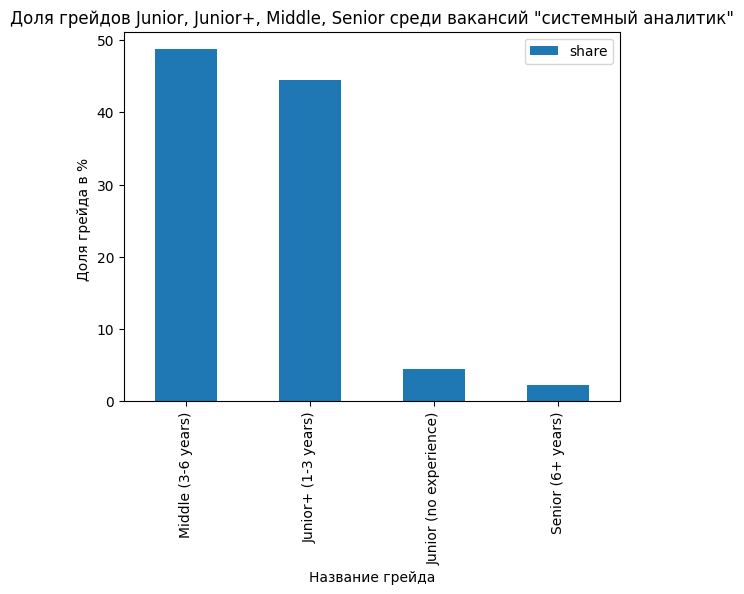

In [ ]:
data_sa_distribution.plot(title = 'Доля грейдов Junior, Junior+, Middle, Senior среди вакансий "системный аналитик"',
x = 'experience', y = 'share', xlabel = 'Название грейда', ylabel= 'Доля грейда в % ',kind='bar');

Схожая ситуация складывается и у системных аналитиков: более 93% всех объявлений касаются джунов с опытом работы и миддлов, всего 4,5% объявлений - о найме джунов без опыта работы. Сениоры самые малочисленные - только 2,3% от общего количества объявлений.

Следующий шаг - определение "типичного места работы" аналитика.

### Глава 2.3 Определение "типичного места работы" аналитика

Под "типичным местом работы" аналитика подразумеваются наиболее часто встречаемые в объявлениях условия касаемо ТОП-работодателей, зарплаты, типа занятости и графика работы. Будут представлены отдельные результаты не только для разных профессий, но и для разных грейдов.

#### Глава 2.3.1 Определение "типичного места работы" аналитика данных

Для удобства оценки датасет будет разделён на 4 датасета, по одному для каждого грейда:

In [ ]:
data_da_junior = data_da.query('experience == "Junior (no experience)"')
data_da_junior.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),"[Power BI, СУБД, Python, SQL]",...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experience),"[MS SQL, Работа с базами данных, MS Excel]",...,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,ЗП не указана
76,100475667,Junior data analyst,2024-05-28 11:22:27,https://hh.ru/vacancy/100475667,Открытая,Ventra,NaN,Москва,Junior (no experience),[],...,Полная занятость,на данный момент в компанию марс требуется спе...,данный момент компания марс требоваться специа...,56000.00,56000.00,Меньше 100 тысяч,NaN,NaN,NaN,Меньше 100 тысяч
90,100512933,Аналитик данных,2024-06-09 16:15:53,https://hh.ru/vacancy/100512933,Открытая,"TEXX, компания",NaN,Москва,Junior (no experience),"[Аналитическое мышление, Работа с большим объ...",...,Полная занятость,обязанности: аналитическая поддержка действую...,обязанность аналитический поддержка действующи...,55000.00,NaN,ЗП не указана,"умение работать с программами Word, Excel, Pow...",NaN,NaN,Меньше 100 тысяч
98,100568739,Аналитик данных,2024-06-06 10:46:09,https://hh.ru/vacancy/100568739,Открытая,НКМЗ-ГРУПП,NaN,Нефтекамск,Junior (no experience),"[Работа в условиях многозадачности, Работа в ...",...,Полная занятость,обязанности: создание спецификаций по заявкам...,обязанность создание спецификация заявка произ...,25000.00,30000.00,Меньше 100 тысяч,"Пользователь ПК, Работа в команде, Умение рабо...",NaN,NaN,Меньше 100 тысяч


In [ ]:
data_da_junior_plus = data_da.query('experience == "Junior+ (1-3 years)"')
data_da_junior_plus.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"[SQL, Power BI, СУБД, Python, Clickhouse, ...",...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,Меньше 100 тысяч
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"[Анализ данных, Коммуникация, SQL, MS Offic...",...,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация,ЗП не указана
6,100060772,Аналитик данных,2024-05-24 11:56:20,https://hh.ru/vacancy/100060772,Открытая,ГКУ Центр занятости населения города Москвы,NaN,Москва,Junior+ (1-3 years),[],...,Полная занятость,один из ключевых партнеров центра занятости на...,ключевой партнер центр занятость население раб...,100000.00,NaN,ЗП не указана,NaN,NaN,NaN,От 100 тысяч до 200 тысяч
7,100069131,Дата аналитик,2024-05-24 13:05:01,https://hh.ru/vacancy/100069131,Открытая,СБЕР,Сбер для экспертов,Санкт-Петербург,Junior+ (1-3 years),"[Документация, Проактивность, Коммуникация]",...,Полная занятость,команда данных по инвестиционным продуктам. мы...,команда данные инвестиционный продукт развиват...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация, Проактивность",ЗП не указана
8,100069821,Аналитик данных,2024-06-10 16:49:49,https://hh.ru/vacancy/100069821,Открытая,МТС,«МТС»,Казань,Junior+ (1-3 years),[],...,Полная занятость,мтс — это мультисервисная цифровая экосистема....,мтс мультисервисный цифровой экосистема создав...,72000.00,NaN,ЗП не указана,NaN,NaN,NaN,Меньше 100 тысяч


In [ ]:
data_da_middle = data_da.query('experience == "Middle (3-6 years)"')
data_da_middle.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),[Документация],...,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,ЗП не указана
5,100059110,Senior Data Analyst (Цифровой билайн),2024-06-11 11:45:29,https://hh.ru/vacancy/100059110,Открытая,билайн,"билайн: ИТ, Data, Digital",Москва,Middle (3-6 years),"[Python, SQL, Математическая статистика]",...,Полная занятость,"сегодня билайн — компания изменений, чутко реа...",сегодня билайн компания изменение чутко реагир...,NaN,NaN,ЗП не указана,"Python, SQL, Математическая статистика",NaN,NaN,ЗП не указана
10,100077503,Data Analyst,2024-05-24 14:14:00,https://hh.ru/vacancy/100077503,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[Pandas],...,Полная занятость,в команду data science ищем руководителя напра...,команда data science искать руководитель напра...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ЗП не указана
11,100077910,Data Analyst / Data Scientist,2024-06-11 14:17:47,https://hh.ru/vacancy/100077910,Открытая,Итсен,NaN,Москва,Middle (3-6 years),"[Linux, SQL, Бизнес-анализ, Hadoop, Big Da...",...,Полная занятость,мы ищем талантливого middle data analyst / dat...,искать талантливый middle data analyst data sc...,350000.00,NaN,ЗП не указана,"Python, SQL, Обучение и развитие, Data Mining,...",NaN,Аналитическое мышление,Больше 300 тысяч
13,100080293,Data analyst / Аналитик данных,2024-05-24 14:36:52,https://hh.ru/vacancy/100080293,Открытая,Колл Солюшенс,NaN,Санкт-Петербург,Middle (3-6 years),"[Анализ данных, Проактивность, SQL, Python,...",...,Полная занятость,обязанности: исследование поведения пользова...,обязанность исследование поведение пользовател...,NaN,NaN,ЗП не указана,"SQL, Python, Airflow, Анализ данных, Базы данн...",NaN,Проактивность,ЗП не указана


In [ ]:
data_da_senior = data_da.query('experience == "Senior (6+ years)"')
data_da_senior.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt
113,100602768,Аналитик данных Senior / (Интернет-эквайринг),2024-05-29 13:13:46,https://hh.ru/vacancy/100602768,Открытая,CloudPayments,NaN,Москва,Senior (6+ years),"[Проактивность, SQL, Python, BI, confluenc...",...,Полная занятость,"привет, давай знакомиться! мы — cloud, аккреди...",привет давать знакомиться cloud аккредитовать ...,NaN,NaN,ЗП не указана,"SQL, Python, ETL, Tableau, Аналитические иссле...",confluence,Проактивность,ЗП не указана
120,100630718,Data Analyst,2024-05-29 17:19:08,https://hh.ru/vacancy/100630718,Открытая,Reinvent Baltics,NaN,Москва,Senior (6+ years),"[SQL, Бизнес-анализ, Презентация результатов...",...,Полная занятость,rozert is an international product company dev...,rozert is an international product company dev...,NaN,NaN,ЗП не указана,"SQL, Python, Английский язык, Data Analysis, T...",Юнит-экономика,"Коммуникация, Решение проблем, Презентация рез...",ЗП не указана
133,100702507,Middle+/Senior Data Analyst в Data Accelerator,2024-06-11 11:57:20,https://hh.ru/vacancy/100702507,Открытая,Леруа Мерлен,Леруа Мерлен. Центральный офис,Москва,Senior (6+ years),"[SQL, A/B тесты, Python, Документация, con...",...,Полная занятость,"у нас есть core команда это data домен, которы...",core команда data домен предоставлять продукто...,NaN,NaN,ЗП не указана,"Python, SQL, A/B тесты","Pandas, confluence",Документация,ЗП не указана
134,100703282,Middle+/Senior Data Analyst в Data Accelerator,2024-06-11 12:03:17,https://hh.ru/vacancy/100703282,Открытая,Леруа Мерлен,Леруа Мерлен. Центральный офис,Москва,Senior (6+ years),"[SQL, A/B тесты, Python, Документация, con...",...,Полная занятость,"у нас есть core команда это data домен, которы...",core команда data домен предоставлять продукто...,NaN,NaN,ЗП не указана,"Python, SQL, A/B тесты","Pandas, confluence",Документация,ЗП не указана
388,91475828,Бизнес-аналитик / Аналитик данных,2024-04-01 10:51:07,https://hh.ru/vacancy/91475828,Открытая,Секонд Сайт,NaN,Москва,Senior (6+ years),[Проактивность],...,Полная занятость,"second sight - амбициозная ит-компания, объеди...",second sight амбициозный ита компания объединя...,200000.00,280000.00,От 200 тысяч до 300 тысяч,NaN,NaN,Проактивность,От 200 тысяч до 300 тысяч


Датафреймы созданы.

In [ ]:
data_da_junior.shape

(142, 21)

In [ ]:
data_da_junior_plus.shape

(1091, 21)

In [ ]:
data_da_middle.shape

(555, 21)

In [ ]:
data_da_senior.shape

(13, 21)

В каждом новом датафрейме 21 столбец. Количество строк соответствует числу объявлений. Таким образом, в выборках:
* по джунам без опыта работы - 142 объявления;
* по джунам с опытом работы - 1091 объявление;
* по миддлам - 555 объявлений;
* по сениорам - 13 объявлений.

Выборку сениоров нельзя назвать репрезентативной, рекомендуется повторное исследование при большем количестве доступных данных.

Можно начинать исследование.

**ТОП-работодателей**

По каждому грейду будет создана отдельная таблица с ТОП-10 работодателей, для удобства сравнения все четыре таблицы будут объединены. Графики будут представлены отдельно для каждого грейда.

In [ ]:
top_work_j = data_da_junior.groupby('employer')['id'].count().sort_values(ascending = False)
top_work_j  = top_work_j.reset_index()

top_work_jp = data_da_junior_plus.groupby('employer')['id'].count().sort_values(ascending = False)
top_work_jp = top_work_jp.reset_index()

top_work_m = data_da_middle.groupby('employer')['id'].count().sort_values(ascending = False)
top_work_m  = top_work_m.reset_index()

top_work_s = data_da_senior.groupby('employer')['id'].count().sort_values(ascending = False)
top_work_s  = top_work_s.reset_index()

data_top_all = pd.concat([top_work_j, top_work_jp, top_work_m, top_work_s], axis=1)
data_top_all.columns = ['junior', 'amount', 'junior_plus', 'amount', 'middle', 'amount', 'senior', 'amount']
data_top_all.head(10)



,junior,amount,junior_plus,amount,middle,amount,senior,amount
0,СБЕР,13.00,СБЕР,159,СБЕР,71.00,Леруа Мерлен,4.00
1,"МАГНИТ, Розничная сеть",7.00,Банк ВТБ (ПАО),24,WILDBERRIES,26.00,Reinvent Baltics,2.00
2,DNS Технологии,4.00,Ozon,17,Т1,21.00,Aramco Innovations,1.00
3,"Согласие, страховая компания",4.00,WILDBERRIES,16,Ozon,15.00,B2Broker,1.00
4,ANCOR,3.00,"МАГНИТ, Розничная сеть",15,Яндекс,14.00,CloudPayments,1.00
5,Юникон АП,3.00,МТС,15,INGURU.RU,9.00,PayMatrix,1.00
6,Группа страховых компаний Югория,2.00,Okko,12,Maxim technology,8.00,Spice Agency,1.00
7,Ростелеком - Центры обработки данных,2.00,Ростелеком,12,USETECH,8.00,Мединвестгрупп,1.00
8,Between Exchange,2.00,Центральный банк Российской Федерации,12,Okko,7.00,Секонд Сайт,1.00
9,Газпромбанк,2.00,ГКУ Центр занятости населения города Москвы,11,«UZUM TECHNOLOGIES».,7.00,NaN,NaN


В первую очередь видно, что в трёх из четырёх грейдов лидером по количеству объявлений является "СБЕР". Ниже будут рассмотрены грейды по отдельности.

**Джуны без опыта работы**
Джунам без опыта работы "СБЕР" предлагает 13 вакансий . На второ месте - "Магнит" - таких предложений 7. Замыкает тройку лидеров "DNS Технологии" и страховая компания "Согласие" - каждая компания опубликовала по 4 объявления. Больше ни одна компания не опубликовала более 3 объявлений.

**Джуны с опытом работы**
Как и в случае с джунами без опыта работы, лидерами по предлагаемым вакансиям для джунов с опытом остаётся "СБЕР" - целых 159 предложений. На втором месте с большим отрывом находится банк "ВТБ" (24 вакансии), третье место у "Ozon" - 17 вариантов. "Wildberries" находится на четвёртом месте с 16 вакансиями, пятое место делят "Магнит" и "МТС" - по 15 вакансий у каждой компании.

**Миддлы**

"Сбер" снова в лидерах - 71 предложение. Второе иместо у "Wildberries" - 26 предложений, третье у "Т1" - 21 предложение. "Ozon" на 4-м месте: 15 объявлений, замыкает ТОП-5 "Яндекс" - 14 объявлений. Больше из работодателей никто не опубликовал более 9 вакансий.

**Сениоры**

"Сбер" впервые не только не возглавляет рейтинг, но даже не участвует в нём. На первом месте "Леруа Мерлен" - 4 объявления. Второе место у Reinvent Baltics - 2 вакансии. У остальных компаний всего по 1 вакансии.

**Зарплата**

In [ ]:
data_w_j = data_da_junior['salary_from'].agg(['min','mean', 'max'])

data_w_jp = data_da_junior_plus['salary_from'].agg(['min','mean', 'max'])

data_w_m = data_da_middle['salary_from'].agg(['min','mean', 'max'])

data_w_s = data_da_senior['salary_from'].agg(['min','mean', 'max'])

data_salary_all = pd.concat([data_w_j, data_w_jp, data_w_m ,data_w_s], axis=1)

data_salary_all.columns = ['junior', 'junior_plus', 'middle', 'senior']

data_salary_all

,junior,junior_plus,middle,senior
min,25000.00,28940.00,40000.00,70000.00
mean,65593.66,98010.47,173962.60,156666.67
max,140000.00,300000.00,398000.00,200000.00


Как уже упоминалось ранее, в качестве зарплаты рассматривается только значение salary_from, так как только эта зарплата является "гарантированной".

Минимальная заработная плата для джуна без опыта работы составляет 25 тысяч рублей, максимальная - 140 тысяч. Медианное значение - 65,6 тысяч рублей.

Минимальная заработная плата для джуна c опытом работы составляет 28,9 тысяч рублей, максимальная - 300 тысяч. Медианное значение - 98 тысяч рублей.

Минимальная заработная плата для миддла - 40 тысяч рублей, максимальная - 398 тысяч. Медианное значение составляет 174 тысячи рублей.

Минимальная заработная плата у сениора составляет 70 тысяч рубоей, максимальная - 200 тысяч. Медианная зарплата - 156,7 тысяч рублей.

**Категория зарплаты**

Дополнительно рассмотрим зарплаты по категориям:

In [ ]:
data_wages_j = data_da_junior.groupby('salary_bin_alt')['id'].count().sort_values(ascending = False)
data_wages_j = data_wages_j.reset_index()
data_wages_j['share'] = data_wages_j['id']/ 142 * 100
data_wages_j.columns = ['junior_salary_bin', 'amount', 'share']

data_wages_jp = data_da_junior_plus.groupby('salary_bin_alt')['id'].count().sort_values(ascending = False)
data_wages_jp = data_wages_jp.reset_index()
data_wages_jp['share'] = data_wages_jp['id']/ 1091 * 100
data_wages_jp.columns = ['junior+_salary_bin', 'amount', 'share']

data_wages_m = data_da_middle.groupby('salary_bin_alt')['id'].count().sort_values(ascending = False)
data_wages_m = data_wages_m.reset_index()
data_wages_m['share'] = data_wages_m['id']/ 555 * 100
data_wages_m.columns = ['middle_salary_bin', 'amount', 'share']

data_wages_s = data_da_senior.groupby('salary_bin_alt')['id'].count().sort_values(ascending = False)
data_wages_s = data_wages_s.reset_index()
data_wages_s['share'] = data_wages_s['id']/ 13 * 100
data_wages_s.columns = ['senior_salary_bin', 'amount', 'share']


data_wages_all = pd.concat([data_wages_j, data_wages_jp, data_wages_m ,data_wages_s], axis=1)

data_wages_all

,junior_salary_bin,amount,share,junior+_salary_bin,amount,share,middle_salary_bin,amount,share,senior_salary_bin,amount,share
0,ЗП не указана,86.00,60.56,ЗП не указана,877,80.38,ЗП не указана,480,86.49,ЗП не указана,10.00,76.92
1,Меньше 100 тысяч,53.00,37.32,Меньше 100 тысяч,115,10.54,От 100 тысяч до 200 тысяч,38,6.85,От 200 тысяч до 300 тысяч,2.00,15.38
2,От 100 тысяч до 200 тысяч,3.00,2.11,От 100 тысяч до 200 тысяч,89,8.16,От 200 тысяч до 300 тысяч,22,3.96,Меньше 100 тысяч,1.00,7.69
3,NaN,NaN,NaN,От 200 тысяч до 300 тысяч,9,0.82,Меньше 100 тысяч,8,1.44,NaN,NaN,NaN
4,NaN,NaN,NaN,Больше 300 тысяч,1,0.09,Больше 300 тысяч,7,1.26,NaN,NaN,NaN


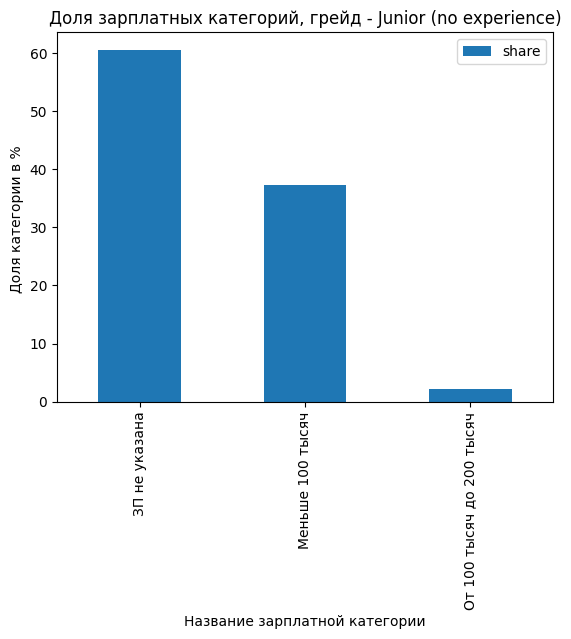

In [ ]:
data_wages_j.plot(title = 'Доля зарплатных категорий, грейд - Junior (no experience)',
x = 'junior_salary_bin', y = 'share', xlabel = 'Название зарплатной категории', ylabel= 'Доля категории в % ',kind='bar');

В 60% случаев размер зарплаты джунов не указан. В категорию "От 100 тысяч до 200 тысяч" попало только 3 объявления, или 2,1% от общего числа объявлений для джунов без опыта работы. В 37% объявлений указано, что зарплата будет составлять "меньше 100 тысяч рублей".

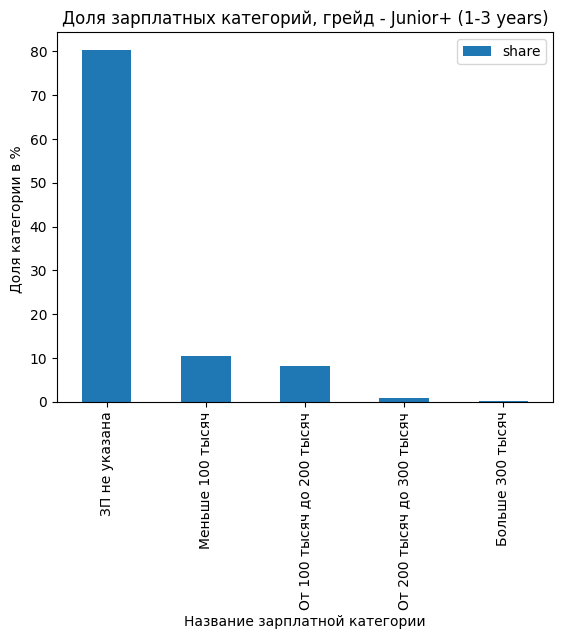

In [ ]:
data_wages_jp.plot(title = 'Доля зарплатных категорий, грейд - Junior+ (1-3 years)',
x = 'junior+_salary_bin', y = 'share', xlabel = 'Название зарплатной категории', ylabel= 'Доля категории в % ',kind='bar');

Размер зарплат не указан в 80% объявлений для джунов с опытом работы. Чаще всего указывают зарплатs в категории "меньше 100 тысяч" - в 10,5% случаев. В 8,2% объявлений указана зарплата категории "от 100 тысяч до 200 тысяч". Очень редко попадаются объявления с зарплатой от 200 до 300 тысяч (0,8%), зарплаты выше 300 тысяч не попадаются почти никогда
(0,1%).

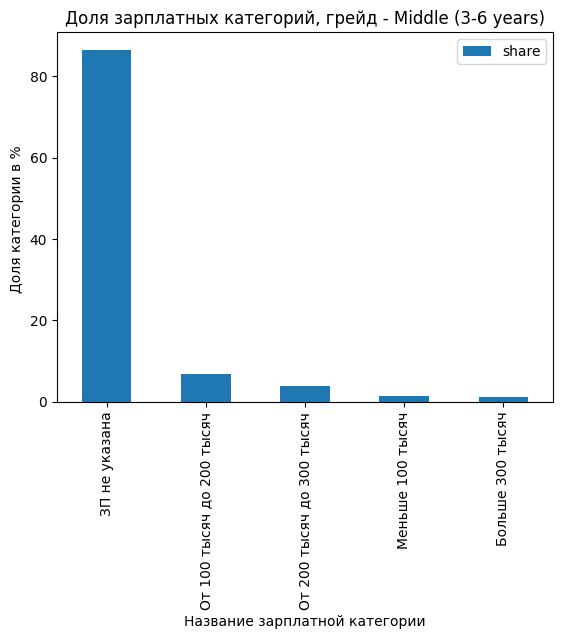

In [ ]:
data_wages_m.plot(title = 'Доля зарплатных категорий, грейд - Middle (3-6 years)',
x = 'middle_salary_bin', y = 'share', xlabel = 'Название зарплатной категории', ylabel= 'Доля категории в % ',kind='bar');

И снова в большинстве объявлений не указан уровень зарплат - их количество составляет более 86,5%. На втором месте вакансии с зарплатной категорией "от 100 тысяч до 200 тысяч" - их в выборке 6,9%. Меньше у категории "от 200 тысяч до 300 тысяч" - всего 4%. Крайне редко встречается категория "меньше 100 тысяч" (1,5%), и почти так же редко встречается  категория "больше 300 тысяч"  - лишь в 1,3% случаев, что неудивительно, учитывая "средний" уровень специалистов и ожидаемый соответствующий уровень зарплат.

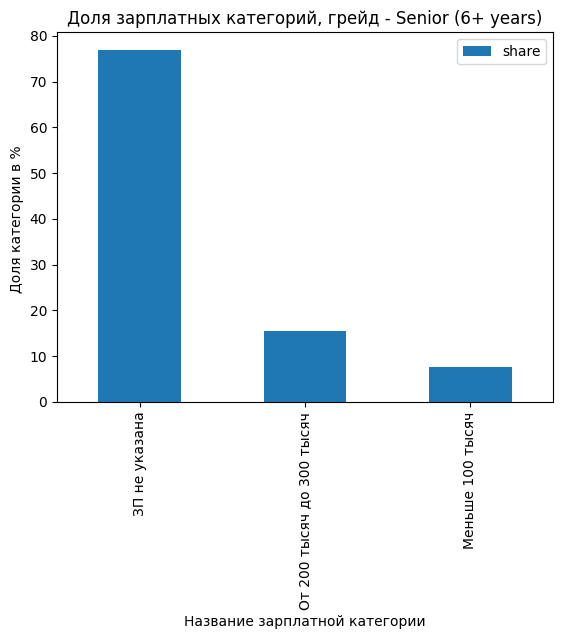

In [ ]:
data_wages_s.plot(title = 'Доля зарплатных категорий, грейд - Senior (6+ years)',
x = 'senior_salary_bin', y = 'share', xlabel = 'Название зарплатной категории', ylabel= 'Доля категории в % ',kind='bar');

Размер зарплаты не указан в 77% объявлений, в 15% он составляет от 200 до 300 тысяч рублей. Также есть одно объявление в категории "меньше 100 тысяч рублей", что составляет 7,69% всех объявлений данной выборки.

**Тип занятости**

Настало время изучить тип занятости.

In [ ]:
data_emp_j = data_da_junior.groupby('employment')['id'].count().sort_values(ascending = False)
data_emp_j  = data_emp_j.reset_index()
data_emp_j['share'] = data_emp_j['id']/ 142 * 100
data_emp_j.columns = ['employment_junior', 'amount', 'share']

data_emp_jp = data_da_junior_plus.groupby('employment')['id'].count().sort_values(ascending = False)
data_emp_jp  = data_emp_jp.reset_index()
data_emp_jp['share'] = data_emp_jp['id']/ 1091 * 100
data_emp_jp.columns = ['employment_junior+', 'amount', 'share']

data_emp_m = data_da_middle.groupby('employment')['id'].count().sort_values(ascending = False)
data_emp_m  = data_emp_m.reset_index()
data_emp_m['share'] = data_emp_m['id']/ 555 * 100
data_emp_m.columns = ['employment_middle', 'amount', 'share']

data_emp_s = data_da_senior.groupby('employment')['id'].count().sort_values(ascending = False)
data_emp_s = data_emp_s.reset_index()
data_emp_s['share'] = data_emp_s['id']/ 13 * 100
data_emp_s.columns = ['employment_senior', 'amount', 'share']

data_sched_all = pd.concat([data_emp_j, data_emp_jp, data_emp_m, data_emp_s], axis=1)

data_sched_all

,employment_junior,amount,share,employment_junior+,amount,share,employment_middle,amount,share,employment_senior,amount,share
0,Полная занятость,123,86.62,Полная занятость,1079,98.90,Полная занятость,549.00,98.92,Полная занятость,13.00,100.00
1,Стажировка,15,10.56,Частичная занятость,8,0.73,Частичная занятость,5.00,0.90,NaN,NaN,NaN
2,Частичная занятость,3,2.11,Проектная работа,3,0.27,Проектная работа,1.00,0.18,NaN,NaN,NaN
3,Проектная работа,1,0.70,Стажировка,1,0.09,NaN,NaN,NaN,NaN,NaN,NaN


От 86,6% до 100% объявлений для каждого грейда имеют тип "Полная занятость".

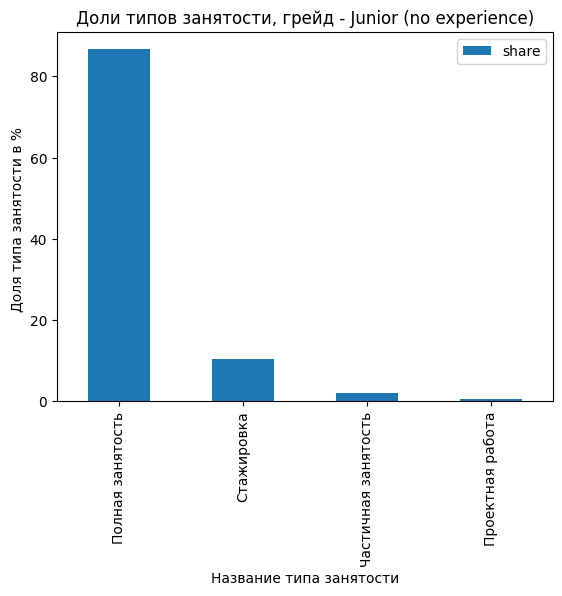

In [ ]:
data_emp_j.plot(title = 'Доли типов занятости, грейд - Junior (no experience)',
x = 'employment_junior', y = 'share', xlabel = 'Название типа занятости', ylabel= 'Доля типа занятости в % ',kind='bar');

Более 85% предлагаемых вакансий имеют тип "полная занятость". Стажировки составляют ещё 10,5%. Предложений с частичной занятостью всего 2,1%, а проектных работ и того меньше - 0,7%.

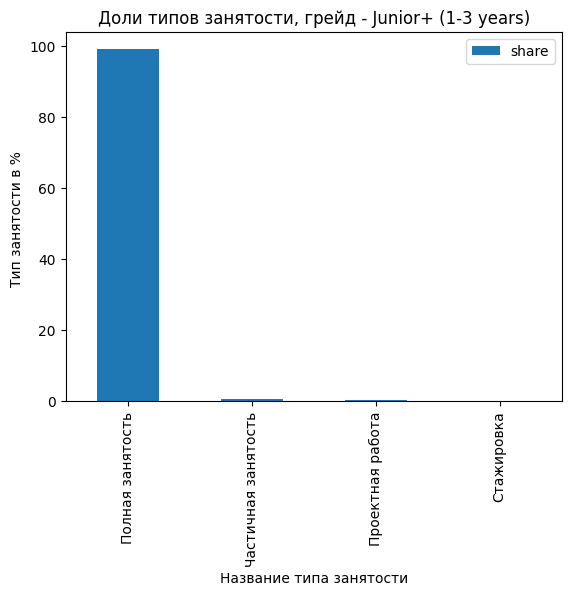

In [ ]:
data_emp_jp.plot(title = 'Доли типов занятости, грейд - Junior+ (1-3 years)',
x = 'employment_junior+', y = 'share', xlabel = 'Название типа занятости', ylabel= 'Тип занятости в % ',kind='bar');

Почти вся предлагаемая работа - 99% - относится к "полной занятости". Частичная занятость составляет лишь 0,7%, проектые работы - 0,3%, стажировки - 0,1% от общего числа объявлений для джунов с опытом работы. Последнее не удивительно, так как на данном этапе сотрудник уже имеет опыт работы и в стажировках обычно не нуждается.

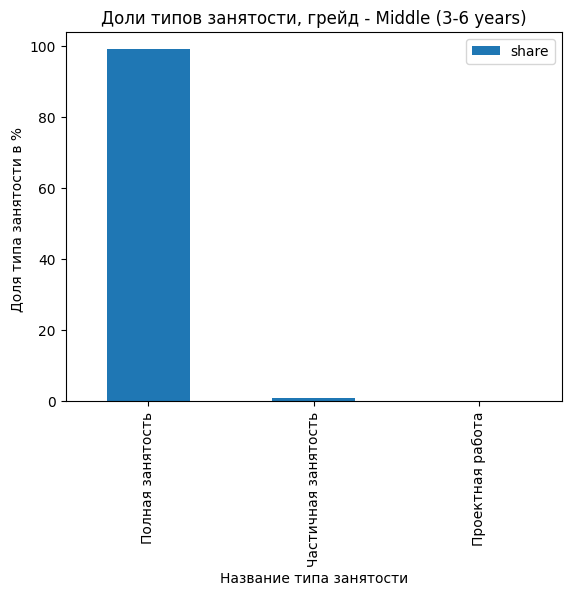

In [ ]:
data_emp_m.plot(title = 'Доли типов занятости, грейд - Middle (3-6 years)',
x = 'employment_middle', y = 'share', xlabel = 'Название типа занятости', ylabel= 'Доля типа занятости в % ',kind='bar');

Ожидаемо, что для специалистов данного уровня не предлагаются стажировки. 99% всех объявлений имеют тип "полная занятость", 0,9% составляет "частичная занятость", 0,1% - "проектная работа".

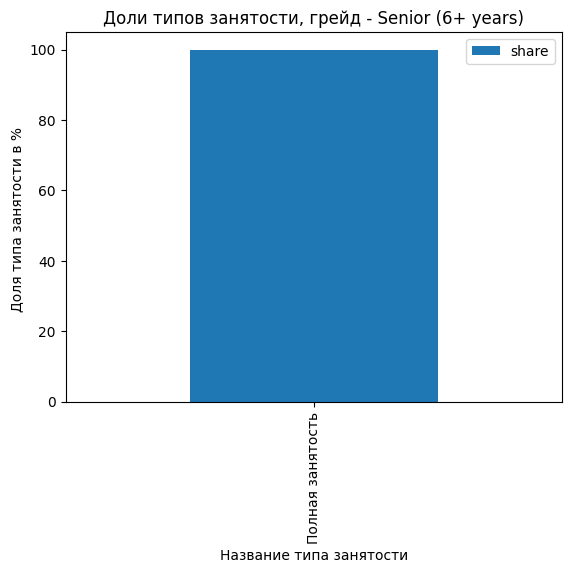

In [ ]:
data_emp_s.plot(title = 'Доли типов занятости, грейд - Senior (6+ years)',
x = 'employment_senior', y = 'share', xlabel = 'Название типа занятости', ylabel= 'Доля типа занятости в % ',kind='bar');

У сениоров единственный предлагаемый тип - полная занятость.

**График работы**

Наконец, необходимо рассмотреть графики работы.

In [ ]:
data_sched_j = data_da_junior.groupby('schedule')['id'].count().sort_values(ascending = False)
data_sched_j = data_sched_j.reset_index()
data_sched_j['share'] = data_sched_j['id']/ 142 * 100
data_sched_j.columns = ['schedule_junior', 'amount', 'share']

data_sched_jp = data_da_junior_plus.groupby('schedule')['id'].count().sort_values(ascending = False)
data_sched_jp = data_sched_jp.reset_index()
data_sched_jp['share'] = data_sched_jp['id']/ 1091 * 100
data_sched_jp.columns = ['schedule_junior_plus', 'amount', 'share']

data_sched_m = data_da_middle.groupby('schedule')['id'].count().sort_values(ascending = False)
data_sched_m = data_sched_m.reset_index()
data_sched_m['share'] = data_sched_m['id']/ 555 * 100
data_sched_m.columns = ['schedule_middle', 'amount', 'share']

data_sched_s = data_da_senior.groupby('schedule')['id'].count().sort_values(ascending = False)
data_sched_s = data_sched_s.reset_index()
data_sched_s['share'] = data_sched_s['id']/ 13 * 100
data_sched_s.columns = ['schedule_senior', 'amount', 'share']

data_sched_all = pd.concat([data_sched_j, data_sched_jp, data_sched_m , data_sched_s], axis=1)

data_sched_all

,schedule_junior,amount,share,schedule_junior_plus,amount,share,schedule_middle,amount,share,schedule_senior,amount,share
0,Полный день,122,85.92,Полный день,905,82.95,Полный день,406.00,73.15,Полный день,8.00,61.54
1,Удаленная работа,15,10.56,Удаленная работа,158,14.48,Удаленная работа,132.00,23.78,Удаленная работа,5.00,38.46
2,Гибкий график,3,2.11,Гибкий график,21,1.92,Гибкий график,17.00,3.06,NaN,NaN,NaN
3,Сменный график,2,1.41,Сменный график,7,0.64,NaN,NaN,NaN,NaN,NaN,NaN


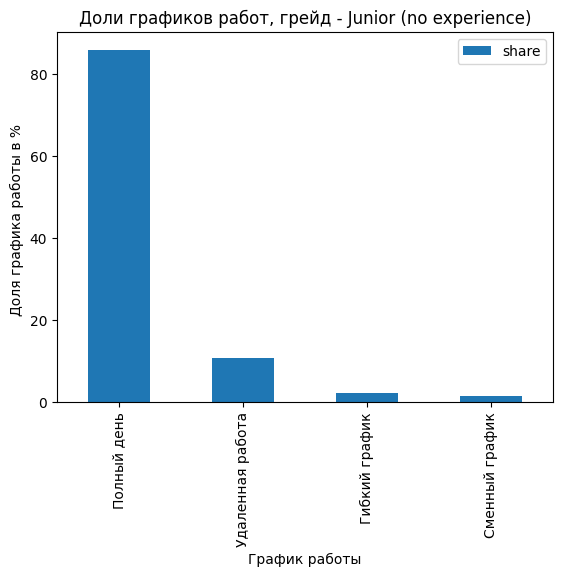

In [ ]:
data_sched_j.plot(title = 'Доли графиков работ, грейд - Junior (no experience)',
x = 'schedule_junior', y = 'share', xlabel = 'График работы', ylabel= 'Доля графика работы в % ',kind='bar');

И снова есть очевидный победитель, имеющий долю около 86% в представленной выборке - это "полный день". "Удалённая работа" занимает второе место с результатом в 10,5%. Было всего 3 объявления с гибким графиком работы (2,1%) и 2 со сменным графиком работы (1,4%).

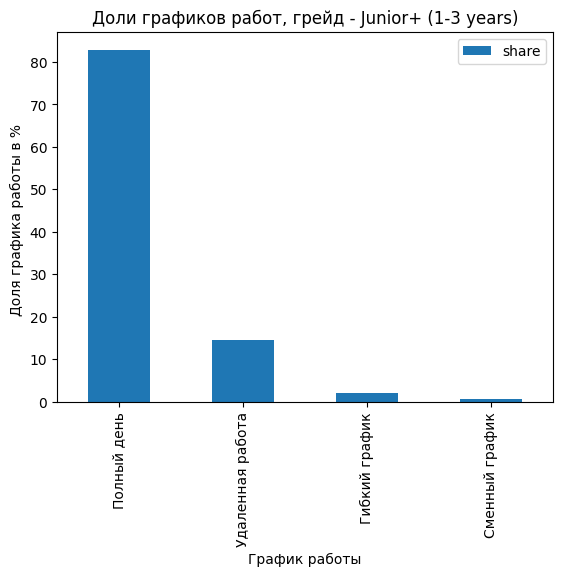

In [ ]:
data_sched_jp.plot(title = 'Доли графиков работ, грейд - Junior+ (1-3 years)',
x = 'schedule_junior_plus', y = 'share', xlabel = 'График работы', ylabel= 'Доля графика работы в % ',kind='bar');

График "полный день" снова лидирует - он указан в 83% объявлений. На втором месте удалённая работа - 15,5%. Гибкий график предлагается лишь в 1,9% случаев, а сменный ещё реже - в 0,6% случаев.

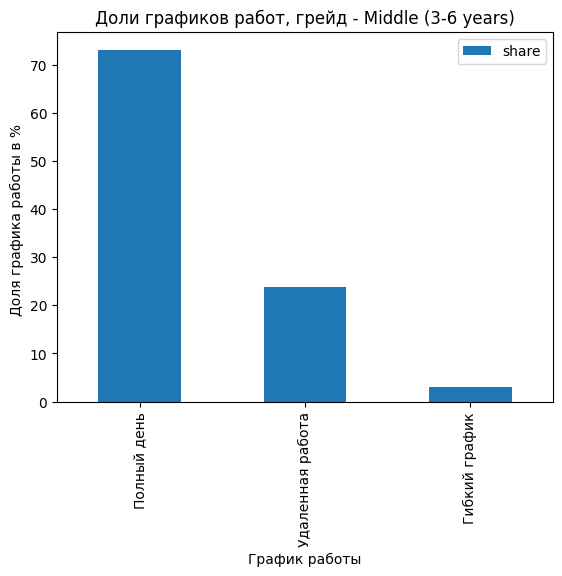

In [ ]:
data_sched_m.plot(title = 'Доли графиков работ, грейд - Middle (3-6 years)',
x = 'schedule_middle', y = 'share', xlabel = 'График работы', ylabel= 'Доля графика работы в % ',kind='bar');

Почти три четверти всех объявлений (73%) предлагают полный день, 24% - удалённую работу, и лишь 3% - гибкий график.

Последний грейд аналитиков данных -  сениоры.

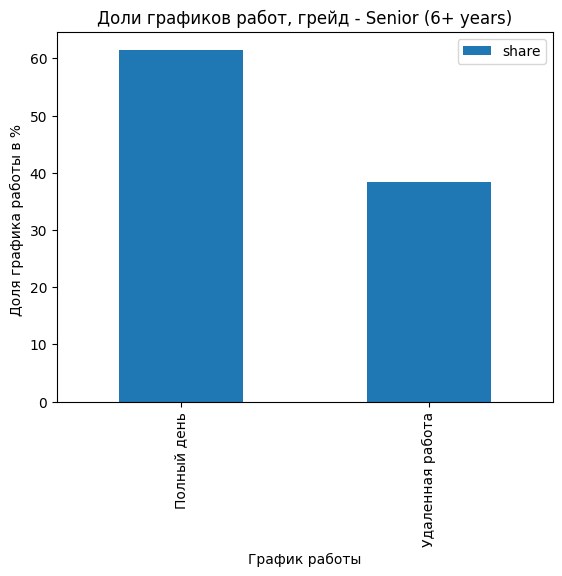

In [ ]:
data_sched_s.plot(title = 'Доли графиков работ, грейд - Senior (6+ years)',
x = 'schedule_senior', y = 'share', xlabel = 'График работы', ylabel= 'Доля графика работы в % ',kind='bar');

Полный рабочий день предлагают 61,5% вакансий, остальные - удалённую работу.

**Итоги. Профили работ аналитиков данных по грейдам**

Ниже приводится краткое описание типичного места работы аналитика данных для каждого грейда.

**Джун без опыта работы**

Типичное место работы:
* ТОП-3 работодателей: "СБЕР", "МАГНИТ", "DNS Технологии"
* Медианная зарплата - 65,6 тысяч рублей
* Тип занятости - полная занятость
* График работы - полный день

**Джун с опытом работы**

Типичное место работы:
* ТОП-3 работодателей: "СБЕР", "ВТБ", "Ozon"
* Медианная зарплата - 98 тысяч рублей
* Тип занятости - полная занятость
* График работы - полный день

**Миддл**

Типичное место работы:
* ТОП-3 работодателей: "СБЕР", "Wildberries", "Т1"
* Медианная зарплата - 174 тысячи рублей
* Тип занятости - полная занятость
* График работы - полный день

**Сениор**

Типичное место работы:
* ТОП-3 работодателей: "Леруа Мерлен", "Reinvent Baltics", "Aramco Innovations"
* Медианная зарплата - 156,7 тысячи рублей
* Тип занятости - полная занятость
* График работы - полный день

Удивительно, но медианная зарплата сениором оказалась ниже медианной зарплаты миддлов. Скорее всего, это связано с размером выборки сениоров, а также с тем, что работодатели крайне неохотно публикуют размеры зарплат, даже минимальный уровень.

### Глава 2.3.2 Определение "типичного места работы" системного аналитика

Всю вышеописанную процедуру надлежит повторить для второго датасета - датасета системных аналитиков.

Создание четырёх датасетов по грейдам:

In [ ]:
data_sa_junior = data_sa.query('experience == "Junior (no experience)"')
data_sa_junior.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt
12,100332536,Системный аналитик на внедрение TMS-системы 1С,2024-07-08 10:54:02,https://hh.ru/vacancy/100332536,Открытая,Останкинский мясоперерабатывающий холдинг,"«Останкинский мясоперерабатывающий холдинг», Ц...",Москва,Junior (no experience),[],...,Полная занятость,"задачи, которые предстоит решать: формализаци...",задача предстоять решать формализация бизнес п...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,ЗП не указана
16,100385756,Системный аналитик,2024-07-01 09:06:18,https://hh.ru/vacancy/100385756,Открытая,Курский электроаппаратный завод,NaN,Курск,Junior (no experience),[Аналитическое мышление],...,Полная занятость,чем вам предстоит заниматься: разрабатывать п...,предстоять заниматься разрабатывать прикладной...,NaN,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление,ЗП не указана
111,101234427,Младший системный аналитик,2024-06-28 14:33:49,https://hh.ru/vacancy/101234427,Открытая,"ЭФКО, Управляющая компания",Информационные технологии,Воронеж,Junior (no experience),[],...,Полная занятость,"что нужно делать: сбор, анализ и оценка требов...",нужно делать сбор анализ оценка требование пол...,50000.00,80000.00,Меньше 100 тысяч,NaN,NaN,NaN,Меньше 100 тысяч
210,101588085,"Системный аналитик Junior (SQL, SOAP, ТЗ)",2024-07-06 21:31:56,https://hh.ru/vacancy/101588085,Открытая,Кузница Кадров,NaN,Москва,Junior (no experience),"[Постановка задач разработчикам, SQL, SOAP, ...",...,Полная занятость,внимание! трудоустройство напрямую к работодат...,внимание трудоустройство напрямую работодатель...,70000.00,90000.00,Меньше 100 тысяч,"Системный анализ, UML, SQL, SOAP, Постановка з...",confluence,Документация,Меньше 100 тысяч
226,101637008,Ведущий специалист-эксперт (системный/бизнес а...,2024-07-09 09:54:02,https://hh.ru/vacancy/101637008,Открытая,Министерство цифрового развития государственно...,NaN,Уфа,Junior (no experience),"[Разработка технических заданий, Разработка р...",...,Полная занятость,министерство цифрового развития государственно...,министерство цифровой развитие государственный...,45000.00,50000.00,Меньше 100 тысяч,"Разработка технических заданий, Управление про...",NaN,"Документация, Аналитическое мышление",Меньше 100 тысяч


In [ ]:
data_sa_junior_plus = data_sa.query('experience == "Junior+ (1-3 years)"')
data_sa_junior_plus.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"[Разработка технических заданий, Бизнес-анали...",...,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),[Документация],...,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.00,NaN,ЗП не указана,NaN,NaN,Документация,От 200 тысяч до 300 тысяч
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"[JSON, SQL, XML, SOAP, HTML, JS, Java, ...",...,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN,ЗП не указана
5,100065546,Системный аналитик ЦФТ-Банк,2024-07-09 10:42:25,https://hh.ru/vacancy/100065546,Открытая,Т1,ГК Иннотех | Финтех (Иннотех),Москва,Junior+ (1-3 years),"[MS SQL, Документация, ЦФТ, BPMN]",...,Полная занятость,ищем системного аналитика цфт! в небольшую ски...,искать системный аналитик цфт небольшой скилло...,NaN,NaN,ЗП не указана,"ЦФТ, BPMN, MS SQL",NaN,Документация,ЗП не указана
6,100083149,Системный аналитик 1С ERP,2024-07-08 09:25:24,https://hh.ru/vacancy/100083149,Открытая,Simple,Simple. Дирекция по информационным технологиям,Санкт-Петербург,Junior+ (1-3 years),"[Системный анализ, 1С ERP Битфинанс, Докумен...",...,Полная занятость,команда ит реализует сложные и при этом интере...,команда ита реализовать сложный интересный про...,NaN,NaN,ЗП не указана,"Системный анализ, 1С ERP, 1С ERP Битфинанс",NaN,Документация,ЗП не указана


In [ ]:
data_sa_middle = data_sa.query('experience == "Middle (3-6 years)"')
data_sa_middle.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"[1С, Аналитический склад ума, confluence, SQL]",...,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана
13,100355513,Системный аналитик,2024-07-05 16:13:57,https://hh.ru/vacancy/100355513,Открытая,YADRO,NaN,Москва,Middle (3-6 years),"[REST API, Atlassian Jira, Анализ данных, И...",...,Полная занятость,"r&amp;d центры расположены в москве, санкт-пет...",r amp d центр располагать москва санкт петербу...,NaN,NaN,ЗП не указана,"REST API, Базы данных, Atlassian Jira, Atlassi...",confluence,NaN,ЗП не указана
14,100355929,Системный аналитик,2024-07-05 18:40:43,https://hh.ru/vacancy/100355929,Открытая,Майнитек,NaN,Екатеринбург,Middle (3-6 years),"[Doker, JSON, Знание БД, REST, Python, SO...",...,Полная занятость,приглашаем на работу системного аналитика (не ...,приглашать работа системный аналитик бизнес ан...,NaN,NaN,ЗП не указана,"Python, системная аналитика, Знание БД, написа...",confluence,Документация,ЗП не указана
15,100380969,Системный аналитик (aCRM),2024-07-01 11:55:53,https://hh.ru/vacancy/100380969,Открытая,Страховая компания Пульс,NaN,Москва,Middle (3-6 years),"[Atlassian Jira, SQL, XML, Юнит-экономика, ...",...,Полная занятость,ск пульс - иншуртех-стартап в составе росгосст...,ск пульс иншуртех стартап состав росгосстрах д...,NaN,NaN,ЗП не указана,"BPMN, XML, Аналитическое мышление, SQL, Atlass...","confluence, Юнит-экономика","Документация, Аналитическое мышление",ЗП не указана
19,100401350,Системный Аналитик (УВД),2024-07-03 16:48:22,https://hh.ru/vacancy/100401350,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),"[confluence, Документация]",...,Полная занятость,продукт: финансовая доставка объединяет в себе...,продукт финансовый доставка объединять канал д...,NaN,NaN,ЗП не указана,NaN,confluence,Документация,ЗП не указана


In [ ]:
data_sa_senior = data_sa.query('experience == "Senior (6+ years)"')
data_sa_senior.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"[ERP, Atlassian Jira, 1С: Управление Произво...",...,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация,ЗП не указана
38,100584805,Ведущий системный аналитик,2024-07-05 17:17:20,https://hh.ru/vacancy/100584805,Открытая,БФТ-Холдинг (Бюджетные и Финансовые Технологии),NaN,Санкт-Петербург,Senior (6+ years),"[JSON API, Разработка технических заданий, Б...",...,Полная занятость,бфт-холдинг (входит в группу компаний «ростеле...,бфт холдинг входить группа компания ростелеком...,NaN,NaN,ЗП не указана,"BPMN, UML, EPC, Проектная документация, Разраб...",confluence,Документация,ЗП не указана
76,100870194,Senior системный аналитик,2024-06-27 16:49:35,https://hh.ru/vacancy/100870194,Открытая,Т1,ГК Иннотех | Финтех (Иннотех),Москва,Senior (6+ years),"[REST, SQL, Документация, Camunda, BPMN, ...",...,Полная занятость,о проекте: мы создаем платформу для цифровизац...,проект создавать платформа цифровизация рабочи...,NaN,NaN,ЗП не указана,"BPMN, Camunda, API, REST, SQL",NaN,Документация,ЗП не указана
132,101296233,Главный системный аналитик,2024-07-01 11:23:37,https://hh.ru/vacancy/101296233,Открытая,Т1,ГК Иннотех | Финтех (Иннотех),Москва,Senior (6+ years),"[Документация, Коммуникация]",...,Полная занятость,"вместе с нами тебе предстоит: выявление, анал...",вместе предстоять выявление анализ фиксация ко...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация",ЗП не указана
222,101623594,Системный аналитик - senior,2024-07-07 11:21:53,https://hh.ru/vacancy/101623594,Открытая,Эргос и Логос,NaN,Москва,Senior (6+ years),"[jQuery, MS SQL, XML, Atlassian Jira, Fast...",...,Полная занятость,привет! наша компания реализует проект по типу...,привет наш компания реализовать проект тип аут...,180000.00,290000.00,От 200 тысяч до 300 тысяч,"UML, Системный анализ, XML, BPMN, SQL, Postgre...",NaN,Документация,От 100 тысяч до 200 тысяч


Датафреймы созданы.

In [ ]:
data_sa_junior.shape

(86, 21)

In [ ]:
data_sa_junior_plus.shape

(852, 21)

In [ ]:
data_sa_middle.shape

(933, 21)

In [ ]:
data_sa_senior.shape

(44, 21)

В каждом новом датафрейме 21 столбец. Количество строк соответствует числу объявлений.
В выборках:
* по джунам без опыта работы - 86 объявления;
* по джунам с опытом работы - 852 объявления;
* по миддлам - 933 объявления;
* по сениорам - 44 объявления.

Выборку сениоров нельзя назвать репрезентативной.

**ТОП-работодателей**

По каждому грейду вновь будет создана отдельная таблица с ТОП-10 работодателей, для удобства сравнения все четыре таблицы будут объединены. Графики будут представлены отдельно для каждого грейда.

In [ ]:
top_work_j_2 = data_sa_junior.groupby('employer')['id'].count().sort_values(ascending = False)
top_work_j_2 = top_work_j_2.reset_index()

top_work_jp_2 = data_sa_junior_plus.groupby('employer')['id'].count().sort_values(ascending = False)
top_work_jp_2 = top_work_jp_2.reset_index()

top_work_m_2 = data_sa_middle.groupby('employer')['id'].count().sort_values(ascending = False)
top_work_m_2  = top_work_m_2 .reset_index()

top_work_s_2 = data_sa_senior.groupby('employer')['id'].count().sort_values(ascending = False)
top_work_s_2 = top_work_s_2.reset_index()

data_top_all_2 = pd.concat([top_work_j_2, top_work_jp_2, top_work_m_2, top_work_s_2], axis=1)
data_top_all_2.columns = ['junior', 'amount', 'junior_plus', 'amount', 'middle', 'amount', 'senior', 'amount']
data_top_all_2.head(10)

,junior,amount,junior_plus,amount,middle,amount,senior,amount
0,Aston,16.00,СБЕР,42,Т1,57.00,Т1,3.00
1,Компания Апогей (1С-франчайзи),8.00,Aston,25,СБЕР,51.00,Яндекс,2.00
2,TWIGA Communication Group,5.00,Совкомбанк Технологии,22,Aston,23.00,БФТ-Холдинг (Бюджетные и Финансовые Технологии),2.00
3,Дунайс,4.00,Т1,17,ПСБ (ПАО «Промсвязьбанк»),21.00,Mediascope,2.00
4,Т1,3.00,"Красное & Белое, розничная сеть",16,Т-Банк,19.00,ТестОпс,2.00
5,Ред Софт,3.00,Selecty,13,Прикладные технологии,16.00,Платформа,1.00
6,Центр финансовых технологий,3.00,Ростелеком Информационные Технологии,10,Совкомбанк Технологии,15.00,Группа компаний Астра,1.00
7,IBS,2.00,Лига Цифровой Экономики,9,билайн,14.00,ДевТулз,1.00
8,Спектр,2.00,ПСБ (ПАО «Промсвязьбанк»),9,Центральный банк Российской Федерации,10.00,Кловер Групп,1.00
9,СБЕР,2.00,VILAVI,8,МТС,9.00,Миксвел,1.00


**Джуны без опыта работы**

Больше всего в джунах без опыта заинтересован Aston - он предлагает 16 вакансий . Второе место у компании "Апогей" - 8 вакансий. Замыкает тройку лидеров "TWIGA Communication Group" с 5 объявлениями.

**Джуны с опытом работы**

"СБЕР" вновь вырвался в лидеры и оказался на первом месте с 42 вакансиями. На втором месте "Aston" - 25 предложений, на третьем - "Совкомбанк Технологии" (22 вакансии).

**Миддлы**

В случае системных аналитиков "Т1" снова интересуется миддлами, заняв первое место в ТОП-работодателей с 57 вакансиями. Лидеры прошлых рейтингов, "СБЕР" и "Астон", не отстают, занимая второе (51 вакансия) и третье место (23 вакансии) соответственно.

**Сениоры**

"Т1" снова в лидерах - 3 вакансии. По 2 вакансии предлагают сразу четыре компании: "Яндекс", "БФТ-Холдинг", "Mediascope", "ТестОпс".

**Зарплата**

In [ ]:
data_w_j_2 = data_sa_junior['salary_from'].agg(['min','mean', 'max'])

data_w_jp_2 = data_sa_junior_plus['salary_from'].agg(['min','mean', 'max'])

data_w_m_2 = data_sa_middle['salary_from'].agg(['min','mean', 'max'])

data_w_s_2 = data_sa_senior['salary_from'].agg(['min','mean', 'max'])

data_salary_all_2 = pd.concat([data_w_j_2, data_w_jp_2, data_w_m_2, data_w_s_2], axis=1)

data_salary_all_2.columns = ['junior', 'junior_plus', 'middle', 'senior']

data_salary_all_2

,junior,junior_plus,middle,senior
min,20000.00,40000.00,80000.00,100000.00
mean,65161.36,131703.35,207498.65,237777.78
max,300000.00,350000.00,350000.00,350000.00


Минимальная заработная плата для джуна без опыта работы составляет 20 тысяч рублей, максимальная - 300 тысяч. Медианное значение - 65,2 тысячи рублей.

Минимальная заработная плата для джуна c опытом работы составляет 40 тысяч рублей, максимальная - 350 тысяч. Медианное значение - 131,7 тысяч рублей.

Минимальная заработная плата для миддла - 80 тысяч рублей, максимальная - 350 тысяч. Медианное значение составляет 207,5 тысяч рублей.

Минимальная заработная плата у сениора составляет 100 тысяч рубоей, максимальная - 350 тысяч. Медианная зарплата - 237,8 тысяч рублей.

**Категория зарплаты**

In [ ]:
data_wages_j_2 = data_sa_junior.groupby('salary_bin_alt')['id'].count().sort_values(ascending = False)
data_wages_j_2  = data_wages_j_2.reset_index()
data_wages_j_2 ['share'] = data_wages_j_2 ['id']/ 86 * 100
data_wages_j_2.columns = ['junior_salary_bin', 'amount', 'share']

data_wages_jp_2 = data_sa_junior_plus.groupby('salary_bin_alt')['id'].count().sort_values(ascending = False)
data_wages_jp_2 = data_wages_jp_2.reset_index()
data_wages_jp_2['share'] = data_wages_jp_2['id']/ 852 * 100
data_wages_jp_2.columns = ['junior+_salary_bin', 'amount', 'share']

data_wages_m_2 = data_sa_middle.groupby('salary_bin_alt')['id'].count().sort_values(ascending = False)
data_wages_m_2 = data_wages_m_2.reset_index()
data_wages_m_2['share'] = data_wages_m_2['id']/ 933 * 100
data_wages_m_2.columns = ['middle_salary_bin', 'amount', 'share']

data_wages_s_2 = data_sa_senior.groupby('salary_bin_alt')['id'].count().sort_values(ascending = False)
data_wages_s_2 = data_wages_s_2.reset_index()
data_wages_s_2['share'] = data_wages_s_2['id']/ 44 * 100
data_wages_s_2.columns = ['senior_salary_bin', 'amount', 'share']


data_wages_all_2 = pd.concat([data_wages_j_2, data_wages_jp_2, data_wages_m_2, data_wages_s_2], axis=1)

data_wages_all_2

,junior_salary_bin,amount,share,junior+_salary_bin,amount,share,middle_salary_bin,amount,share,senior_salary_bin,amount,share
0,ЗП не указана,42.00,48.84,ЗП не указана,684,80.28,ЗП не указана,798,85.53,ЗП не указана,35.00,79.55
1,Меньше 100 тысяч,42.00,48.84,От 100 тысяч до 200 тысяч,88,10.33,От 200 тысяч до 300 тысяч,72,7.72,От 200 тысяч до 300 тысяч,5.00,11.36
2,Больше 300 тысяч,1.00,1.16,Меньше 100 тысяч,52,6.10,От 100 тысяч до 200 тысяч,49,5.25,Больше 300 тысяч,2.00,4.55
3,От 100 тысяч до 200 тысяч,1.00,1.16,От 200 тысяч до 300 тысяч,27,3.17,Больше 300 тысяч,12,1.29,От 100 тысяч до 200 тысяч,2.00,4.55
4,NaN,NaN,NaN,Больше 300 тысяч,1,0.12,Меньше 100 тысяч,2,0.21,NaN,NaN,NaN


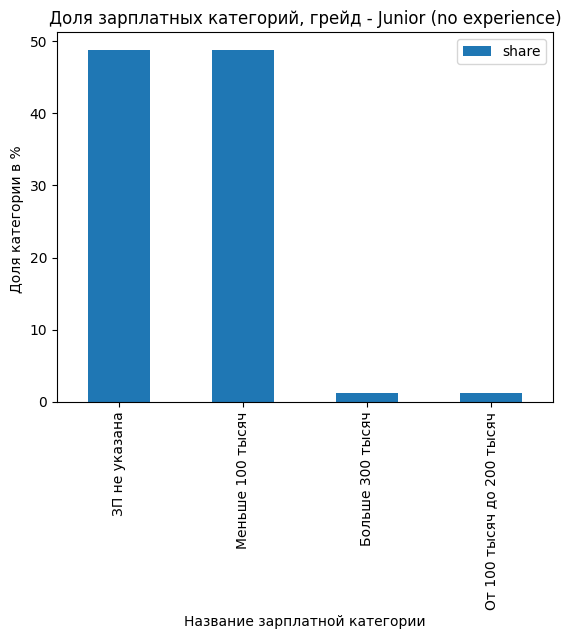

In [ ]:
data_wages_j_2.plot(title = 'Доля зарплатных категорий, грейд - Junior (no experience)',
x = 'junior_salary_bin', y = 'share', xlabel = 'Название зарплатной категории', ylabel= 'Доля категории в % ',kind='bar');

В 49% случаев размер зарплаты джунов не указан, в 49% указана категория "меньше 100 тысяч рублей". В категории "от 100 тысяч до 200 тысяч" и "более 300 тысяч" попало только 1 объявление, или 1,1% от общего числа объявлений для джунов без опыта работы.

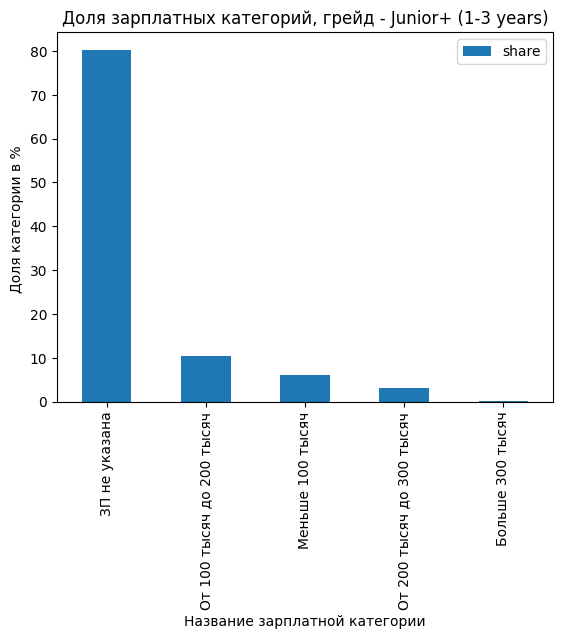

In [ ]:
data_wages_jp_2.plot(title = 'Доля зарплатных категорий, грейд - Junior+ (1-3 years)',
x = 'junior+_salary_bin', y = 'share', xlabel = 'Название зарплатной категории', ylabel= 'Доля категории в % ',kind='bar');

В случае с джунами с опытом зарплата не указана в 80,3% случаев. В категорию "от 100 тысяч до 200 тысяч" попали 10,33% объявлений, в категорию "меньше 100 тысяч" - 6,1%. Категория "от 200 тысяч до 300 тысяч" встречается крайне редко (3,2%), а "больше 300 тысяч" почти никогда (0,1%).

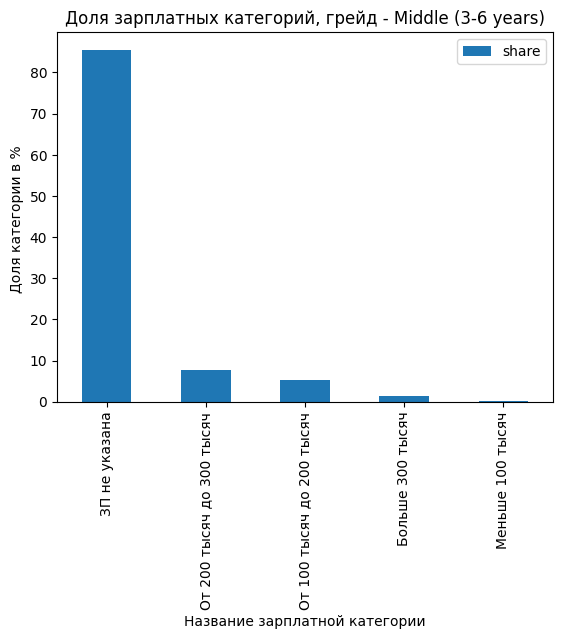

In [ ]:
data_wages_m_2.plot(title = 'Доля зарплатных категорий, грейд - Middle (3-6 years)',
x = 'middle_salary_bin', y = 'share', xlabel = 'Название зарплатной категории', ylabel= 'Доля категории в % ',kind='bar');

У миддлов чаще всего не указывается зарплата - почти в 86% объявлений. Зарплата в диапазоне от 200 тысяч до 300 встречается в 7,7% случаев, а от 100 тысяч до 200 тысяч - в 5,25%. Остальные категории встречаются крайне редко: зарплаты больше 300 тысяч попадаются лишь в 1,3% объявлений, а менее 100 тысяч - в 0,2%.

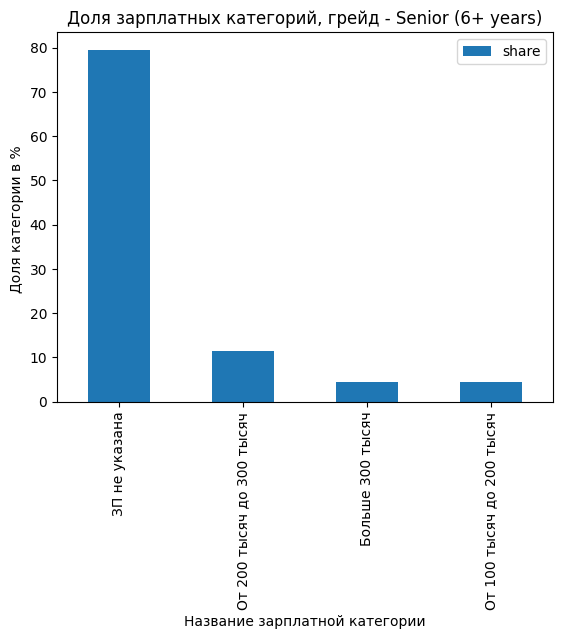

In [ ]:
data_wages_s_2.plot(title = 'Доля зарплатных категорий, грейд - Senior (6+ years)',
x = 'senior_salary_bin', y = 'share', xlabel = 'Название зарплатной категории', ylabel= 'Доля категории в % ',kind='bar');

В 80% случаев зарплата у сениором также не указана. В остальном распределение выглядит так:
* От 200 тысяч до 300 тысяч - 11,36%;
* Больше 300 тысяч 	- 4,55%;
* От 100 тысяч до 200 тысяч -	4,55%.

**Тип занятости**

In [ ]:
data_emp_j_2 = data_sa_junior.groupby('employment')['id'].count().sort_values(ascending = False)
data_emp_j_2  = data_emp_j_2.reset_index()
data_emp_j_2['share'] = data_emp_j_2['id']/ 86 * 100
data_emp_j_2.columns = ['employment_junior', 'amount', 'share']

data_emp_jp_2 = data_sa_junior_plus.groupby('employment')['id'].count().sort_values(ascending = False)
data_emp_jp_2  = data_emp_jp_2.reset_index()
data_emp_jp_2['share'] = data_emp_jp_2['id']/ 852 * 100
data_emp_jp_2.columns = ['employment_junior+', 'amount', 'share']

data_emp_m_2 = data_sa_middle.groupby('employment')['id'].count().sort_values(ascending = False)
data_emp_m_2 = data_emp_m_2.reset_index()
data_emp_m_2['share'] = data_emp_m_2['id']/ 933 * 100
data_emp_m_2.columns = ['employment_middle', 'amount', 'share']

data_emp_s_2 = data_sa_senior.groupby('employment')['id'].count().sort_values(ascending = False)
data_emp_s_2= data_emp_s_2.reset_index()
data_emp_s_2['share'] = data_emp_s_2['id']/ 44 * 100
data_emp_s_2.columns = ['employment_senior', 'amount', 'share']

data_sched_all_2 = pd.concat([data_emp_j_2, data_emp_jp_2, data_emp_m_2, data_emp_s_2], axis=1)

data_sched_all_2

,employment_junior,amount,share,employment_junior+,amount,share,employment_middle,amount,share,employment_senior,amount,share
0,Полная занятость,56,65.12,Полная занятость,851.00,99.88,Полная занятость,926,99.25,Полная занятость,44.00,100.00
1,Стажировка,29,33.72,Проектная работа,1.00,0.12,Частичная занятость,5,0.54,NaN,NaN,NaN
2,Частичная занятость,1,1.16,NaN,NaN,NaN,Проектная работа,2,0.21,NaN,NaN,NaN


Большинство предлагаемых вакансий имеют тип "полная занятость".

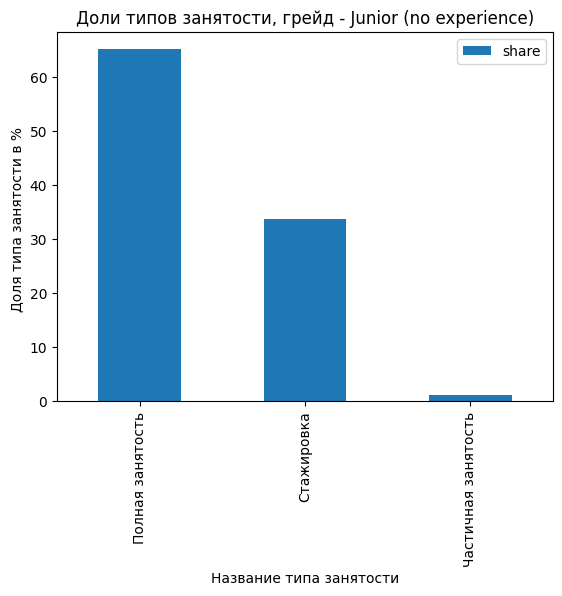

In [ ]:
data_emp_j_2.plot(title = 'Доли типов занятости, грейд - Junior (no experience)',
x = 'employment_junior', y = 'share', xlabel = 'Название типа занятости', ylabel= 'Доля типа занятости в % ',kind='bar');

Джуны без опыта работы - единственный грейд, где "полная занятость" составляет менее 99% от объявлений своего грейда, а именно - 65%.
Это объясняется наличием стажировок, которые составяют 33,7% от общего числа вакансий для джунов без опыта. Последняя категория - "частичная занятость" - составляет всего 1,2%.

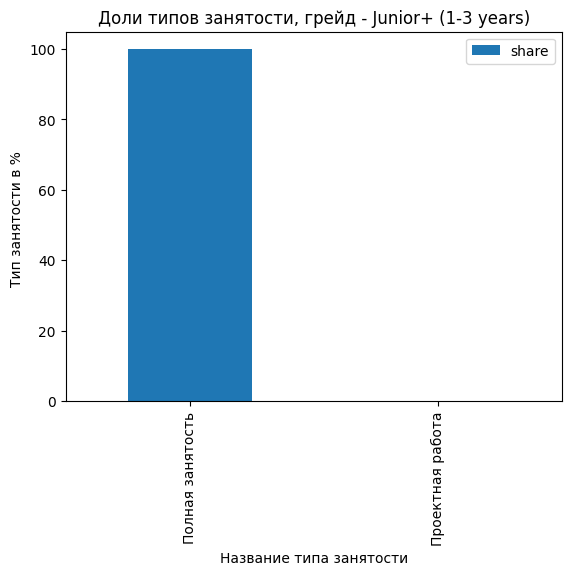

In [ ]:
data_emp_jp_2.plot(title = 'Доли типов занятости, грейд - Junior+ (1-3 years)',
x = 'employment_junior+', y = 'share', xlabel = 'Название типа занятости', ylabel= 'Тип занятости в % ',kind='bar');

Для джунов с опытом работы предлагается только полная занятость (99,9%) и лишь изредка - "проектная работа" (0,1%).

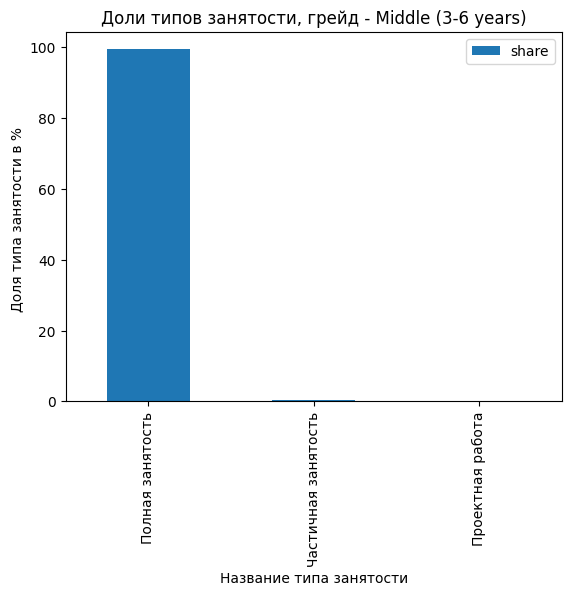

In [ ]:
data_emp_m_2.plot(title = 'Доли типов занятости, грейд - Middle (3-6 years)',
x = 'employment_middle', y = 'share', xlabel = 'Название типа занятости', ylabel= 'Доля типа занятости в % ',kind='bar');

Миддлам тоже почти всегда предлагается "полная занятость" (99,3%), и лишь изредка - "частичная занятость" (0,5%) либо "проектная работа (0,2%).

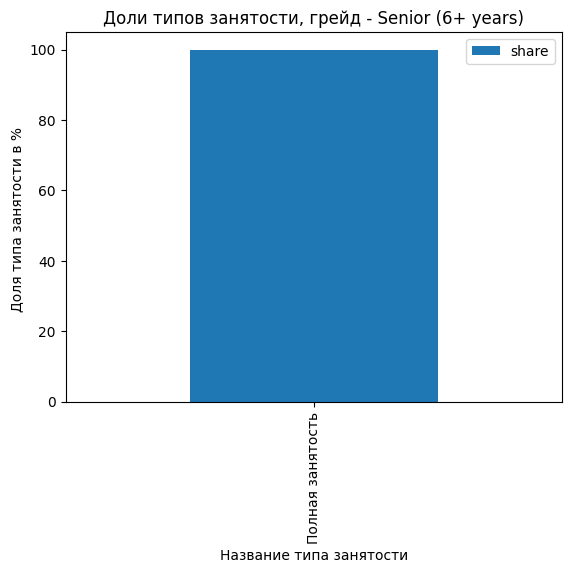

In [ ]:
data_emp_s_2.plot(title = 'Доли типов занятости, грейд - Senior (6+ years)',
x = 'employment_senior', y = 'share', xlabel = 'Название типа занятости', ylabel= 'Доля типа занятости в % ',kind='bar');

У сениоров единственный предлагаемый тип - "полная занятость".

**График работы**

In [ ]:
data_sched_j_2 = data_sa_junior.groupby('schedule')['id'].count().sort_values(ascending = False)
data_sched_j_2 = data_sched_j_2.reset_index()
data_sched_j_2['share'] = data_sched_j_2['id']/ 86 * 100
data_sched_j_2.columns = ['schedule_junior', 'amount', 'share']

data_sched_jp_2 = data_sa_junior_plus.groupby('schedule')['id'].count().sort_values(ascending = False)
data_sched_jp_2 = data_sched_jp_2.reset_index()
data_sched_jp_2['share'] = data_sched_jp_2['id']/ 852 * 100
data_sched_jp_2.columns = ['schedule_junior_plus', 'amount', 'share']

data_sched_m_2 = data_sa_middle.groupby('schedule')['id'].count().sort_values(ascending = False)
data_sched_m_2 = data_sched_m_2.reset_index()
data_sched_m_2['share'] = data_sched_m_2['id']/ 933 * 100
data_sched_m_2.columns = ['schedule_middle', 'amount', 'share']

data_sched_s_2 = data_sa_senior.groupby('schedule')['id'].count().sort_values(ascending = False)
data_sched_s_2 = data_sched_s_2.reset_index()
data_sched_s_2['share'] = data_sched_s_2['id']/ 44 * 100
data_sched_s_2.columns = ['schedule_senior', 'amount', 'share']

data_sched_all_2 = pd.concat([data_sched_j_2, data_sched_jp_2, data_sched_m_2, data_sched_s_2], axis=1)

data_sched_all_2

,schedule_junior,amount,share,schedule_junior_plus,amount,share,schedule_middle,amount,share,schedule_senior,amount,share
0,Полный день,51.00,59.30,Полный день,553.00,64.91,Полный день,574,61.52,Полный день,25.00,56.82
1,Удаленная работа,29.00,33.72,Удаленная работа,263.00,30.87,Удаленная работа,341,36.55,Удаленная работа,17.00,38.64
2,Гибкий график,6.00,6.98,Гибкий график,36.00,4.23,Гибкий график,17,1.82,Гибкий график,2.00,4.55
3,NaN,NaN,NaN,NaN,NaN,NaN,Сменный график,1,0.11,NaN,NaN,NaN


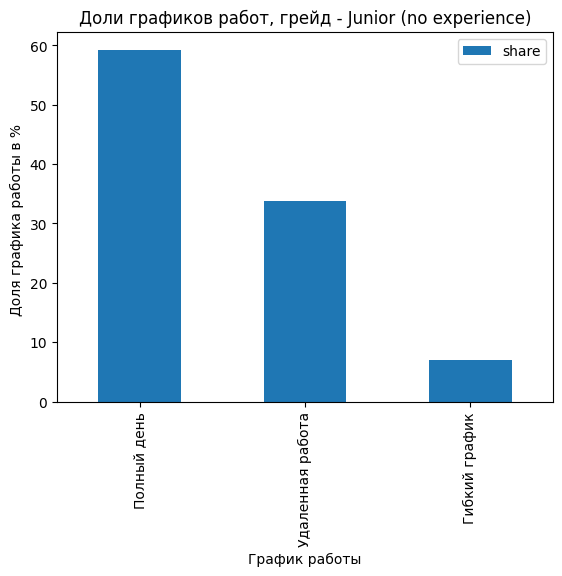

In [ ]:
data_sched_j_2.plot(title = 'Доли графиков работ, грейд - Junior (no experience)',
x = 'schedule_junior', y = 'share', xlabel = 'График работы', ylabel= 'Доля графика работы в % ',kind='bar');

Джунам без опыта работы обычно предлагают "полный день" (59,3%), реже удалённую работу - 33,7%. Гибкий график есть в 7% объявлений для данного грейда.

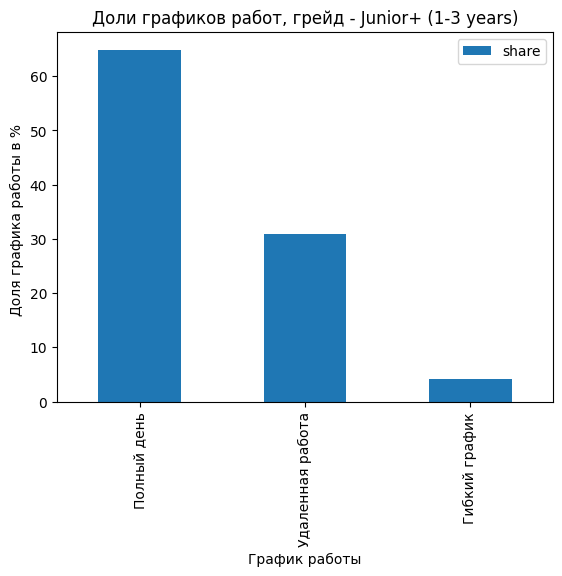

In [ ]:
data_sched_jp_2.plot(title = 'Доли графиков работ, грейд - Junior+ (1-3 years)',
x = 'schedule_junior_plus', y = 'share', xlabel = 'График работы', ylabel= 'Доля графика работы в % ',kind='bar');

У джуниоров с опытом работы ситуация следующая: 65% вакансий предлагают "полный день", 31% - "удалённую работу". Гибкий график составляет 4,2% от числа вакансий.

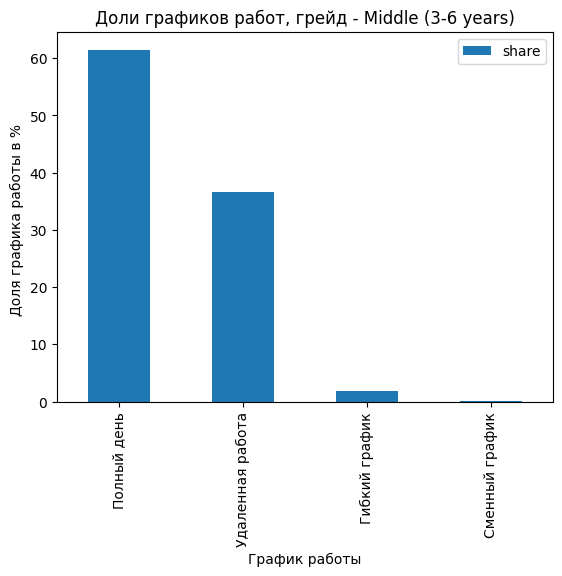

In [ ]:
data_sched_m_2.plot(title = 'Доли графиков работ, грейд - Middle (3-6 years)',
x = 'schedule_middle', y = 'share', xlabel = 'График работы', ylabel= 'Доля графика работы в % ',kind='bar');

Снова лидирует "полный день" - он указан в 61,5% объявлений. У удалённой работы второе место - 36,6%. Гибкий график предлагается лишь в 1,8% случаев, крайне редко - сменный график (0,1%).

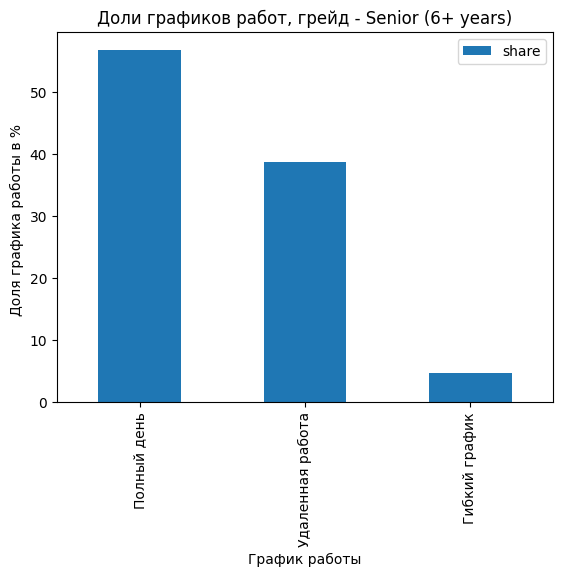

In [ ]:
data_sched_s_2.plot(title = 'Доли графиков работ, грейд - Senior (6+ years)',
x = 'schedule_senior', y = 'share', xlabel = 'График работы', ylabel= 'Доля графика работы в % ',kind='bar');

Сениорам чаще других предлагается гибкий график - в 4,6% объявлений, а также удалённую работу (38,6%). Соответственно, "полному дню" остаются 56,8% объявлений.

**Итоги. Профили работ системных аналитиков по грейдам**

**Джун без опыта работы**

Типичное место работы:
* ТОП-3 работодателей: "Aston", "Апогей", "TWIGA Communication Group"
* Медианная зарплата - 65,2 тысячи рублей
* Тип занятости - полная занятость
* График работы - полный день

**Джун с опытом работы**

Типичное место работы:
* ТОП-3 работодателей: "СБЕР", "Aston", "Совкомбанк Технологии"
* Медианная зарплата - 131,7 тысяч рублей
* Тип занятости - полная занятость
* График работы - полный день

**Миддл**

Типичное место работы:
* ТОП-3 работодателей: "Т1", "СБЕР", "Aston"
* Медианная зарплата - 207,5 тысячи рублей
* Тип занятости - полная занятость
* График работы - полный день

**Сениор**

Типичное место работы:
* ТОП-3 работодателей: "Т1", "Яндекс", "БФТ-Холдинг", "Mediascope"
* Медианная зарплата - 237,8 тысячи рублей
* Тип занятости - полная занятость
* График работы - полный день

### Глава 2.4 Анализ "твёрдых" и "мягких" навыков

Пришло время перейти к датафреймам data_da_exp и data_sa_exp и проанализировать навыки в соответствии с вакансиями и грейдами.

#### Глава 2.4.1 Анализ "твёрдых" и "мягких" навыков у аналитиков данных

ТОП востребованных навыков для аналитиков данных и системных аналитиков уже составлен, можно посмотреть ТОП-10 для каждой профессии:

In [ ]:
total_skills_da.head(10)

,key_skills_re,amount_of_records
0,sql,769
1,python,583
2,анализ данных,551
3,аналитический склад ума,384
5,pandas,328
6,работа с базами данных,313
7,power bi,286
8,документация,280
9,excel,237
10,работа с большим объемом информации,184


Самые востребованные навыки у аналитиков данных - это "SQL", который лидирует с большим отрывом (769 упоминаний), "Python" (583) и "анализ данных" (551). Все три навыка являются "твёрдыми". На четвёртом месте первый "мягкий" навык - "аналитический склад ума". Всего в ТОП-10 три "мягких" (два других - "документация", "работа с большим объемом информации") и семь твёрдых навыков.

Однако необходимо проверить навыки по грейдам. Для этого вновь будут созданы 4 раздельных датасета:

In [ ]:
data_da_exp_junior = data_da_exp.query('experience == "Junior (no experience)"')
data_da_exp_junior = data_da_exp_junior.query('key_skills_re != ""')
data_da_exp_junior.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt,key_skills_re,hard_skills,soft_skills
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),power bi,...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч,power bi,power bi,None
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),субд,...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч,субд,субд,None
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),python,...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч,python,python,None
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experience),sql,...,60000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Меньше 100 тысяч,sql,sql,None
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experience),ms sql,...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,ЗП не указана,ms sql server,ms sql server,None


In [ ]:
data_da_exp_junior_plus = data_da_exp.query('experience == "Junior+ (1-3 years)"')
data_da_exp_junior_plus= data_da_exp_junior_plus.query('key_skills_re != ""')
data_da_exp_junior_plus.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt,key_skills_re,hard_skills,soft_skills
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),sql,...,90000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,Меньше 100 тысяч,sql,sql,None
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),power bi,...,90000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,Меньше 100 тысяч,power bi,power bi,None
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),субд,...,90000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,Меньше 100 тысяч,субд,субд,None
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),python,...,90000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,Меньше 100 тысяч,python,python,None
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),clickhouse,...,90000.00,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,Меньше 100 тысяч,clickhouse,clickhouse,None


In [ ]:
data_da_exp_middle = data_da_exp.query('experience == "Middle (3-6 years)"')
data_da_exp_middle= data_da_exp_middle.query('key_skills_re != ""')
data_da_exp_middle.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt,key_skills_re,hard_skills,soft_skills
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),документация,...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,ЗП не указана,документация,None,документация
5,100059110,Senior Data Analyst (Цифровой билайн),2024-06-11 11:45:29,https://hh.ru/vacancy/100059110,Открытая,билайн,"билайн: ИТ, Data, Digital",Москва,Middle (3-6 years),python,...,NaN,NaN,ЗП не указана,"Python, SQL, Математическая статистика",NaN,NaN,ЗП не указана,python,python,None
5,100059110,Senior Data Analyst (Цифровой билайн),2024-06-11 11:45:29,https://hh.ru/vacancy/100059110,Открытая,билайн,"билайн: ИТ, Data, Digital",Москва,Middle (3-6 years),sql,...,NaN,NaN,ЗП не указана,"Python, SQL, Математическая статистика",NaN,NaN,ЗП не указана,sql,sql,None
5,100059110,Senior Data Analyst (Цифровой билайн),2024-06-11 11:45:29,https://hh.ru/vacancy/100059110,Открытая,билайн,"билайн: ИТ, Data, Digital",Москва,Middle (3-6 years),математическая статистика,...,NaN,NaN,ЗП не указана,"Python, SQL, Математическая статистика",NaN,NaN,ЗП не указана,математическая статистика,математическая статистика,None
10,100077503,Data Analyst,2024-05-24 14:14:00,https://hh.ru/vacancy/100077503,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),pandas,...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ЗП не указана,pandas,pandas,None


In [ ]:
data_da_exp_senior = data_da_exp.query('experience == "Senior (6+ years)"')
data_da_exp_senior = data_da_exp_senior.query('key_skills_re != ""')
data_da_exp_senior.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt,key_skills_re,hard_skills,soft_skills
113,100602768,Аналитик данных Senior / (Интернет-эквайринг),2024-05-29 13:13:46,https://hh.ru/vacancy/100602768,Открытая,CloudPayments,NaN,Москва,Senior (6+ years),проактивность,...,NaN,NaN,ЗП не указана,"SQL, Python, ETL, Tableau, Аналитические иссле...",confluence,Проактивность,ЗП не указана,проактивность,None,проактивность
113,100602768,Аналитик данных Senior / (Интернет-эквайринг),2024-05-29 13:13:46,https://hh.ru/vacancy/100602768,Открытая,CloudPayments,NaN,Москва,Senior (6+ years),sql,...,NaN,NaN,ЗП не указана,"SQL, Python, ETL, Tableau, Аналитические иссле...",confluence,Проактивность,ЗП не указана,sql,sql,None
113,100602768,Аналитик данных Senior / (Интернет-эквайринг),2024-05-29 13:13:46,https://hh.ru/vacancy/100602768,Открытая,CloudPayments,NaN,Москва,Senior (6+ years),python,...,NaN,NaN,ЗП не указана,"SQL, Python, ETL, Tableau, Аналитические иссле...",confluence,Проактивность,ЗП не указана,python,python,None
113,100602768,Аналитик данных Senior / (Интернет-эквайринг),2024-05-29 13:13:46,https://hh.ru/vacancy/100602768,Открытая,CloudPayments,NaN,Москва,Senior (6+ years),bi,...,NaN,NaN,ЗП не указана,"SQL, Python, ETL, Tableau, Аналитические иссле...",confluence,Проактивность,ЗП не указана,bi,bi,None
113,100602768,Аналитик данных Senior / (Интернет-эквайринг),2024-05-29 13:13:46,https://hh.ru/vacancy/100602768,Открытая,CloudPayments,NaN,Москва,Senior (6+ years),confluence,...,NaN,NaN,ЗП не указана,"SQL, Python, ETL, Tableau, Аналитические иссле...",confluence,Проактивность,ЗП не указана,confluence,confluence,None


In [ ]:
data_da_exp_junior.shape

(549, 24)

In [ ]:
data_da_exp_junior_plus.shape

(4854, 24)

In [ ]:
data_da_exp_middle.shape

(2653, 24)

In [ ]:
data_da_exp_senior.shape

(105, 24)

В каждом датафрейме 24 столбца. Количество строк:
- Джуниоры без опыта работы - 549
- Джуниоры с опытом - 4854
- Миддлы - 2653
- Сениоры - 105

Строки без навыков были удалены. Можно подсчитать, какие навыки спрашивали у каждого грейда чаще - "твёрдые" или "мягкие".

Для определения наиболее спрашиваемых навыков ("твёрдых" либо "мягких") для каждого грейда будет составлены две новая таблицы, куда войдут:
* количество "твёрдых" либо "мягких" навыков, указанных во всех объявлениях для каждого грейда
* соотношение количества "твёрдых" либо "мягких" навыков к количеству объявлений для данного грейда

Получившиеся числа укажут, сколько в среднем приходится навыков (отдельно "твёрдых" и "мягких") для каждого грейда. Это и будет ответом на вопрос, какие навыки более востребованы для каждого грейда.

In [ ]:
mhsc = data_da_exp_middle['hard_skills'].count()
jssc = data_da_exp_junior['soft_skills'].count()

jphsc = data_da_exp_junior_plus['hard_skills'].count()
jpssc = data_da_exp_junior_plus['soft_skills'].count()

mhsc = data_da_exp_middle['hard_skills'].count()
mssc = data_da_exp_middle['soft_skills'].count()

shsc = data_da_exp_senior['hard_skills'].count()
sssc = data_da_exp_senior['soft_skills'].count()


table_da_hard = {'Grade': ['junior_da', 'junior_plus_da', 'middle_da', 'senior_da'],
                 'Count': [jhsc, jphsc, mhsc, shsc],
                 'Share':[jhsc/142 , jphsc/1091 , mhsc/555 , shsc/105]}
table_da_hard = pd.DataFrame(table_da_hard)
table_da_hard

,Grade,Count,Share
0,junior_da,337,2.37
1,junior_plus_da,3581,3.28
2,middle_da,2027,3.65
3,senior_da,74,0.70


Больше всего "твёрдых" навыков в объявлениях у миддлов (3,7 на объявление), у джунов с опытом работы (3,3 на объявление) и у джунов без опыта работы (2,4). Меньше всего у сениоров (0,7).

In [ ]:
table_da_soft = {'Grade': ['junior_da', 'junior_plus_da', 'middle_da', 'senior_da'],
                 'Count': [jssc, jpssc, mssc, sssc],
                 'Share':[jssc/142 , jpssc/1091 , mssc/555 , sssc/105]}
table_da_soft = pd.DataFrame(table_da_soft)
table_da_soft

,Grade,Count,Share
0,junior_da,145,1.02
1,junior_plus_da,889,0.81
2,middle_da,430,0.77
3,senior_da,16,0.15


Больше всего "мягких" навыков в объявлениях у джунов без опыта работы (1 на объявление). Меньше у джунов с опытом работы и у джунов без опыта работы (0,8 на объявление). Меньше всего у сениоров (0,2).

Таким образом, можно сделать следующие выводы:
* "Мягкие" навыки спрашивают примерно в 3-4 раза реже, чем "твёрдые"
* "Твёрдые" навыки чаще всего спрашивают у миддлов, "мягкие" - у джунов без опыты работы.
* Больше всего навыков вместе ("твёрдых" и "мягких") спрашивают с миддлов (в среднем 3,65 + 0,77 = 4,42)

Можно подсчитать, какие навыки спрашивали у каждого грейда чаще всего:

In [ ]:
hard_skills_junior = data_da_exp_junior.groupby('hard_skills')['id'].count().sort_values(ascending = False)
hard_skills_junior  = hard_skills_junior.reset_index()
hard_skills_junior['share'] = hard_skills_junior['id']/ 549 * 100
hard_skills_junior.columns = ['hard_skills_junior', 'amount', 'share']

hard_skills_junior_plus = data_da_exp_junior_plus.groupby('hard_skills')['id'].count().sort_values(ascending = False)
hard_skills_junior_plus  = hard_skills_junior_plus.reset_index()
hard_skills_junior_plus['share'] = hard_skills_junior_plus['id']/ 4854 * 100
hard_skills_junior_plus.columns = ['hard_skills_junior_plus', 'amount', 'share']

hard_skills_middle = data_da_exp_middle.groupby('hard_skills')['id'].count().sort_values(ascending = False)
hard_skills_middle = hard_skills_middle.reset_index()
hard_skills_middle['share'] = hard_skills_middle['id']/ 2653 * 100
hard_skills_middle.columns = ['hard_skills_middle', 'amount', 'share']

hard_skills_senior = data_da_exp_senior.groupby('hard_skills')['id'].count().sort_values(ascending = False)
hard_skills_senior  = hard_skills_senior .reset_index()
hard_skills_senior ['share'] = hard_skills_senior['id']/ 105 * 100
hard_skills_senior.columns = ['hard_skills_senior', 'amount', 'share']

hard_skills_all_grades = pd.concat([hard_skills_junior, hard_skills_junior_plus, hard_skills_middle, hard_skills_senior], axis=1)

hard_skills_all_grades.head(10)

,hard_skills_junior,amount,share,hard_skills_junior_plus,amount,share,hard_skills_middle,amount,share,hard_skills_senior,amount,share
0,sql,37.00,6.74,sql,472,9.72,sql,251.00,9.46,sql,9.00,8.57
1,excel,34.00,6.19,анализ данных,332,6.84,python,219.00,8.25,python,9.00,8.57
2,python,34.00,6.19,python,321,6.61,анализ данных,182.00,6.86,pandas,4.00,3.81
3,анализ данных,33.00,6.01,работа с базами данных,192,3.96,pandas,116.00,4.37,confluence,4.00,3.81
4,работа с базами данных,23.00,4.19,pandas,187,3.85,работа с базами данных,98.00,3.69,анализ данных,4.00,3.81
5,pandas,21.00,3.83,power bi,184,3.79,power bi,89.00,3.35,power bi,4.00,3.81
6,аналитика,11.00,2.00,excel,160,3.30,confluence,50.00,1.88,ab тесты,3.00,2.86
7,power bi,9.00,1.64,аналитика,115,2.37,аналитика,49.00,1.85,английский язык,3.00,2.86
8,ms powerpoint,8.00,1.46,ms sql server,80,1.65,ms sql server,45.00,1.70,аналитические исследования,3.00,2.86
9,аналитические исследования,8.00,1.46,confluence,72,1.48,excel,43.00,1.62,tableau,3.00,2.86


Среди "твёрдых навыков" "SQL" является абсолютным чемпионом, занимая первое место у всех четырёх грейдов. Чаще всего "SQL" встречается среди объявлений для джунов с опытом (9,72%), чуть реже у миддлов (9,46%). Реже всего спрашивают его у джунов без опыта работы - только 6,7%. У сениоров упоминание "SQL" встречается в 8,6% всех объвлений, так же часто, как и "python".

За второе и "третье" место среди грейдов чаще всего "сражаются" навыки "python" и "анализ данных".

Ниже представлены ТОП-10 "твёрдых" навыков для каждого грейда:

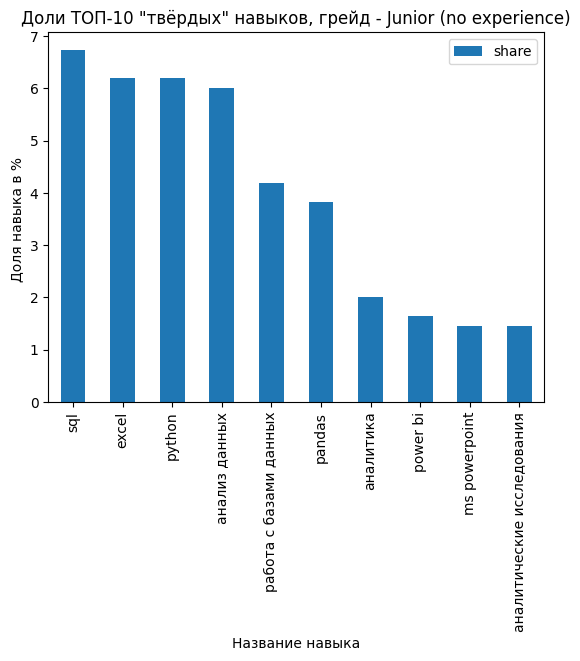

In [ ]:
hard_skills_junior_10 = hard_skills_junior[:10]
hard_skills_junior_10.plot(title = 'Доли ТОП-10 "твёрдых" навыков, грейд - Junior (no experience)',
x = 'hard_skills_junior', y = 'share', xlabel = 'Название навыка', ylabel= 'Доля навыка в % ',kind='bar');

У джунов без опыта работы чаще всего спрашивают "твёрдые" навыки "SQL", "Excel" и "Python", на четвёртом месте - "анализ данных" - на пятом - "работа с базами данных". Следом идут "Pandas", "аналитика", "Power Bi", "MS PowerPoint" и "аналитические исследования".

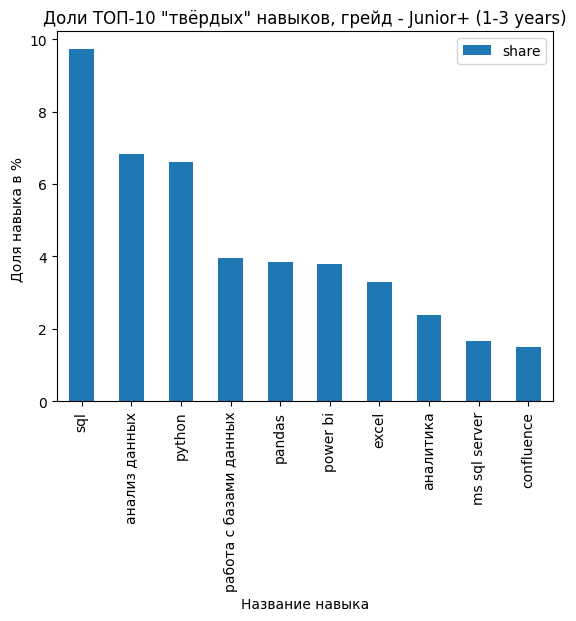

In [ ]:
hard_skills_junior_plus_10 = hard_skills_junior_plus[:10]
hard_skills_junior_plus_10.plot(title = 'Доли ТОП-10 "твёрдых" навыков, грейд - Junior+ (1-3 years)',
x = 'hard_skills_junior_plus', y = 'share', xlabel = 'Название навыка', ylabel= 'Доля навыка в % ',kind='bar');

У джунов с опытом работы чаще всего спрашивают "твёрдые" навыки "SQL", "анализ данных" и "Python", на четвёртом месте - "работа с базами данных" - на пятом - "Pandas". Следом идут "Power Bi", "Excel", "аналитика", "MS SQL Server", замыкает десятку "Confluence".

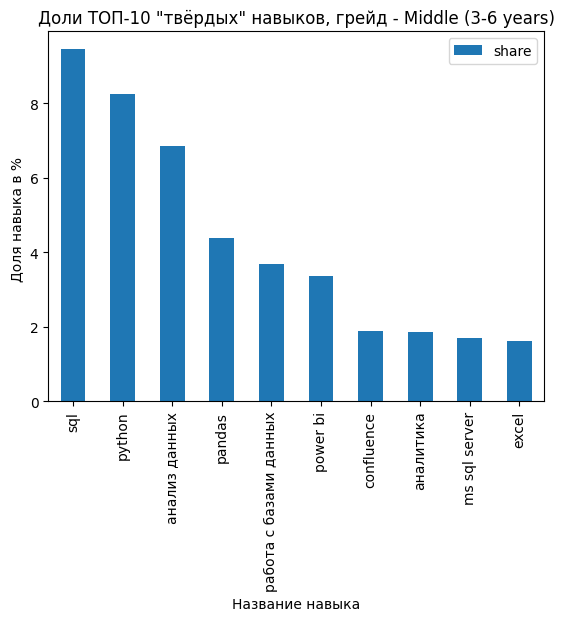

In [ ]:
hard_skills_middle_10 = hard_skills_middle[:10]
hard_skills_middle_10.plot(title = 'Доли ТОП-10 "твёрдых" навыков, грейд - Middle (3-6 years)',
x = 'hard_skills_middle', y = 'share', xlabel = 'Название навыка', ylabel= 'Доля навыка в % ',kind='bar');

ТОП-3 "твёрдых" навыка у миддлов - "SQL", "Python" и "анализ данных". Следом идут "работа с базами данных", "Power BI", "Confluence", "аналитика", "MS SQL Server" и "Excel".

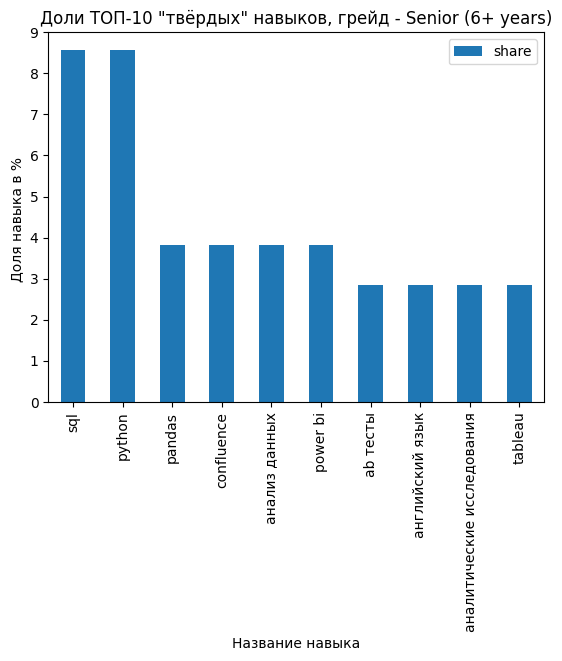

In [ ]:
hard_skills_senior_10 = hard_skills_senior[:10]
hard_skills_senior_10.plot(title = 'Доли ТОП-10 "твёрдых" навыков, грейд - Senior (6+ years)',
x = 'hard_skills_senior', y = 'share', xlabel = 'Название навыка', ylabel= 'Доля навыка в % ',kind='bar');

У сениоров лидерство делят "SQL" и "Python", на третьем месте - "Pandas", на четвёртом - "Confluence", "анализ данных" оказался на пятом. Остальные навыки из ТОП-10 в порядке убывания: "Power BI", "A/B-тесты", "английский язык"", аналитические исследования", "Tableau".

Наконец, нужно посмотреть ту же информацию для "мягких" навыков.

In [ ]:
soft_skills_junior = data_da_exp_junior.groupby('soft_skills')['id'].count().sort_values(ascending = False)
soft_skills_junior  = soft_skills_junior.reset_index()
soft_skills_junior['share'] = soft_skills_junior['id']/ 549 * 100
soft_skills_junior.columns = ['soft_skills_junior', 'amount', 'share']

soft_skills_junior_plus = data_da_exp_junior_plus.groupby('soft_skills')['id'].count().sort_values(ascending = False)
soft_skills_junior_plus  = soft_skills_junior_plus.reset_index()
soft_skills_junior_plus['share'] = soft_skills_junior_plus['id']/ 4854 * 100
soft_skills_junior_plus.columns = ['soft_skills_junior_plus', 'amount', 'share']

soft_skills_middle = data_da_exp_middle.groupby('soft_skills')['id'].count().sort_values(ascending = False)
soft_skills_middle = soft_skills_middle.reset_index()
soft_skills_middle['share'] = soft_skills_middle['id']/ 2653 * 100
soft_skills_middle.columns = ['soft_skills_middle', 'amount', 'share']

soft_skills_senior = data_da_exp_senior.groupby('soft_skills')['id'].count().sort_values(ascending = False)
soft_skills_senior  = soft_skills_senior .reset_index()
soft_skills_senior['share'] = soft_skills_senior['id']/ 105 * 100
soft_skills_senior.columns = ['soft_skills_senior', 'amount', 'share']

soft_skills_all_grades = pd.concat([soft_skills_junior, soft_skills_junior_plus, soft_skills_middle, soft_skills_senior], axis=1)

soft_skills_all_grades.head(10)

,soft_skills_junior,amount,share,soft_skills_junior_plus,amount,share,soft_skills_middle,amount,share,soft_skills_senior,amount,share
0,аналитический склад ума,42.00,7.65,аналитический склад ума,258.00,5.32,документация,109,4.11,документация,4.00,3.81
1,работа с большим объемом информации,20.00,3.64,документация,150.00,3.09,аналитический склад ума,82,3.09,коммуникация,3.00,2.86
2,коммуникация,18.00,3.28,работа с большим объемом информации,119.00,2.45,коммуникация,56,2.11,проактивность,3.00,2.86
3,документация,17.00,3.10,коммуникация,105.00,2.16,работа с большим объемом информации,45,1.70,аналитический склад ума,2.00,1.90
4,сбор и анализ информации,8.00,1.46,сбор и анализ информации,64.00,1.32,сбор и анализ информации,24,0.90,внимание к деталям,2.00,1.90
5,работа в команде,7.00,1.28,деловое общение,30.00,0.62,проактивность,15,0.57,решение проблем,2.00,1.90
6,деловое общение,6.00,1.09,проактивность,29.00,0.60,системное мышление,10,0.38,NaN,NaN,NaN
7,проактивность,6.00,1.09,работа в команде,20.00,0.41,аналитические навыки,10,0.38,NaN,NaN,NaN
8,грамотность,4.00,0.73,аналитические навыки,11.00,0.23,критическое мышление,9,0.34,NaN,NaN,NaN
9,креативность,4.00,0.73,принятие решений,11.00,0.23,переговоры,7,0.26,NaN,NaN,NaN


У джунов без опыта работы и джунов с опытом работы самый востребованный "мягкий" навык - "аналитический склад ума". У миддлов и сениоров - "документация".

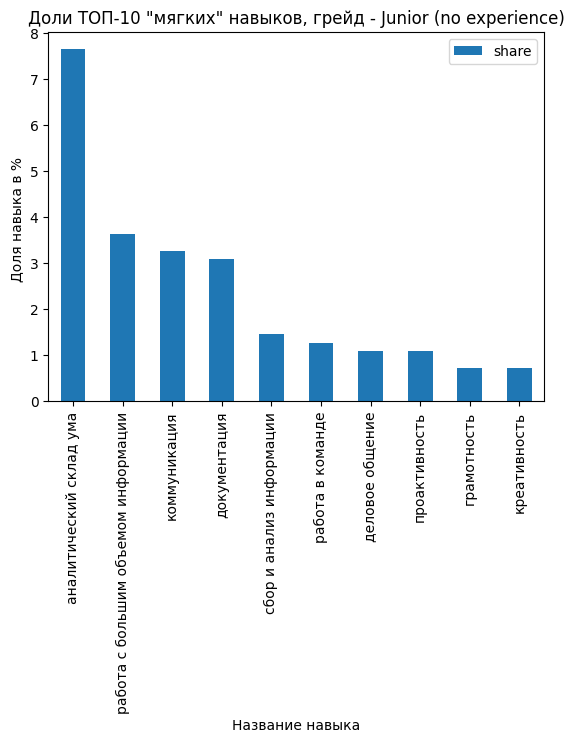

In [ ]:
soft_skills_junior_10 = soft_skills_junior[:10]
soft_skills_junior_10.plot(title = 'Доли ТОП-10 "мягких" навыков, грейд - Junior (no experience)',
x = 'soft_skills_junior', y = 'share', xlabel = 'Название навыка', ylabel= 'Доля навыка в % ',kind='bar');

У джунов без опыта работы тройкой лидеров являются "аналитический склад ума", "работа с большим объемом информации" и "коммуникация". "Документация" идёт на четвёртом месте, "сбор и анализ информации" - на пятом. Другие важные навыки: "работа в команде", "деловое общение", "проактивность", "грамотность", "креативность".

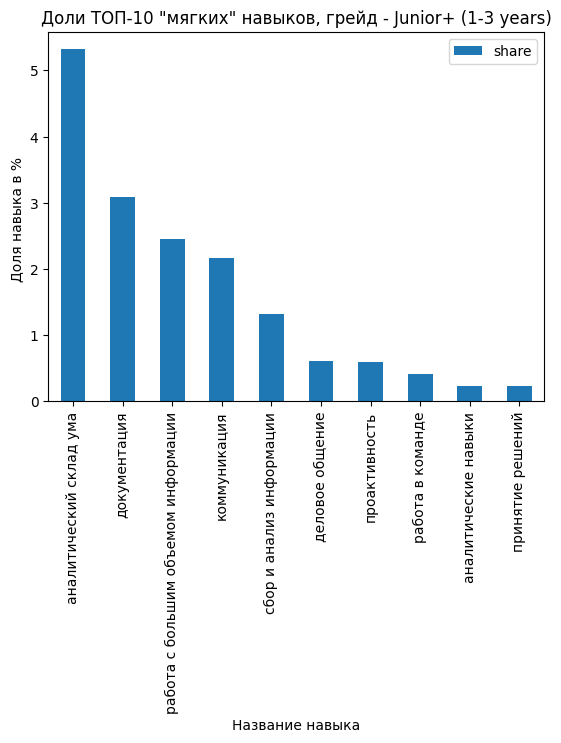

In [ ]:
soft_skills_junior_plus_10 = soft_skills_junior_plus[:10]
soft_skills_junior_plus_10.plot(title = 'Доли ТОП-10 "мягких" навыков, грейд - Junior+ (1-3 years)',
x = 'soft_skills_junior_plus', y = 'share', xlabel = 'Название навыка', ylabel= 'Доля навыка в % ',kind='bar');

У джунов с опытом работы на первом месте "аналитический склад ума", на втором - "документация", на третьем - "работа с большим объёмом информации". Далее идут "коммуникация", "сбор и анализ информации", "деловое общение" и "проактивность". Замыкают десятку навыков "работа в команде", "аналитические навыки" и "принятие решений".

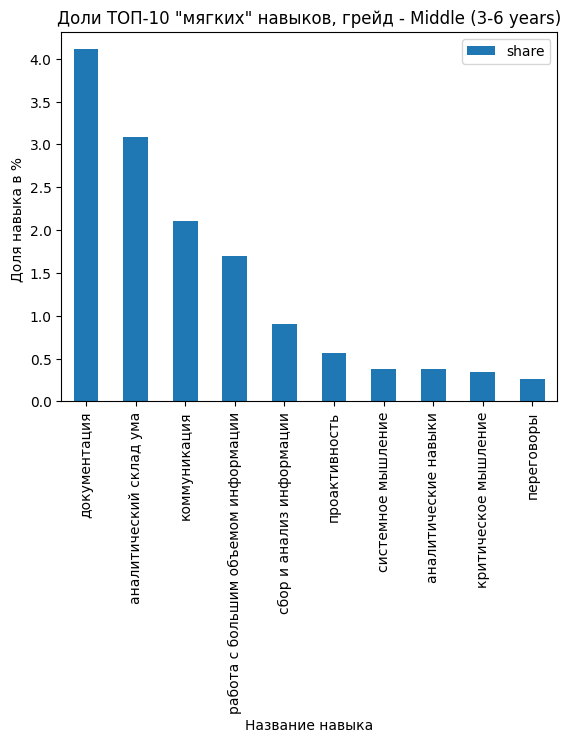

In [ ]:
soft_skills_middle_10 = soft_skills_middle[:10]
soft_skills_middle_10.plot(title = 'Доли ТОП-10 "мягких" навыков, грейд - Middle (3-6 years)',
x = 'soft_skills_middle', y = 'share', xlabel = 'Название навыка', ylabel= 'Доля навыка в % ',kind='bar');

У миддлов самыми востребованными "мягкими" навыками являются "документация", "аналитический склад ума", "коммуникация", "работа с большим объёмом информации", "сбор и анализ информации". Дальше идут "проактивность", "системное мышление", "аналитические навыки", "критическое мышление" и "переговоры".

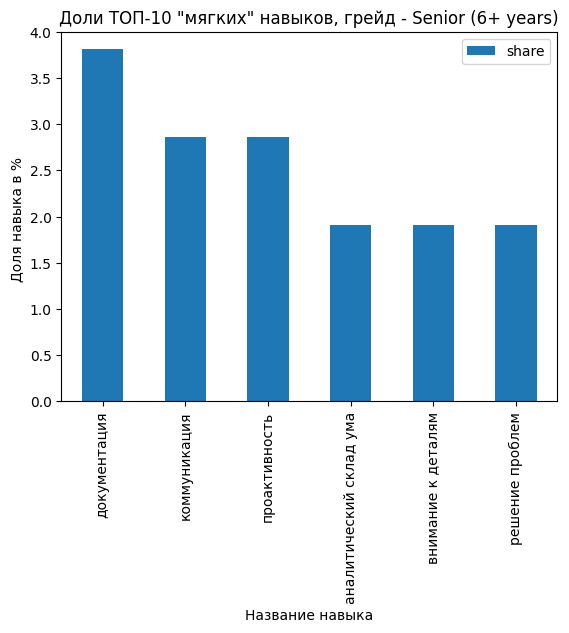

In [ ]:
soft_skills_senior_10 = soft_skills_senior[:10]
soft_skills_senior_10.plot(title = 'Доли ТОП-10 "мягких" навыков, грейд - Senior (6+ years)',
x = 'soft_skills_senior', y = 'share', xlabel = 'Название навыка', ylabel= 'Доля навыка в % ',kind='bar');

Наконец, у сениоров "мягких" навыков всего шесть (из-за небольшого размера выборки). Это "документация", "коммуникация", "проактивность", "аналитический склад ума", "внимание к деталям" и "решение проблем".

#### Глава 2.4.2 Анализ "твёрдых" и "мягких" навыков у системных аналитиков

Последняя этап данной части анализа - провести аналогичное исследование для системных аналитиков.
ТОП-10 навыков без деления на грейды и "твёрдые" и "мягкие" навыки:

In [ ]:
total_skills_sa.head(10)

,key_skills_re,amount_of_records
0,документация,1414
1,confluence,709
2,sql,679
3,bpmn,635
4,системный анализ,602
5,uml,561
6,rest,391
7,аналитические навыки,334
8,коммуникация,281
9,тз,277


Самые востребованные навыки у системных аналитиков  - это "документация", которая лидирует с большим отрывом (1414 упоминаний), "Confluence"(709) и "SQL" (679). Далее идут "BPMN", "UML", "Rest", "аналитические навыки", "коммуникация" и "тз" (""техзадание). Всего в ТОП-10 три "мягких" ("документация", "аналитические нвыки", "коммуникация") и семь твёрдых навыков, как и у аналитиков данных.

Создание 4 раздельных датасетов:

In [ ]:
data_sa_exp_junior = data_sa_exp.query('experience == "Junior (no experience)"')
data_sa_exp_junior = data_sa_exp_junior.query('key_skills_re != ""')
data_sa_exp_junior.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt,key_skills_re,hard_skills,soft_skills
16,100385756,Системный аналитик,2024-07-01 09:06:18,https://hh.ru/vacancy/100385756,Открытая,Курский электроаппаратный завод,NaN,Курск,Junior (no experience),Аналитическое мышление,...,NaN,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление,ЗП не указана,аналитические навыки,None,аналитические навыки
210,101588085,"Системный аналитик Junior (SQL, SOAP, ТЗ)",2024-07-06 21:31:56,https://hh.ru/vacancy/101588085,Открытая,Кузница Кадров,NaN,Москва,Junior (no experience),Постановка задач разработчикам,...,70000.00,90000.00,Меньше 100 тысяч,"Системный анализ, UML, SQL, SOAP, Постановка з...",confluence,Документация,Меньше 100 тысяч,постановка задач разработчикам,None,постановка задач разработчикам
210,101588085,"Системный аналитик Junior (SQL, SOAP, ТЗ)",2024-07-06 21:31:56,https://hh.ru/vacancy/101588085,Открытая,Кузница Кадров,NaN,Москва,Junior (no experience),SQL,...,70000.00,90000.00,Меньше 100 тысяч,"Системный анализ, UML, SQL, SOAP, Постановка з...",confluence,Документация,Меньше 100 тысяч,sql,sql,None
210,101588085,"Системный аналитик Junior (SQL, SOAP, ТЗ)",2024-07-06 21:31:56,https://hh.ru/vacancy/101588085,Открытая,Кузница Кадров,NaN,Москва,Junior (no experience),SOAP,...,70000.00,90000.00,Меньше 100 тысяч,"Системный анализ, UML, SQL, SOAP, Постановка з...",confluence,Документация,Меньше 100 тысяч,soap,soap,None
210,101588085,"Системный аналитик Junior (SQL, SOAP, ТЗ)",2024-07-06 21:31:56,https://hh.ru/vacancy/101588085,Открытая,Кузница Кадров,NaN,Москва,Junior (no experience),Документация,...,70000.00,90000.00,Меньше 100 тысяч,"Системный анализ, UML, SQL, SOAP, Постановка з...",confluence,Документация,Меньше 100 тысяч,документация,None,документация


In [ ]:
data_sa_exp_junior_plus = data_sa_exp.query('experience == "Junior+ (1-3 years)"')
data_sa_exp_junior_plus= data_sa_exp_junior_plus.query('key_skills_re != ""')
data_sa_exp_junior_plus.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt,key_skills_re,hard_skills,soft_skills
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),Разработка технических заданий,...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана,тз,тз,None
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),Бизнес-анализ,...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана,бизнес анализ,бизнес анализ,None
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),Английский язык,...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана,английский язык,английский язык,None
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),REST,...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана,rest,rest,None
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),Atlassian Jira,...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,ЗП не указана,jira,jira,None


In [ ]:
data_sa_exp_middle = data_sa_exp.query('experience == "Middle (3-6 years)"')
data_sa_exp_middle= data_sa_exp_middle.query('key_skills_re != ""')
data_sa_exp_middle.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt,key_skills_re,hard_skills,soft_skills
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),1С,...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана,1с,1с,None
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),Аналитический склад ума,...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана,аналитические навыки,None,аналитические навыки
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),confluence,...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана,confluence,confluence,None
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),SQL,...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,ЗП не указана,sql,sql,None
13,100355513,Системный аналитик,2024-07-05 16:13:57,https://hh.ru/vacancy/100355513,Открытая,YADRO,NaN,Москва,Middle (3-6 years),REST API,...,NaN,NaN,ЗП не указана,"REST API, Базы данных, Atlassian Jira, Atlassi...",confluence,NaN,ЗП не указана,rest api,rest api,None


In [ ]:
data_sa_exp_senior = data_sa_exp.query('experience == "Senior (6+ years)"')
data_sa_exp_senior = data_sa_exp_senior.query('key_skills_re != ""')
data_sa_exp_senior.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_bin_alt,key_skills_re,hard_skills,soft_skills
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),ERP,...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация,ЗП не указана,erp,erp,None
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),Atlassian Jira,...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация,ЗП не указана,jira,jira,None
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),1С: Управление Производственным Предприятием,...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация,ЗП не указана,1с управление производственным предприятием,1с управление производственным предприятием,None
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),confluence,...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация,ЗП не указана,confluence,confluence,None
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),1С: Управление Торговлей,...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация,ЗП не указана,1с управление торговлей,1с управление торговлей,None


Датафйремы созданы.

In [ ]:
data_sa_exp_junior.shape

(785, 24)

In [ ]:
data_sa_exp_junior_plus.shape

(5237, 24)

In [ ]:
data_sa_exp_middle.shape

(5554, 24)

In [ ]:
data_sa_exp_senior.shape

(319, 24)

В каждом датафрейме 24 столбца. Количество строк:
- Джуниоры без опыта работы - 785;
- Джуниоры с опытом - 5237;
- Миддлы - 5554;
- Сениоры - 319.

Строки без навыков были удалены. Можно подсчитать, какие навыки спрашивали у каждого грейда чаще - "твёрдые" или "мягкие".
Будет построена таблица аналогичная той, что была у аналитиков данных.

In [ ]:
jhsc_2 = data_sa_exp_junior['hard_skills'].count()
jssc_2 = data_sa_exp_junior['soft_skills'].count()

jphsc_2 = data_sa_exp_junior_plus['hard_skills'].count()
jpssc_2= data_sa_exp_junior_plus['soft_skills'].count()

mhsc_2 = data_sa_exp_middle['hard_skills'].count()
mssc_2 = data_sa_exp_middle['soft_skills'].count()

shsc_2 = data_sa_exp_senior['hard_skills'].count()
sssc_2 = data_sa_exp_senior['soft_skills'].count()

table_sa_hard = {'Grade': ['junior_sa', 'junior_plus_sa', 'middle_sa', 'senior_sa'],
                 'Count': [jhsc_2, jphsc_2, mhsc_2, shsc_2],
                 'Share':[jhsc/86 , jphsc/852 , mhsc/933 , shsc/44]}
table_sa_hard = pd.DataFrame(table_sa_hard)
table_sa_hard

,Grade,Count,Share
0,junior_da,554,3.92
1,junior_plus_da,3585,4.20
2,middle_da,3886,2.17
3,senior_da,241,1.68


У системных аналитиков чаще спрашивают "твёрдые" навыки у джунов с опытом работы (4,2 навыка на вакансию). На втором месте джуны без опыта работы - 3,9 навыка на вакансию. Ещё реже спрашивают "твёрдые" навыки у миддлов (2,2), реже всего - у сениоров (1,7).

In [ ]:
table_sa_soft = {'Grade': ['junior_sa', 'junior_plus_sa', 'middle_sa', 'senior_sa'],
                 'Count': [jssc_2, jpssc_2, mssc_2, sssc_2],
                 'Share':[jssc_2/86, jpssc_2/852, mssc_2/933, sssc_2/44]}
table_sa_soft = pd.DataFrame(table_sa_soft)
table_sa_soft

,Grade,Count,Share
0,junior_sa,198,2.30
1,junior_plus_sa,1198,1.41
2,middle_sa,1225,1.31
3,senior_sa,53,1.20


"Мягкие" навыки чаще всего спрашивают у джунов без опыта работы - 2,3 навыка на объявление. Реже - у джунов с опытом (1,4) и у миддлов (1,3). У сениоров спрашивают реже всех (1,2).

Можно сделать следующие выводы:
* "Твёрдые" навыки спрашивают у системных аналитиков чаще, чем "мягкие";
* Больше всего навыков вместе ("твёрдых" и "мягких") спрашивают с джунов без опыты работы (3.92 + 2.3) - 6,22 навыка на вакансию.

Теперь необходимо выяснить, какие именно навыки самые востребованные у каждого грейда.

In [ ]:
hard_skills_junior_2 = data_sa_exp_junior.groupby('hard_skills')['id'].count().sort_values(ascending = False)
hard_skills_junior_2 = hard_skills_junior_2 .reset_index()
hard_skills_junior_2 ['share'] = hard_skills_junior_2['id']/ 549 * 100
hard_skills_junior_2.columns = ['hard_skills_junior', 'amount', 'share']

hard_skills_junior_plus_2 = data_sa_exp_junior_plus.groupby('hard_skills')['id'].count().sort_values(ascending = False)
hard_skills_junior_plus_2  = hard_skills_junior_plus_2.reset_index()
hard_skills_junior_plus_2['share'] = hard_skills_junior_plus_2['id']/ 4854 * 100
hard_skills_junior_plus_2.columns = ['hard_skills_junior_plus', 'amount', 'share']

hard_skills_middle_2 = data_sa_exp_middle.groupby('hard_skills')['id'].count().sort_values(ascending = False)
hard_skills_middle_2 = hard_skills_middle_2.reset_index()
hard_skills_middle_2['share'] = hard_skills_middle_2['id']/ 2653 * 100
hard_skills_middle_2.columns = ['hard_skills_middle', 'amount', 'share']

hard_skills_senior_2 = data_sa_exp_senior.groupby('hard_skills')['id'].count().sort_values(ascending = False)
hard_skills_senior_2  = hard_skills_senior_2 .reset_index()
hard_skills_senior_2 ['share'] = hard_skills_senior_2['id']/ 105 * 100
hard_skills_senior_2.columns = ['hard_skills_senior', 'amount', 'share']

hard_skills_all_grades_2 = pd.concat([hard_skills_junior_2, hard_skills_junior_plus_2, hard_skills_middle_2, hard_skills_senior_2], axis=1)

hard_skills_all_grades_2.head(10)

,hard_skills_junior,amount,share,hard_skills_junior_plus,amount,share,hard_skills_middle,amount,share,hard_skills_senior,amount,share
0,системный анализ,43.00,7.83,confluence,304,6.26,confluence,370.00,13.95,sql,20.00,19.05
1,базы данных,39.00,7.10,sql,280,5.77,sql,345.00,13.00,uml,17.00,16.19
2,sql,34.00,6.19,bpmn,280,5.77,bpmn,317.00,11.95,bpmn,17.00,16.19
3,бизнес анализ,31.00,5.65,uml,237,4.88,системный анализ,311.00,11.72,confluence,17.00,16.19
4,bpmn,21.00,3.83,системный анализ,232,4.78,uml,286.00,10.78,системный анализ,16.00,15.24
5,uml,21.00,3.83,тз,151,3.11,rest,214.00,8.07,rest,14.00,13.33
6,rest,18.00,3.28,rest,145,2.99,soap,148.00,5.58,api,8.00,7.62
7,confluence,18.00,3.28,soap,100,2.06,тз,110.00,4.15,jira,8.00,7.62
8,python,18.00,3.28,xml,94,1.94,xml,103.00,3.88,soap,8.00,7.62
9,json api,17.00,3.10,jira,89,1.83,api,102.00,3.84,xml,7.00,6.67


Для каждого грейда будет построен график:

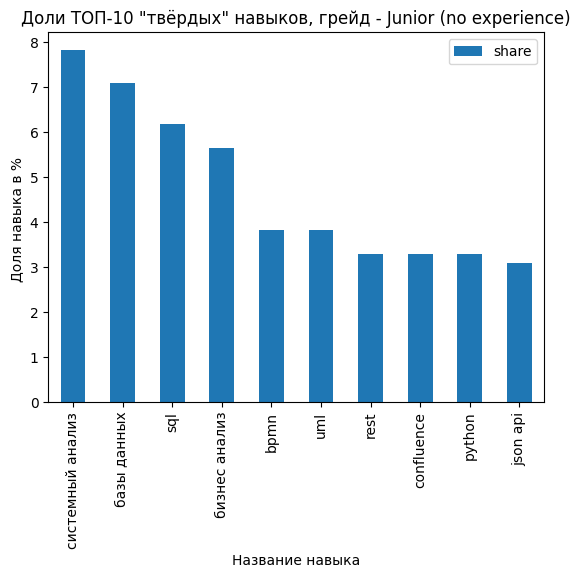

In [ ]:
hard_skills_junior_10_2 = hard_skills_junior_2[:10]
hard_skills_junior_10_2.plot(title = 'Доли ТОП-10 "твёрдых" навыков, грейд - Junior (no experience)',
x = 'hard_skills_junior', y = 'share', xlabel = 'Название навыка', ylabel= 'Доля навыка в % ',kind='bar');

У джунов без опыта работы чаще всего спрашивают "твёрдые" навыки "системный анализ", "базs данных" и "SQL", дальше идут "бизнес-анализ", "BPMM", "UML", "Rest", "Confluence", "Python" и "JSON API".

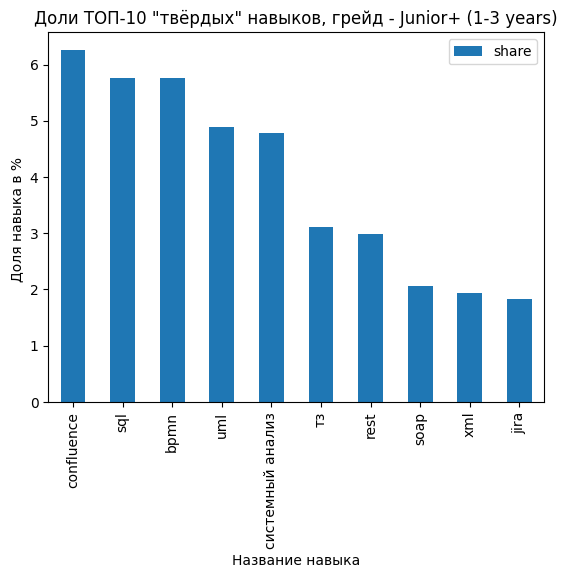

In [ ]:
hard_skills_junior_plus_10_2 = hard_skills_junior_plus_2[:10]
hard_skills_junior_plus_10_2.plot(title = 'Доли ТОП-10 "твёрдых" навыков, грейд - Junior+ (1-3 years)',
x = 'hard_skills_junior_plus', y = 'share', xlabel = 'Название навыка', ylabel= 'Доля навыка в % ',kind='bar');

У джунов с опытом работы чаще всего спрашивают "Confluence", "SQL", "BPMN" и "UML". Востребованы также "системный анализ", "тз", "Rest", "Soap", "XML" и "Jira".

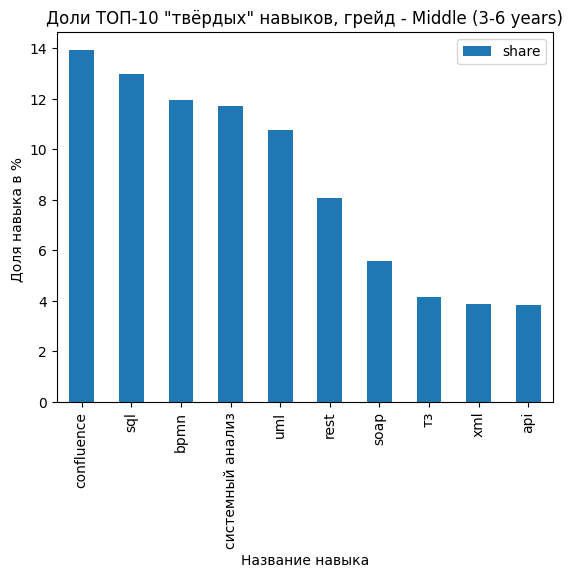

In [ ]:
hard_skills_middle_10_2 = hard_skills_middle_2[:10]
hard_skills_middle_10_2.plot(title = 'Доли ТОП-10 "твёрдых" навыков, грейд - Middle (3-6 years)',
x = 'hard_skills_middle', y = 'share', xlabel = 'Название навыка', ylabel= 'Доля навыка в % ',kind='bar');

ТОП "твёрдых" навыка у миддлов - "Confluence", "SQL", "BPMN", "системный анализ", "UML", "Rest", "Soap", "тз", "XML" и "API".

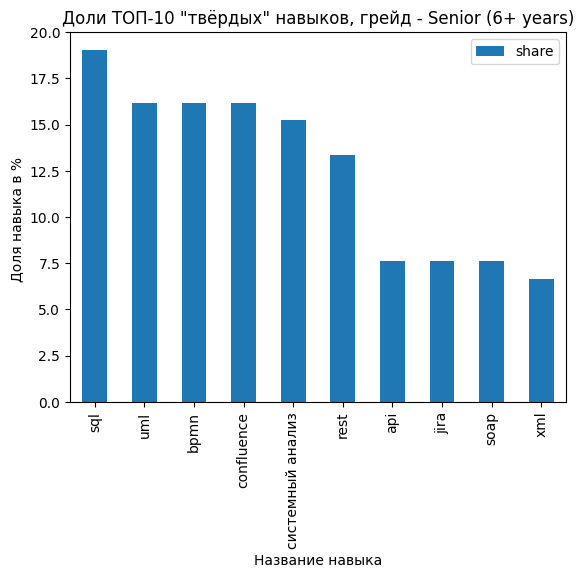

In [ ]:
hard_skills_senior_10_2 = hard_skills_senior_2[:10]
hard_skills_senior_10_2.plot(title = 'Доли ТОП-10 "твёрдых" навыков, грейд - Senior (6+ years)',
x = 'hard_skills_senior', y = 'share', xlabel = 'Название навыка', ylabel= 'Доля навыка в % ',kind='bar');

У сениоров лидеры рейтинга "SQL", "UML", "BPMN". На четвёртом месте "Confluence", "системный анализ" на пятом. Остальные навыки из ТОП-10 в порядке убывания: "Rest", "API", "Jira", "Soap", "XML".

Наконец, нужно посмотреть ту же информацию для "мягких" навыков.

In [ ]:
soft_skills_junior_2 = data_sa_exp_junior.groupby('soft_skills')['id'].count().sort_values(ascending = False)
soft_skills_junior_2  = soft_skills_junior_2.reset_index()
soft_skills_junior_2['share'] = soft_skills_junior_2['id']/ 549 * 100
soft_skills_junior_2.columns = ['soft_skills_junior', 'amount', 'share']

soft_skills_junior_plus_2 = data_sa_exp_junior_plus.groupby('soft_skills')['id'].count().sort_values(ascending = False)
soft_skills_junior_plus_2  = soft_skills_junior_plus_2.reset_index()
soft_skills_junior_plus_2['share'] = soft_skills_junior_plus_2['id']/ 4854 * 100
soft_skills_junior_plus_2.columns = ['soft_skills_junior_plus', 'amount', 'share']

soft_skills_middle_2 = data_sa_exp_middle.groupby('soft_skills')['id'].count().sort_values(ascending = False)
soft_skills_middle_2 = soft_skills_middle_2.reset_index()
soft_skills_middle_2['share'] = soft_skills_middle_2['id']/ 2653 * 100
soft_skills_middle_2.columns = ['soft_skills_middle', 'amount', 'share']

soft_skills_senior_2= data_sa_exp_senior.groupby('soft_skills')['id'].count().sort_values(ascending = False)
soft_skills_senior_2  = soft_skills_senior_2.reset_index()
soft_skills_senior_2['share'] = soft_skills_senior_2['id']/ 105 * 100
soft_skills_senior_2.columns = ['soft_skills_senior', 'amount', 'share']

soft_skills_all_grades_2 = pd.concat([soft_skills_junior_2, soft_skills_junior_plus_2, soft_skills_middle_2, soft_skills_senior_2], axis=1)

soft_skills_all_grades_2.head(10)

,soft_skills_junior,amount,share,soft_skills_junior_plus,amount,share,soft_skills_middle,amount,share,soft_skills_senior,amount,share
0,документация,65.00,11.84,документация,608,12.53,документация,709.00,26.72,документация,32.00,30.48
1,аналитические навыки,64.00,11.66,аналитические навыки,170,3.50,коммуникация,138.00,5.20,коммуникация,7.00,6.67
2,постановка задач разработчикам,12.00,2.19,коммуникация,128,2.64,аналитические навыки,98.00,3.69,постановка задач разработчикам,5.00,4.76
3,обучение,10.00,1.82,постановка задач разработчикам,104,2.14,постановка задач разработчикам,89.00,3.35,аналитические навыки,2.00,1.90
4,ответственность,8.00,1.46,проактивность,24,0.49,проактивность,27.00,1.02,креативность,2.00,1.90
5,коммуникация,8.00,1.46,работа с большим объемом информации,24,0.49,переговоры,20.00,0.75,переговоры,2.00,1.90
6,организаторские навыки,8.00,1.46,системное мышление,18,0.37,работа с большим объемом информации,19.00,0.72,деловая коммуникация,1.00,0.95
7,работа с большим объемом информации,7.00,1.28,переговоры,17,0.35,сбор требований,18.00,0.68,логика,1.00,0.95
8,переговоры,7.00,1.28,работа в команде,17,0.35,сбор и анализ информации,15.00,0.57,системное мышление,1.00,0.95
9,ориентация на результат,2.00,0.36,сбор и анализ информации,16,0.33,системное мышление,14.00,0.53,NaN,NaN,NaN


Во всех четырёх грейдах на первом месте находится навык "документация".

Графики для каждого грейда:

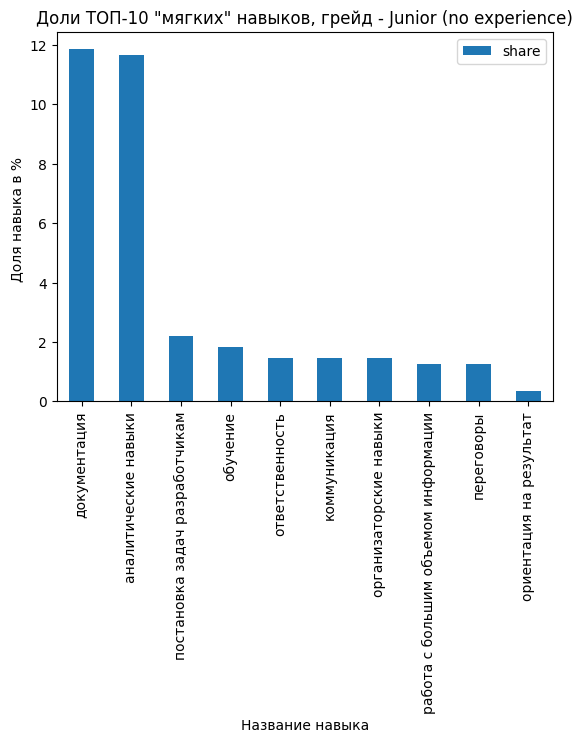

In [ ]:
soft_skills_junior_10_2= soft_skills_junior_2[:10]
soft_skills_junior_10_2.plot(title = 'Доли ТОП-10 "мягких" навыков, грейд - Junior (no experience)',
x = 'soft_skills_junior', y = 'share', xlabel = 'Название навыка', ylabel= 'Доля навыка в % ',kind='bar');

У джунов без опыта c сильным отрывом лидируют "документация" и "аналитические навыки". Тройку лидеров замыкает "постановка задач разработчикам". Дальше ижут "обучение", "ответственность", "коммуникация", "организаторские навыки", "работа с большим объёмом инфорации", "переговоры". Замыкает десятку "ориентация на результат".

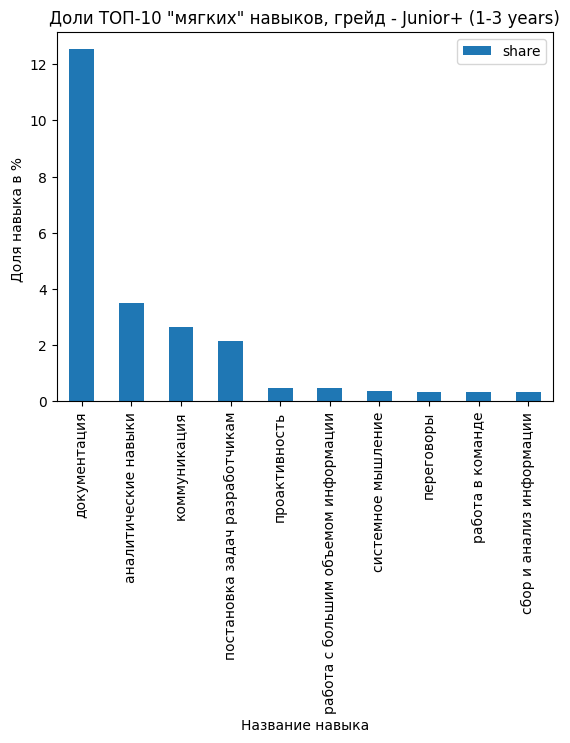

In [ ]:
soft_skills_junior_plus_10_2 = soft_skills_junior_plus_2[:10]
soft_skills_junior_plus_10_2.plot(title = 'Доли ТОП-10 "мягких" навыков, грейд - Junior+ (1-3 years)',
x = 'soft_skills_junior_plus', y = 'share', xlabel = 'Название навыка', ylabel= 'Доля навыка в % ',kind='bar');

У джунов с опытом работы на первом месте "документация", на втором - "аналитические навыки", на третьем - "коммуникация". Далее идут "постановка задач разработчикам", "проактивность", "работа с большим объёмом информации", "системное мышление", "переговоры", "работа в команде", "сбор и анализ информации".

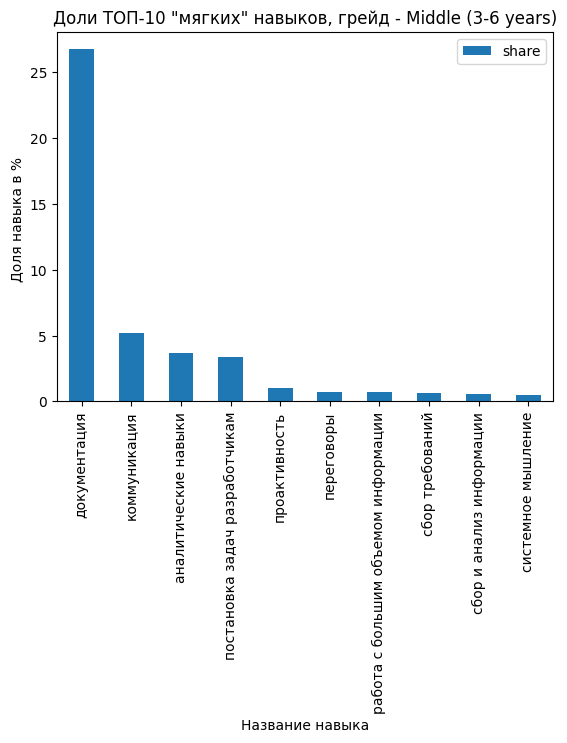

In [ ]:
soft_skills_middle_10_2 = soft_skills_middle_2[:10]
soft_skills_middle_10_2.plot(title = 'Доли ТОП-10 "мягких" навыков, грейд - Middle (3-6 years)',
x = 'soft_skills_middle', y = 'share', xlabel = 'Название навыка', ylabel= 'Доля навыка в % ',kind='bar');

У миддлов самыми востребованными "мягкими" навыками являются "документация" (с сильным отрывом), "коммуникация", "аналитические навыки". дальше идут "постановка задач разработчикам", "проактивность", "переговоры", "работа с большим объёмом информации", "сбор требований", "сбор и анализ информации", "системное мышление".

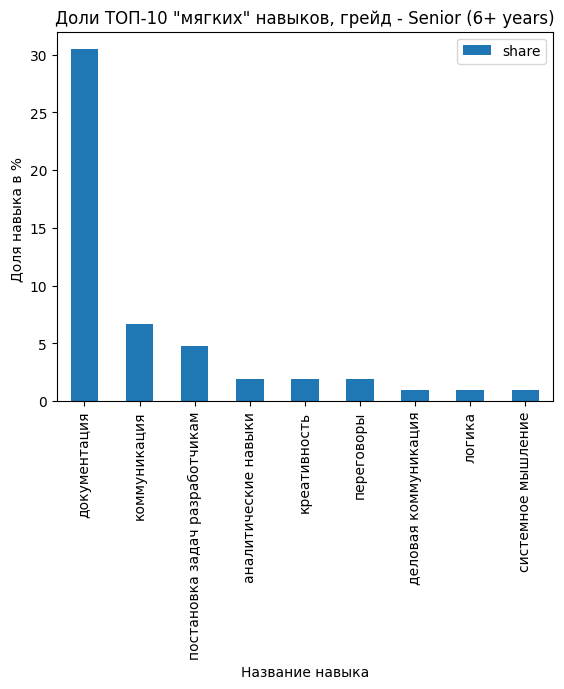

In [ ]:
soft_skills_senior_10_2 = soft_skills_senior_2[:10]
soft_skills_senior_10_2.plot(title = 'Доли ТОП-10 "мягких" навыков, грейд - Senior (6+ years)',
x = 'soft_skills_senior', y = 'share', xlabel = 'Название навыка', ylabel= 'Доля навыка в % ',kind='bar');

Наконец, у сениоров "мягкие" навыки распределились следующим образом (в порядке убывания): "документация", "коммуникация", "постановка задач разработчикам", "аналитические навыки", "креативность"", переговоры", "деловая коммуникация", "логика" и "системное мышление".

Время подводить итоги.

**Итоги**

* У всех грейдов аналитиков данных и системных аналитиков "твёрдые" навыки более востребованные, чем "мягкие".
* Абсолютным лидером по всем грейдам и вакансиями является "твёрдый" навык SQL и "мягкий" навык "документация".
* SQL является самым спрашиваемым "твёрдым" навыком у всех грейдов среди аналитиков данных. "Аналитический склад ума" является самыми спрашиваемым "мягким" навыком у джунов с опытом и без опыта работы, "документация" - у миддлов и сениоров среди аналитиков данных.
* У системных аналитиков победители следующие: среди "твёрдых" навыков - системный анализ у джунов без опыта работы, confluence у джунов и миддов, sql	у сениоров.
* Навык "Документация" является самым востребованным "мягким" навыком у всех грейдов системных аналитиков.

### Глава 2.4.4. Подтверждение/Опровержение гипотез

В начале анализа данных были выдвинуты четыре гипотезы относительно аналитиков данных и системных аналитиков. Настало время выяснить, подтвердились они или нет.

**1. Зарплаты системных аналитиков выше, чем зарплаты аналитиков данных.**

Гипотеза подтвердилась для грейдов "джун с опытом работы", "миддл" и "сениор", медианные зарплаты системных аналитиков превосходят медианные зарплаты аналитиков данных.
У джунов без опыта работы вышли 65,6 тыс. рублей для аналитика данных и 65,2 тыс. рублей для системного аналитика, в данном случае гипотеза не подтвердилась. Возможная причина: небольшая выборка вакансий для джунов без опыта работы в обоих датасетах.

**2. Зарплаты растут с повышением грейда внутри соответствующей должности.**

Подтвердилось для системных аналитиков, но не для аналитиков данных, у которых медианная зарплата миддла оказалсь выше медианной зарплаты сениора.
Возможная причина: сликом маленькая выборка сениоров.

**3. "Твёрдые" навыки спрашивают чаще, чем "мягкие".**

Подтвердилось у всех грейдов и у аналитиков данных, и системных аналитиков.

**4. У аналитиков данных чаще спрашивают "мягкие" навыки, чем у системных аналитиков.**

Опровергнута. "Мягкие" навыки по всем грейдам спрашивают чаще у системных аналитиков, чем у аналитиков данных.

## Глава 3 Итоги. Рекомендации HR.

Целью данного исследования был анализ рынка труда аналитиков данных и системных аналитиков. Были выявлены грейды требуемых специалистов по колонке с требуемым опытом, определены доли грейдов Junior, Junior+, Middle, Senior среди вакансий "аналитик данных" и "системный аналитик".
Были даны описания "типичного места работы" для "аналитика данных" и "системного аналитика" по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы. Информация предоставлялась по каждому грейду отдельно.  
Было определено, какие навыки спрашивают чаще, к какому грейду и к какой специальности в данной выборке предъявляется больше требований. Также было проанализировано, какие "твёрдые" и "мягкие" навыки наиболее востребованы у кандидатов в зависимости от грейда и профессии.

Результаты получились следующими:

* Больше всего ищут джунов с опытом работы от 1 до 3 лет и миддлов с опытом работы от 3 до 6 лет.
* Почти все вакансии предлагают тип занятости "полная занятость" и график работы - "полный день".
* В объявлениях часто не указывают размер зарплаты, что затрудняет полноценное исследование на эту тему.

Ниже представлено краткое описание типичного места работы разных грейдов.

**Аналитики данных**

Джун без опыта работы:
* ТОП-3 работодателей: "СБЕР", "МАГНИТ", "DNS Технологии"
* Медианная зарплата - 65,6 тысяч рублей
* Тип занятости - полная занятость
* График работы - полный день

Джун с опытом работы:
* ТОП-3 работодателей: "СБЕР", "ВТБ", "Ozon";
* Медианная зарплата - 98 тысяч рублей;
* Тип занятости - полная занятость;
* График работы - полный день.

Миддл:
* ТОП-3 работодателей: "СБЕР", "Wildberries", "Т1";
* Медианная зарплата - 174 тысячи рублей;
* Тип занятости - полная занятость;
* График работы - полный день.

Сениор:
* ТОП-3 работодателей: "Леруа Мерлен", "Reinvent Baltics", "Aramco Innovations";
* Медианная зарплата - 156,7 тысячи рублей;
* Тип занятости - полная занятость;
* График работы - полный день.

**Системные аналитики**

Джун без опыта работы:
* ТОП-3 работодателей: "Aston", "Апогей", "TWIGA Communication Group";
* Медианная зарплата - 65,2 тысячи рублей;
* Тип занятости - полная занятость;
* График работы - полный день.

Джун с опытом работы:
* ТОП-3 работодателей: "СБЕР", "Aston", "Совкомбанк Технологии";
* Медианная зарплата - 131,7 тысяч рублей;
* Тип занятости - полная занятость;
* График работы - полный день.

Миддл:
* ТОП-3 работодателей: "Т1", "СБЕР", "Aston";
* Медианная зарплата - 207,5 тысячи рублей;
* Тип занятости - полная занятость;
* График работы - полный день.

Сениор:
* ТОП-3 работодателей: "Т1", "Яндекс", "БФТ-Холдинг", "Mediascope";
* Медианная зарплата - 237,8 тысячи рублей;
* Тип занятости - полная занятость;
* График работы - полный день.


**"Твёрдые" и "мягкие" навыки**

* У всех грейдов аналитиков данных и системных аналитиков "твёрдые" навыки более востребованные, чем "мягкие".
* У аналитиков данных "твёрдые" навыки чаще всего спрашивают у миддлов, "мягкие" - у джунов без опыты работы.
* Больше всего навыков вместе ("твёрдых" и "мягких") среди аналитиков данных спрашивают с миддлов - в среднем 4,4 навыка на вакансию.
* У системных аналитиков твёрдые" навыки чаще всего спрашивают у джунов с опытом работы, "мягкие" - у джунов без опыта работы.
* Больше всего навыков вместе ("твёрдых" и "мягких") среди системных аналитиков спрашивают c джунов без опыты работы - в среднем 6,2 навыка на вакансию.
* Абсолютным лидером по всем грейдам и вакансиями является "твёрдый" навык "SQL" и "мягкий" навык "документация".
* "SQL" является самым спрашиваемым "твёрдым" навыком у всех грейдов среди аналитиков данных. "Аналитический склад ума" является самыми спрашиваемым "мягким" навыком у джунов с опытом и без опыта работы, "документация" - у миддлов и сениоров среди аналитиков данных.
* У системных аналитиков победители следующие: среди "твёрдых" навыков - "системный анализ" у джунов без опыта работы, "Confluence" у джунов и миддов, "SQL" у сениоров.
* Навык "документация" является самым востребованным "мягким" навыком у всех грейдов системных аналитиков.

**Рекомендации**

Напоследок хотелось бы дать несколько рекомендаций HR-отделам фирм, которые публикуют вакансии;
* Крайне желательно указывать хотя бы минимальный уровень зарплаты в объявлениях. Максимальный уровень часто сложно определить, не зная профиля кандидата на должность;
* Навыки желательно прописывать максимально кратко, без использования любых дополнительных слов (таких как"умение", "способость", название фирмы, выпускающей программное обеспечение, и так далее);
* По возможности избегать ошибок в написании названий ключевых навыков. Если HR не знаком со спецификой работы, желательно, чтобы данный раздел заполнял сотрудник, занимающий должность, схожей с той, на которую ищут работника.